In [16]:
import csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
from io import StringIO

In [17]:
review_input = """
project;month;test_gap_assessment;risk_score;score_LEN;score_COM;score_CLI;score_COC;score_ANF;score_UNF;score_ACF;score_UCF;score_RCF;score_RNF;score_CHF;score_CEN
subject 5;2023-11;safe;5,96969616;1;1;0,984848485;0;0;0;0;0;0;0;8,1E-07;1
subject 5;2023-11;risky;2,145795176;0,623376623;0,25;0,606060606;0;0;0;0;0;0;0;0,00104976;0,03067355
subject 5;2023-11;risky;1,796552615;0,324675325;0,5;0,272727273;0;0;0;0;0;0;0;0,00234256;0,214382652
subject 5;2023-07;risky;6,01989367;1;1;0,01002004;0;0;0;0;1;0;0;0,00014641;1
subject 5;2023-07;risky;4,269551062;0;0;0,997995992;1;0;0;0;0;0;0;0,023134407;0,148346742
subject 5;2023-07;risky;-0,015118375;0;0;0,004008016;0;0;0;0;0;0;0;0,023134407;0
subject 5;2023-07;risky;-0,015118375;0;0;0,004008016;0;0;0;0;0;0;0;0,023134407;0
subject 5;2023-07;risky;2,307868845;0;0;0,112224449;0,090909091;0;0;0;0;0;0;0,023134407;0,962368086
subject 5;2023-07;safe;-0,015118375;0;0;0,004008016;0;0;0;0;0;0;0;0,023134407;0
subject 5;2023-07;safe;2,243740589;0;0;0,080160321;0,090909091;0;0;0;0;0;0;0,023134407;0,962368086
subject 5;2023-07;safe;0,578696085;0;0;0,028056112;0,181818182;0;0;0;0;0;0;0,023134407;0,091040952
subject 5;2023-07;risky;2,411711903;0;0;0,316633267;0,727272727;0;0;0;0;0;0;0,023134407;0,173517161
subject 5;2023-07;risky;2,411711903;0;0;0,316633267;0,727272727;0;0;0;0;0;0;0,023134407;0,173517161
subject 5;2023-07;safe;0,380845839;0;0;0,02004008;0,090909091;0;0;0;0;0;0;0,023134407;0,091040952
subject 5;2023-07;safe;0,380845839;0;0;0,02004008;0,090909091;0;0;0;0;0;0;0,023134407;0,091040952
subject 5;2023-07;safe;0,420925999;0;0;0,04008016;0,090909091;0;0;0;0;0;0;0,023134407;0,091040952
subject 5;2023-07;safe;0,517118384;0;0;0,088176353;0,090909091;0;0;0;0;0;0;0,023134407;0,091040952
subject 5;2023-07;safe;0,380845839;0;0;0,02004008;0,090909091;0;0;0;0;0;0;0,023134407;0,091040952
subject 5;2023-07;safe;0,380845839;0;0;0,02004008;0,090909091;0;0;0;0;0;0;0,023134407;0,091040952
subject 5;2023-07;safe;0,420925999;0;0;0,04008016;0,090909091;0;0;0;0;0;0;0,023134407;0,091040952
subject 5;2023-07;safe;0,517118384;0;0;0,088176353;0,090909091;0;0;0;0;0;0;0,023134407;0,091040952
subject 5;2023-07;safe;0,586712117;0;0;0,032064128;0,181818182;0;0;0;0;0;0;0,023134407;0,091040952
subject 5;2023-06;risky;1,595240897;0,115021459;0,103773585;0,554487179;-0,909090909;0;0;0;0,043478261;0;0;0,00130321;1
subject 5;2023-06;risky;2,50589898;0,109012876;0,103773585;0,512820513;-0,909090909;0;1;0;0,043478261;0;0;0,00130321;1
subject 5;2023-06;risky;1,292439478;0,099570815;0,113207547;0,286858974;-1;0;0,333333333;0;0,086956522;0;0;0,00130321;1
subject 5;2023-06;risky;3,75517507;0;0;0,798076923;1;0;0;0;0;0;0;0,00130321;0,080162217
subject 5;2023-06;risky;3,072123363;0;0;0,173076923;0,363636364;0;0;0;0;0;0;0,00130321;1
subject 5;2023-06;risky;2,832612874;0;0;0,144230769;0,272727273;0;0;0;0;0;0;0,00130321;1
subject 5;2023-06;risky;4,49869679;0;0;0,25;1;0;0;0;0;0;0;0,00130321;1
subject 5;2023-06;safe;2,832612874;0;0;0,144230769;0,272727273;0;0;0;0;0;0;0,00130321;1
subject 5;2023-06;risky;2,704407746;0;0;0,080128205;0,272727273;0;0;0;0;0;0;0,00130321;1
subject 5;2023-06;risky;2,146706796;0;0;0,253205128;0,727272727;0;0;0;0;0;0;0,00130321;0,093527148
subject 5;2023-06;safe;0,268475789;0;0;0,009615385;0,090909091;0;0;0;0;0;0;0,00130321;0,034365024
subject 5;2023-06;safe;0,281296302;0;0;0,016025641;0,090909091;0;0;0;0;0;0;0,00130321;0,034365024
subject 5;2023-06;safe;0,281296302;0;0;0,016025641;0,090909091;0;0;0;0;0;0;0,00130321;0,034365024
subject 5;2023-06;safe;0,313347584;0;0;0,032051282;0,090909091;0;0;0;0;0;0;0,00130321;0,034365024
subject 5;2023-06;safe;0,390270661;0;0;0,070512821;0,090909091;0;0;0;0;0;0;0,00130321;0,034365024
subject 5;2023-06;safe;0,475934996;0;0;0,022435897;0,181818182;0;0;0;0;0;0;0,00130321;0,034365024
subject 5;2023-06;safe;4,028355033;1;1;0,004807692;0;0;0;0;1;0;0;0,00038416;0,009561904
subject 5;2023-06;safe;0,441394236;0;0;0,025641026;0,181818182;0;0;0;0;0;0;0,00038416;0,013429991
subject 5;2023-04;safe;5,173160173;0,476190476;0,363636364;1;0,666666667;0;0;0;0;0;0;1;1
subject 5;2023-04;risky;8,211199723;0,761904762;1;0,2;0;0;0,333333333;1;0,5;0;0;2,401E-05;0,357992819
subject 5;2023-04;risky;10,66964128;0,447619048;0,272727273;0,45;0,666666667;1;1;1;0;0;0;2,401E-05;0,357992819
subject 5;2023-04;risky;10,56964128;0,447619048;0,272727273;0,4;0,666666667;0;1;1;1;0;0;2,401E-05;0,357992819
subject 5;2023-04;risky;6,546264658;0,533333333;0,363636364;0,3;0,666666667;1;0;0;0,5;0;0;2,401E-05;0,357992819
subject 5;2023-04;risky;5,426784139;0,238095238;0,272727273;0,1;0;0;0;1;0;0;0;2,401E-05;0,357992819
subject 5;2023-04;safe;1,63347214;0,40952381;0,272727273;0,2375;0;0;0;0;0;0;0;0,005314411;0,240767734
subject 5;2023-04;risky;1,842887725;0;0;0,35;0,333333333;0;0;0;0;0;0;0,005314411;0,240767734
subject 5;2023-04;risky;2,288290407;0;0;0,025;1;0;0;0;0;0;0;0,005314411;0,121802409
subject 5;2023-04;risky;1,493385833;0;0;0,375;0,333333333;0;0;0;0;0;0;0,005314411;0,041016788
subject 5;2023-04;safe;1,692661184;0;0;0,375;0,333333333;0;0;0;0;0;0;0,005314411;0,140654464
subject 5;2023-04;safe;1,692661184;0;0;0,375;0,333333333;0;0;0;0;0;0;0,005314411;0,140654464
subject 5;2023-04;safe;4,567323063;1;0,272727273;0,25;0;0;0;0;1;0;0;0,005314411;0,399955101
subject 3;2023-08;risky;6;1;1;1;0;0;0;0;0;0;0;0;1
subject 3;2023-08;risky;4,524173028;0,690839695;0,333333333;0,75;0;0;0;0;0;0;0;0;1
subject 3;2023-08;safe;2,719261157;0,080152672;1;0,333333333;0;0;0;0;0;0;0;0;0,486220909
subject 3;2023-06;safe;0,596357259;0;0;0,047244094;0,25;0;0;0;0;0;0;0;0,000934535
subject 3;2023-06;safe;1,715779832;1;0,666666667;0,023622047;0;0;0;0;0;0;0;0;0,000934535
subject 3;2023-06;safe;0,596357259;0;0;0,047244094;0,25;0;0;0;0;0;0;0;0,000934535
subject 3;2023-06;risky;3,040684493;0;0;0,472440945;0,25;0;0;0;0;0;0;0;0,797901301
subject 3;2023-06;risky;3,105160129;0,710144928;0,5;0,149606299;0;0;0;0;0;0;0;0;0,797901301
subject 3;2023-06;risky;2,942259296;0;0;0,173228346;0,5;0;0;0;0;0;0;0;0,797901301
subject 3;2023-06;risky;3,417950474;0,492753623;0,5;0,212598425;0;0;0;0;0;0;0;0;1
subject 3;2023-06;risky;3,755905512;0;0;0,377952756;0,5;0;0;0;0;0;0;0;1
subject 3;2023-06;risky;3,522544761;0,623188406;1;0,141732283;0;0;0;0;0;0;0;0;0,807945894
subject 3;2023-06;safe;4,663116447;0;0;0,929133858;1;0;0;0;0;0;0;0;0,402424365
subject 3;2023-06;safe;2,875714872;0;0;0,535433071;0,5;0;0;0;0;0;0;0;0,402424365
subject 3;2023-05;risky;0,331338439;0;0;0,021978022;0,142857143;0;0;0;0;0;0;0;0,000834055
subject 3;2023-05;risky;0,331338439;0;0;0,021978022;0,142857143;0;0;0;0;0;0;0;0,000834055
subject 3;2023-05;risky;0,331338439;0;0;0,021978022;0,142857143;0;0;0;0;0;0;0;0,000834055
subject 3;2023-05;risky;0,331338439;0;0;0,021978022;0,142857143;0;0;0;0;0;0;0;0,000834055
subject 3;2023-05;risky;0,331338439;0;0;0,021978022;0,142857143;0;0;0;0;0;0;0;0,000834055
subject 3;2023-05;risky;3,906430014;0;0;0,952380952;1;0;0;0;0;0;0;0;0,000834055
subject 3;2023-05;risky;0,331338439;0;0;0,021978022;0,142857143;0;0;0;0;0;0;0;0,000834055
subject 3;2023-05;risky;2,155514263;0;0;0,505494505;0,571428571;0;0;0;0;0;0;0;0,000834055
subject 3;2023-05;risky;0,331338439;0;0;0,021978022;0,142857143;0;0;0;0;0;0;0;0,000834055
subject 3;2023-05;risky;1,408261516;0;0;0,131868132;0,571428571;0;0;0;0;0;0;0;0,000834055
subject 3;2023-05;risky;0,565770674;0;0;0,139194139;0,142857143;0;0;0;0;0;0;0;0,000834055
subject 3;2023-05;risky;0,389946498;0;0;0,051282051;0,142857143;0;0;0;0;0;0;0;0,000834055
subject 3;2023-05;risky;0,921379029;0,148648649;0,5;0,278388278;-0,142857143;0;0;0;0;0;0;0;0,000834055
subject 3;2023-05;safe;4,688644689;1;1;0,201465201;0,142857143;0;0;0;0;0;0;0;1
subject 3;2023-05;safe;0,788807099;0,243243243;0,25;0;0;0;0;0;0;0;0;0;0,147781928
subject 4;2023-10;safe;0,704035166;0,711598746;0,739130435;0,338461538;-1;0;0;0;0;0;0;0;0,288191454
subject 4;2023-10;risky;4,202022437;0,686520376;1;1;0;0;0;0;0;0;0;0;0,257751031
subject 4;2023-10;risky;2,546288067;0,319749216;0,695652174;0,507692308;0;0;0;0;0;0;0;0;0,257751031
subject 4;2023-10;risky;1,945050923;0,238244514;0,391304348;0,4;0;0;0;0;0;0;0;0;0,257751031
subject 4;2023-10;safe;4,141137124;1;0,956521739;0,092307692;0;0;0;0;0;0;0;0;1
subject 4;2023-07;risky;7,635135135;1;1;0,817567568;1;0;0;0;0;0;0;0;1
subject 4;2023-07;safe;0,924578122;0,04494382;0,038461538;0,060810811;0;0;0;0;0;0;0;0;0,359775571
subject 4;2023-07;safe;2,106162822;0,114606742;0,115384615;0,216216216;-0,166666667;0;0;0;0;0;0;0;0,888536183
subject 4;2023-07;safe;2,106162822;0,114606742;0,115384615;0,216216216;-0,166666667;0;0;0;0;0;0;0;0,888536183
subject 4;2023-06;safe;2,026784004;0,802325581;1;0,111111111;0;0;0;0;0;0;0;0;0,0011181
subject 4;2023-06;risky;2,982353159;0;0;0,69005848;0,8;0;0;0;0;0;0;0;0,0011181
subject 4;2023-06;risky;1,597557838;0;0;0,397660819;0,4;0;0;0;0;0;0;0;0,0011181
subject 4;2023-06;risky;4,039883668;0;0;0,970760234;1;0;0;0;0;0;0;0;0,0491816
subject 4;2023-06;safe;0,546205415;0;0;0,035087719;0,2;0;0;0;0;0;0;0;0,038014988
subject 4;2023-06;safe;3,670175439;1;0,6;0,035087719;0;0;0;0;0;0;0;0;1
subject 4;2023-05;risky;2,613564669;0;0;0,056782334;0,25;0;0;0;0;0;0;0;1
subject 4;2023-05;risky;4,826915298;0,53030303;1;1;0;0;0;0;0;0;0;0;0,648306134
subject 4;2023-05;safe;2,266108076;0,429924242;0,386363636;0;0;0;0;0;0;0;0;0;0,724910099
subject 4;2023-05;safe;3,948832419;0,859848485;0,909090909;0,441640379;0;0;0;0;0;0;0;0;0,648306134
subject 4;2023-05;safe;2,726829264;0,371212121;0,522727273;0,268138801;0;0;0;0;0;0;0;0;0,648306134
subject 4;2023-05;safe;3,874980732;0,827651515;0,886363636;0,432176656;0;0;0;0;0;0;0;0;0,648306134
subject 4;2023-05;safe;2,127860476;0,164772727;0,363636364;0,151419558;0;0;0;0;0;0;0;0;0,648306134
subject 4;2023-05;safe;1,846977912;0,125;0,204545455;0,110410095;0;0;0;0;0;0;0;0;0,648306134
subject 4;2023-05;safe;5,904489014;0,602272727;0,272727273;0,567823344;1;0;0;0;0;0;0;0;0,946921163
subject 4;2023-05;safe;2,714511041;0;0;0,107255521;0,25;0;0;0;0;0;0;0;1
subject 4;2023-05;safe;1,42519038;0,106060606;0,022727273;0,397476341;0,25;0;0;0;0;0;0;0;0,00072491
subject 4;2023-05;safe;3,728071975;1;0,863636364;0,283911672;0;0;0;0;0;0;0;0;0,648306134
subject 4;2023-05;safe;4,826915298;0,53030303;1;1;0;0;0;0;0;0;0;0;0,648306134
subject 4;2023-05;safe;1,907464481;0,132575758;0,068181818;0,205047319;0;0;0;0;0;0;0;0;0,648306134
subject 4;2023-05;safe;1,859524513;0,147727273;0,068181818;0,173501577;0;0;0;0;0;0;0;0;0,648306134
subject 4;2023-05;safe;1,561715987;0,098484848;0,090909091;0,03785489;0;0;0;0;0;0;0;0;0,648306134
subject 4;2023-05;safe;1,411491343;0,037878788;0,045454545;0,015772871;0;0;0;0;0;0;0;0;0,648306134
subject 1;2023-09;safe;1,826234405;0,645833333;0,727272727;0,16;0;0;0;0;0;0;0,5;1,6E-07;0,316564252
subject 1;2023-09;safe;0,533128344;0,5;1;0,2;-0,5;0;0;0;0;0;1;1,6E-07;0,316564252
subject 1;2023-09;risky;4,59999919;0;0;0,8;0,5;0;0;0;0;0;0;8,1E-07;1
subject 1;2023-09;risky;2,836995954;1;0,545454545;0,12;0;0;0;0;0;0;0;8,1E-07;0,52577111
subject 1;2023-09;risky;1,490935348;0,166666667;0,272727273;1;-1;0;0;0;0;0;0;8,1E-07;0,52577111
subject 1;2023-09;risky;1,165971072;0,104166667;0,090909091;0,2;0;0;0;0;0;0;0;8,1E-07;0,285448062
subject 1;2023-08;risky;2,811417412;0;0;0,319148936;0,090909091;0;0;0;0;0;0;0,00038416;0,995842759
subject 1;2023-08;risky;2,865576019;0;0;0,255319149;0,181818182;0;0;0;0;0;0;0,00038416;0,995842759
subject 1;2023-08;risky;2,726311029;0;0;0,276595745;0,090909091;0;0;0;0;0;0;0,00038416;0,995842759
subject 1;2023-08;risky;4,243301087;0;0;0,70212766;0,909090909;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;3,794558341;0;0;0,659574468;0,727272727;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;4,042140546;0;0;0,510638298;1;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;3,612740159;0;0;0,659574468;0,636363636;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;2,866916906;0;0;0,361702128;0,636363636;0;0;0;0;0;0;0,028257609;0,449521493
subject 1;2023-08;risky;3,430921977;0;0;0,659574468;0,545454545;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;2,193010952;0;0;0,404255319;0,181818182;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;2,107904569;0;0;0,361702128;0,181818182;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;4,529568012;0;0;0,936170213;0,818181818;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;3,21815602;0;0;0,553191489;0,545454545;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;1,968639579;0;0;0,382978723;0,090909091;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;2,278117335;0;0;0,446808511;0,181818182;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;2,022798186;0;0;0,319148936;0,181818182;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;1,670767238;0;0;0,234042553;0,090909091;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;1,415448089;0;0;0,106382979;0,090909091;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;1,543107664;0;0;0,170212766;0,090909091;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;1,415448089;0;0;0,106382979;0,090909091;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;1,372894898;0;0;0,085106383;0,090909091;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;1,767479037;0;0;0,191489362;0,181818182;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;1,55471308;0;0;0,085106383;0,181818182;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;1,372894898;0;0;0,085106383;0,090909091;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;1,372894898;0;0;0,085106383;0,090909091;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;1,372894898;0;0;0,085106383;0,090909091;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;1,372894898;0;0;0,085106383;0,090909091;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;1,372894898;0;0;0,085106383;0,090909091;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;1,372894898;0;0;0,085106383;0,090909091;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;1,372894898;0;0;0,085106383;0,090909091;0;0;0;0;0;0;0,028257609;0,52456078
subject 1;2023-08;risky;1,745060039;0;0;0,255319149;0,181818182;0;0;0;0;0;0;0,028257609;0,449521493
subject 1;2023-08;risky;1,745060039;0;0;0,255319149;0,181818182;0;0;0;0;0;0;0,028257609;0,449521493
subject 1;2023-08;risky;1,393029091;0;0;0,170212766;0,090909091;0;0;0;0;0;0;0,028257609;0,449521493
subject 1;2023-08;risky;1,393029091;0;0;0,170212766;0,090909091;0;0;0;0;0;0;0,028257609;0,449521493
subject 1;2023-08;safe;4,063829627;1;1;0,031914894;0;0;0;0;0;0;0;1,6E-07;1
subject 1;2023-08;safe;2,811417412;0;0;0,319148936;0,090909091;0;0;0;0;0;0;0,00038416;0,995842759
subject 1;2023-08;safe;2,865576019;0;0;0,255319149;0,181818182;0;0;0;0;0;0;0,00038416;0,995842759
subject 1;2023-08;safe;2,726311029;0;0;0,276595745;0,090909091;0;0;0;0;0;0;0,00038416;0,995842759
subject 1;2023-08;safe;1,862376405;0,75;0,333333333;0,170212766;0;0;0;0;0;0;0;0,00083521;0,219726375
subject 1;2023-08;safe;1,862376405;0,75;0,333333333;0,170212766;0;0;0;0;0;0;0;0,00083521;0,219726375
subject 1;2023-07;risky;4,818024115;0;0;0,961538462;0,75;0;0;0;0;0;0;1,296E-05;0,697480076
subject 1;2023-07;risky;3,818024115;0;0;0,961538462;0,25;0;0;0;0;0;0;1,296E-05;0,697480076
subject 1;2023-07;risky;3,471870268;0;0;0,538461538;0,5;0;0;0;0;0;0;1,296E-05;0,697480076
subject 1;2023-07;risky;2,664177961;0;0;0,384615385;0,25;0;0;0;0;0;0;1,296E-05;0,697480076
subject 1;2023-07;risky;3,087254884;0;0;0,346153846;0,5;0;0;0;0;0;0;1,296E-05;0,697480076
subject 1;2023-07;risky;2,279562576;0;0;0,192307692;0,25;0;0;0;0;0;0;1,296E-05;0,697480076
subject 1;2023-07;risky;2,203276621;0;0;0,153846154;0,25;0;0;0;0;0;0;0,00065536;0,698119837
subject 1;2023-07;risky;4,515068119;0;0;0,846153846;1;0;0;0;0;0;0;0,00065536;0,411707893
subject 1;2023-07;risky;3,47660658;0;0;0,576923077;0,75;0;0;0;0;0;0;0,00065536;0,411707893
subject 1;2023-07;risky;3,47660658;0;0;0,576923077;0,75;0;0;0;0;0;0;0,00065536;0,411707893
subject 1;2023-07;risky;3,47660658;0;0;0,576923077;0,75;0;0;0;0;0;0;0,00065536;0,411707893
subject 1;2023-07;risky;2,899683503;0;0;0,538461538;0,5;0;0;0;0;0;0;0,00065536;0,411707893
subject 1;2023-07;risky;2,899683503;0;0;0,538461538;0,5;0;0;0;0;0;0;0,00065536;0,411707893
subject 1;2023-07;risky;2,899683503;0;0;0,538461538;0,5;0;0;0;0;0;0;0,00065536;0,411707893
subject 1;2023-07;risky;2,668914272;0;0;0,423076923;0,5;0;0;0;0;0;0;0,00065536;0,411707893
subject 1;2023-07;risky;2,668914272;0;0;0,423076923;0,5;0;0;0;0;0;0;0,00065536;0,411707893
subject 1;2023-07;risky;2,668914272;0;0;0,423076923;0,5;0;0;0;0;0;0;0,00065536;0,411707893
subject 1;2023-07;safe;1,81523512;0;0;0,269230769;0,5;0;0;0;0;0;0;2,401E-05;0,138398796
subject 1;2023-07;safe;1,797587491;0;0;0,230769231;0,25;0;0;0;0;0;0;2,401E-05;0,41803652
subject 1;2023-07;safe;1,81523512;0;0;0,269230769;0,5;0;0;0;0;0;0;2,401E-05;0,138398796
subject 1;2023-07;safe;3,229719471;0;0;0,115384615;0,5;0;0;0;0;0;0;0,00104976;1
subject 1;2023-07;safe;3,365674628;1;1;0,115384615;0;0;0;0;0;0;0;0,00104976;0,567977579
subject 1;2023-07;safe;2,774078596;0,75;1;0,057692308;0;0;0;0;0;0;0;0,00104976;0,45487187
subject 1;2023-07;safe;2,472478096;0;0;0,269230769;0,25;0;0;0;0;0;0;0,00050625;0,717261404
subject 1;2023-06;safe;3,424211154;0,526315789;1;0,282608696;-0,333333333;0;0;0;0;0;0;0,00065536;1
subject 1;2023-06;risky;3,059867943;1;1;0,413043478;-0,333333333;0;0;0;0;0;0;0,0001;0,450273826
subject 1;2023-06;risky;4,502335658;0;0;0,630434783;1;0;0;0;0;0;0;8,1E-07;0,620733451
subject 1;2023-06;safe;2,747246902;0;0;0,108695652;0,333333333;0;0;0;0;0;0;1E-08;0,93159447
subject 1;2023-04;risky;7,333333173;1;1;0,666666667;1;0;0;0;0;0;0;1,6E-07;1
subject 1;2023-04;risky;4,24999984;0,85;1;0,2;0;0;0;0;0;0;0;1,6E-07;1
subject 1;2023-04;safe;5,369854302;0;0;0,933333333;1;0;0;0;0;0;0;1,296E-05;0,751600297
subject 2;2023-12;risky;3,293832047;0;0;0,545454545;1;0;0;0;0;0;0;0;0,101461478
subject 2;2023-12;risky;4,021840259;0,558823529;0,222222222;0,5;1;0;0;0;0;0;0;0;0,120397254
subject 2;2023-12;risky;1,505797479;0,588235294;0,222222222;0,727272727;0;0;0;0;0;0;1;0;0,120397254
subject 2;2023-12;risky;1,3627436;0,176470588;0,333333333;0,318181818;0;0;0;0;0;0;0;0;0,108288021
subject 2;2023-12;risky;0,899879666;0,117647059;0,111111111;0,227272727;0;0;0;0;0;0;0;0;0,108288021
subject 2;2023-12;risky;2,761422169;0,970588235;1;0,318181818;0;0;0;0;0;0;0;0;0,077235149
subject 2;2023-12;safe;1,30512681;0,205882353;0,333333333;0,227272727;0;0;0;0;0;0;0;0;0,155682835
subject 2;2023-12;safe;1,005363383;0,5;0,111111111;0,136363636;0;0;0;0;0;0;0;0;0,060762499
subject 2;2023-12;safe;2,589720737;0,205882353;0,111111111;0,136363636;0;0;0;0;0;0;0;0;1
subject 2;2023-12;safe;1,148522962;0,382352941;0,222222222;0,136363636;0;0;0;0;0;0;0;0;0,135610263
subject 2;2023-12;safe;3,849316159;1;0,555555556;1;0;0;0;0;0;0;0;0;0,146880302
subject 2;2023-12;safe;1,342416585;0,176470588;0,333333333;0,227272727;0;0;0;0;0;0;0;0;0,189033605
subject 2;2023-12;safe;1,342416585;0,176470588;0,333333333;0,727272727;0;0;0;0;0;0;1;0;0,189033605
subject 2;2023-12;safe;1,125839045;0,323529412;0,333333333;0,545454545;0;0;0;0;0;0;1;0;0,189033605
subject 2;2023-11;risky;4,170249751;0;0;0,424242424;1;0;0;0;0;0;0;0;0,660882451
subject 2;2023-11;safe;0,672857673;0,105263158;0,125;0,045454545;0;0;0;0;0;0;0;0;0,175842712
subject 2;2023-11;safe;2,083440757;0,526315789;0,25;0,03030303;0;0;0;0;0;0;0;0;0,623259454
subject 2;2023-11;safe;2,469536274;0,447368421;0,375;0,045454545;0;0;0;0;0;0;0;0;0,778129381
subject 2;2023-11;risky;3,354779069;0,947368421;1;0,257575758;0;0;0;0;0;0;0,333333333;0;0,612796233
subject 2;2023-11;safe;1,637673806;0,105263158;0,125;0,090909091;0;0;0;0;0;0;0;0;0,612796233
subject 2;2023-11;safe;1,952865193;0;0;0,03030303;0,333333333;0;0;0;0;0;0;0;0,612796233
subject 2;2023-11;safe;1,863949723;0,236842105;0,25;0,075757576;0;0;0;0;0;0;0;0;0,612796233
subject 2;2023-11;safe;2,432859111;0;0;0,03030303;0,333333333;0;0;0;0;0;0;0;0,852793192
subject 2;2023-11;risky;3,048489095;0,236842105;0,5;0,46969697;0;0;0;0;0;0;0,333333333;0;0,852793192
subject 2;2023-11;risky;3,373959525;0,868421053;1;0,439393939;0;0;0;0;0;0;1;0;0,813375297
subject 2;2023-11;safe;3,293460925;0,763157895;0,5;0,181818182;0;0;0;0;0;0;0,333333333;0;1
subject 2;2023-11;safe;2,399234808;0,447368421;0,625;0,166666667;0;0;0;0;0;0;0,333333333;0;0,663433194
subject 2;2023-11;safe;2,824954695;0,578947368;0,5;0,212121212;0;0;0;0;0;0;0;0;0,660882451
subject 2;2023-11;safe;2,25896586;0,289473684;0,375;0,136363636;0;0;0;0;0;0;0;0;0,660882451
subject 2;2023-11;safe;2,04903763;0;0;0,03030303;0,333333333;0;0;0;0;0;0;0;0,660882451
subject 2;2023-11;safe;1,851071123;0,131578947;0,125;0,136363636;0;0;0;0;0;0;0;0;0,660882451
subject 2;2023-11;safe;2,528648033;1;0,375;0,606060606;-0,666666667;0;0;0;0;0;0;0;0,637430077
subject 2;2023-11;safe;1,517085035;0,026315789;0,125;0,045454545;0;0;0;0;0;0;0;0;0,637430077
subject 2;2023-11;safe;2,002132882;0;0;0,03030303;0,333333333;0;0;0;0;0;0;0;0,637430077
subject 2;2023-11;safe;2,002132882;0;0;0,03030303;0,333333333;0;0;0;0;0;0;0;0,637430077
subject 2;2023-11;safe;1,686941494;0,105263158;0,125;0,090909091;0;0;0;0;0;0;0;0;0,637430077
subject 2;2023-11;safe;2,054139114;0;0;0,03030303;0,333333333;0;0;0;0;0;0;0;0,663433194
subject 2;2023-11;risky;3,293460925;0,763157895;0,5;0,181818182;0;0;0;0;0;0;0,333333333;0;1
subject 2;2023-11;safe;0,838219143;0,368421053;0,125;0,090909091;0;0;0;0;0;0;0;0;0,081489954
subject 2;2023-10;safe;0,575371762;0,054054054;0,142857143;0,102040816;0;0;0;0;0;0;0,166666667;0;0,170522799
subject 2;2023-10;safe;1,91413152;0,081081081;0,285714286;0,428571429;0;0;0;0;0;0;0,166666667;0;0,428429981
subject 2;2023-10;risky;2,974057624;0,243243243;0,571428571;0,408163265;0;0;0;0;0;0;0,166666667;0;0,754862973
subject 2;2023-10;safe;1,733842626;0,094594595;0,142857143;0,12244898;0;0;0;0;0;0;0;0;0,625746464
subject 2;2023-10;safe;2,124330859;0,702702703;0,571428571;0,265306122;0;0;0;0;0;0;0;0;0,15979367
subject 2;2023-10;risky;2,38081183;0;0;0,530612245;0,5;0;0;0;0;0;0;0;0,15979367
subject 2;2023-10;safe;4,571612085;0;0;0,653061224;1;0;0;0;0;0;0;0;0,632744818
subject 2;2023-10;risky;1,903041087;0,243243243;0,285714286;0,244897959;0;0;0;0;0;0;0,166666667;0;0,525477153
subject 2;2023-10;safe;2,585785342;0,108108108;0,285714286;0,387755102;0;0;0;0;0;0;0;0;0,708226372
subject 2;2023-10;safe;2,657203899;0,297297297;0,142857143;0,367346939;0;0;0;0;0;0;0,166666667;0;0,824511124
subject 2;2023-10;safe;3,432024504;1;1;0,714285714;0;0;0;0;0;0;1;0;0,501726538
subject 2;2023-10;risky;2,976582667;0,351351351;0,714285714;0,040816327;0;0;0;0;0;0;0;0;0,914656474
subject 2;2023-10;safe;2,653044251;0,216216216;0,428571429;0,897959184;0;0;0;0;0;0;0,5;0;0,356169119
subject 2;2023-10;safe;2,653044251;0,216216216;0,428571429;0,897959184;0;0;0;0;0;0;0,5;0;0,356169119
subject 2;2023-10;safe;1,919758679;0,081081081;0,142857143;0,489795918;0;0;0;0;0;0;0,166666667;0;0,441447642
subject 2;2023-10;safe;1,045057447;0,162162162;0,428571429;0,285714286;-0,5;0;0;0;0;0;0;0;0,441447642
subject 2;2023-10;risky;2,438753252;0,418918919;0,571428571;0,571428571;0;0;0;0;0;0;0,333333333;0;0,319440976
subject 2;2023-09;risky;3,83100304;0,659574468;1;0,085714286;0;0;0;0;0;0;0;0;1
subject 2;2023-09;safe;0,919739125;0,106382979;0,166666667;0,085714286;0;0;0;0;0;0;0;0;0,237630454
subject 2;2023-09;safe;3,825948996;0;0;0,342857143;1;0;0;0;0;0;0;0;0,570117355
subject 2;2023-09;safe;3,825948996;0;0;0,342857143;1;0;0;0;0;0;0;0;0,570117355
subject 2;2023-09;safe;1,800749387;0,021276596;0,166666667;0,085714286;0;0;0;0;0;0;0;0;0,720688777
subject 2;2023-09;safe;3,669948982;0;0;0,114285714;1;0;0;0;0;0;0;0;0,720688777
subject 2;2023-09;safe;1,539327804;0,170212766;0,333333333;0,085714286;0;0;0;0;0;0;0;0;0,432176567
subject 2;2023-09;safe;1,539327804;0,170212766;0,333333333;0,085714286;0;0;0;0;0;0;0;0;0,432176567
subject 2;2023-09;safe;2,006907258;0,276595745;0,333333333;0,171428571;0;0;0;0;0;0;0;0;0,527060518
subject 2;2023-09;safe;1,65372884;0,085106383;0,166666667;0,085714286;0;0;0;0;0;0;0;0;0,61526361
subject 2;2023-09;safe;1,532911985;0,021276596;0,166666667;0,085714286;0;0;0;0;0;0;0;0;0,586770076
subject 2;2023-09;safe;1,532911985;0,021276596;0,166666667;0,085714286;0;0;0;0;0;0;0;0;0,586770076
subject 2;2023-09;risky;1,59686764;0,489361702;0,333333333;0,257142857;0;0;0;0;0;0;0;0;0,129943445
subject 2;2023-09;safe;1,788199215;0,255319149;0,166666667;0,514285714;0;0;0;0;0;0;0;0;0,168820985
subject 2;2023-09;safe;2,075772306;0,085106383;0,166666667;0,085714286;0;0;0;0;0;0;0;0;0,826285343
subject 2;2023-09;risky;2,318302137;0,234042553;0,333333333;0,6;0;0;0;0;0;0;0,5;0;0,525463125
subject 2;2023-09;safe;1,312811297;0,234042553;0,166666667;0,2;0;0;0;0;0;0;0;0;0,256051039
subject 2;2023-09;safe;1,312811297;0,234042553;0,166666667;0,2;0;0;0;0;0;0;0;0;0,256051039
subject 2;2023-09;risky;4,353071247;1;0,166666667;1;0;0;1;0;0;0;1;0;0,59320229
subject 2;2023-09;safe;2,493825563;0,659574468;0,666666667;0,371428571;0;0;0;0;0;0;0;0;0,212363643
subject 2;2023-09;risky;5,148715484;0,382978723;0,5;0,257142857;1;0;0;0;0;0;0;0;0,875725523
subject 2;2023-09;safe;1,856988146;0,234042553;0,5;0,257142857;0;0;0;0;0;0;0;0;0,304329939
subject 2;2023-09;safe;2,837231307;0;0;0,114285714;1;0;0;0;0;0;0;0;0,304329939
subject 2;2023-09;safe;3,18008845;0;0;0,285714286;1;0;0;0;0;0;0;0;0,304329939
subject 2;2023-09;safe;2,722945593;0;0;0,057142857;1;0;0;0;0;0;0;0;0,304329939
subject 2;2023-09;safe;0,278451503;0,191489362;0,333333333;0,371428571;-1;0;0;0;0;0;0;0;0,505385832
subject 2;2023-09;safe;2,449354328;0;0;0,057142857;1;0;0;0;0;0;0;0;0,167534307
subject 2;2023-09;safe;0,866803542;0,106382979;0,166666667;0,114285714;0;0;0;0;0;0;0;0;0,182591234
subject 2;2023-08;risky;4,62962963;0,296296296;1;0,333333333;0,333333333;0;0;0;0;0;0;0;1
subject 2;2023-08;safe;3,833333333;0;0;0,25;0,666666667;0;0;0;0;0;0;0;1
subject 2;2023-08;safe;2,053682081;0;0;0,145833333;0,666666667;0;0;0;0;0;0;0;0,21434104
subject 2;2023-08;safe;1,030688051;0;0;0,083333333;0,333333333;0;0;0;0;0;0;0;0,098677359
subject 2;2023-08;safe;1,672736681;0,197530864;0,2;0,020833333;0;0;0;0;0;0;0;0;0,616769575
subject 2;2023-08;safe;1,850577958;0,296296296;0,4;0,052083333;0;0;0;0;0;0;0;0;0,525057498
subject 2;2023-08;safe;3,308603951;0,950617284;1;0,354166667;0;0;0,5;0;0;0;1;0;0,574826667
subject 2;2023-08;safe;2,534202095;0;0;0,166666667;0,666666667;0;0;0;0;0;0;0;0,433767714
subject 2;2023-08;safe;1,784202095;0;0;0,125;0,333333333;0;0;0;0;0;0;0;0,433767714
subject 2;2023-08;safe;2,04593049;0,061728395;0,2;0,125;0,333333333;0;0;0;0;0;0;0;0,433767714
subject 2;2023-08;safe;1,742535428;0;0;0,104166667;0,333333333;0;0;0;0;0;0;0;0,433767714
subject 2;2023-08;safe;1,575868762;0;0;0,020833333;0,333333333;0;0;0;0;0;0;0;0,433767714
subject 2;2023-08;safe;1,575868762;0;0;0,020833333;0,333333333;0;0;0;0;0;0;0;0,433767714
subject 2;2023-08;safe;1,575868762;0;0;0,020833333;0,333333333;0;0;0;0;0;0;0;0,433767714
subject 2;2023-08;safe;1,915813867;0;0;0,145833333;0,666666667;0;0;0;0;0;0;0;0,145406934
subject 2;2023-08;safe;0,999147201;0;0;0,020833333;0,333333333;0;0;0;0;0;0;0;0,145406934
subject 2;2023-08;safe;0,999147201;0;0;0,020833333;0,333333333;0;0;0;0;0;0;0;0,145406934
subject 2;2023-08;safe;0,999147201;0;0;0,020833333;0,333333333;0;0;0;0;0;0;0;0,145406934
subject 2;2023-08;safe;0,565659546;0,012345679;0,2;0,03125;0;0;0;0;0;0;0;0;0,145406934
subject 2;2023-08;safe;0,999147201;0;0;0,020833333;0,333333333;0;0;0;0;0;0;0;0,145406934
subject 2;2023-08;safe;0,565659546;0,012345679;0,2;0,03125;0;0;0;0;0;0;0;0;0,145406934
subject 2;2023-08;safe;0,565659546;0,012345679;0,2;0,03125;0;0;0;0;0;0;0;0;0,145406934
subject 2;2023-08;safe;0,565659546;0,012345679;0,2;0,03125;0;0;0;0;0;0;0;0;0,145406934
subject 2;2023-08;safe;1,35230803;0;0;0,041666667;0,333333333;0;0;0;0;0;0;0;0,301154015
subject 2;2023-08;safe;1,35230803;0;0;0,041666667;0,333333333;0;0;0;0;0;0;0;0,301154015
subject 2;2023-08;safe;1,35230803;0;0;0,041666667;0,333333333;0;0;0;0;0;0;0;0,301154015
subject 2;2023-08;safe;1,35230803;0;0;0,041666667;0,333333333;0;0;0;0;0;0;0;0,301154015
subject 2;2023-08;safe;1,35230803;0;0;0,041666667;0,333333333;0;0;0;0;0;0;0;0,301154015
subject 2;2023-08;safe;1,35230803;0;0;0,041666667;0,333333333;0;0;0;0;0;0;0;0,301154015
subject 2;2023-08;safe;1,35230803;0;0;0,041666667;0,333333333;0;0;0;0;0;0;0;0,301154015
subject 2;2023-08;safe;1,35230803;0;0;0,041666667;0,333333333;0;0;0;0;0;0;0;0,301154015
subject 2;2023-08;safe;1,336109779;0,358024691;0,6;0,03125;0;0;0;0;0;0;0;0;0,157792544
subject 2;2023-08;risky;3,480954621;0;0;0,583333333;1;0;0;0;0;0;0;0;0,157143977
subject 2;2023-08;safe;1,022621288;0;0;0,020833333;0,333333333;0;0;0;0;0;0;0;0,157143977
subject 2;2023-08;safe;1,022621288;0;0;0,020833333;0,333333333;0;0;0;0;0;0;0;0,157143977
subject 2;2023-08;safe;0,949781782;0,49382716;0,6;0,4375;-0,666666667;0;0;0;0;0;0;0;0,157143977
subject 2;2023-08;risky;3,319044133;1;0,6;0,03125;0;0;1;0;0;0;0;0;0,328272067
subject 2;2023-08;safe;2,653831214;0,716049383;0,6;0,03125;0;0;0,5;0;0;0;0;0;0,387640916
subject 2;2023-07;safe;2,483875273;0,022222222;0,25;0,115384615;0;0;0;0;0;0;0;0;0,99044191
subject 2;2023-07;safe;3,134729974;0;0;0,076923077;0,5;0;0;0;0;0;0;0;0,99044191
subject 2;2023-07;safe;2,524126259;0;0;0,384615385;0,5;0;0;0;0;0;0;0;0,377447745
subject 2;2023-07;safe;0,825861308;0,022222222;0,25;0,115384615;0;0;0;0;0;0;0;0;0,161434928
subject 2;2023-07;safe;1,825861308;0,022222222;0,25;0,115384615;0;0;1;0;0;0;0;0;0,161434928
subject 2;2023-07;risky;2,311792924;0,2;0,5;0,115384615;0;0;0;0;0;0;0;0;0,690511847
subject 2;2023-07;safe;2,502991453;0,022222222;0,25;0,115384615;0;0;0;0;0;0;0;0;1
subject 2;2023-07;risky;3,357587265;0,444444444;1;0,730769231;0;0;0;0;0;0;0;0;0,22580218
subject 2;2023-07;safe;2,862072037;0,2;0,25;0,923076923;0;0;0;0;0;0;0;0;0,282959096
subject 2;2023-07;safe;5,338118716;0;0;0,769230769;1;0;0;0;0;0;0;0;0,899828589
subject 2;2023-07;safe;2,387957296;1;1;0,115384615;0;0;0;0;0;0;1;0;0,578594033
subject 2;2023-06;safe;0,679428697;0,192307692;0,111111111;0,048387097;0;0;0;0;0;0;0;0;0,13961785
subject 2;2023-06;safe;0,817472296;0,025641026;0,111111111;0,096774194;0;0;0;0;0;0;0;0;0,243585886
subject 2;2023-06;safe;1,471456305;0,102564103;0,333333333;0,274193548;0;0;0;0;0;0;0;0;0,243585886
subject 2;2023-06;safe;0,804238218;0,076923077;0,111111111;0,064516129;0;0;0;0;0;0;0;0;0,243585886
subject 2;2023-06;safe;2,317387056;0,448717949;0,333333333;0,064516129;0;0;1;0;0;0;0;0;0,203151758
subject 2;2023-06;safe;1,847252067;0,256410256;0,111111111;0,14516129;0;0;0;0;0;0;0;0;0,59470406
subject 2;2023-06;safe;0,279087314;0,115384615;0,222222222;0,096774194;0;0;0;0;0;0;0,5;0;0,123966045
subject 2;2023-06;safe;0,628537334;0,128205128;0,111111111;0,177419355;0;0;0;0;0;0;0,5;0;0,267191193
subject 2;2023-06;safe;-0,223029712;0,256410256;0,555555556;0,016129032;-0,333333333;0;0;0;0;0;0,5;0;0,049706539
subject 2;2023-06;safe;0,855163005;0,102564103;0,111111111;0,048387097;0;0;0;0;0;0;0;0;0,272356799
subject 2;2023-06;safe;1,322135085;0,346153846;0,111111111;0,096774194;0;0;0;0;0;0;0;0;0,33566087
subject 2;2023-06;safe;1,181109444;0,205128205;0,111111111;0,096774194;0;0;0;0;0;0;0;0;0,33566087
subject 2;2023-06;safe;1,199196134;0,294871795;0,222222222;0,483870968;0;0;0;0;0;0;1;0;0,357180091
subject 2;2023-06;risky;4,456295665;0;0;0,870967742;1;0;0;0;0;0;0;0;0,357180091
subject 2;2023-06;safe;0,999168563;0,076923077;0,111111111;0,048387097;0;0;0;0;0;0;0;0;0,357180091
subject 2;2023-06;safe;2,757370934;0;0;0,35483871;0,666666667;0;0;0;0;0;0;0;0,357180091
subject 2;2023-06;safe;2,102211742;0;0;0,35483871;0,333333333;0;0;0;0;0;0;0;0,362933828
subject 2;2023-06;risky;2,141513248;0,346153846;0,666666667;0,064516129;0;0;0;0;0;0;0;0;0,499830238
subject 2;2023-06;safe;0,543968443;0,064102564;0,222222222;0,048387097;0;0;0;0;0;0;0;0;0,080434731
subject 2;2023-06;safe;1,847252067;0,256410256;0,111111111;0,14516129;0;0;0;0;0;0;0;0;0,59470406
subject 2;2023-06;safe;2,317387056;0,448717949;0,333333333;0,064516129;0;0;1;0;0;0;0;0;0,203151758
subject 2;2023-06;risky;2,732184966;1;0,222222222;0,064516129;0;0;1;0;0;0;0;0;0,190465243
subject 2;2023-06;safe;0,980875344;0,230769231;0,111111111;0,129032258;0;0;0;0;0;0;0;0;0,190465243
subject 2;2023-06;safe;1,425933337;0,102564103;0,333333333;0,274193548;0;0;0;0;0;0;0;0;0,220824402
subject 2;2023-06;safe;0,868309957;0,08974359;0,111111111;0,112903226;0;0;0;0;0;0;0;0;0,220824402
subject 2;2023-06;safe;2,594844224;0,243589744;0,222222222;0,064516129;0;0;0;0;0;0;0;0;1
subject 2;2023-06;safe;1,823730697;0,423076923;1;0,14516129;-0,333333333;0;0;0;0;0;0;0;0,38849893
subject 2;2023-06;safe;1,830761301;0;0;0,193548387;0,333333333;0;0;0;0;0;0;0;0,38849893
subject 6;2023-01;safe;0,154784201;0,040816327;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,022548676
subject 6;2023-01;safe;0,244737913;0,028571429;0,03030303;0,017906336;0;0;0;0;0;0;0;0;0,075025391
subject 6;2023-01;safe;0,164382099;0,024489796;0,03030303;0,005509642;0;0;0;0;0;0;0;0;0,049284994
subject 6;2023-01;safe;0,615706433;0,024489796;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,276324572
subject 6;2023-01;safe;0,637846198;0,016326531;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,276324572
subject 6;2023-01;safe;0,637846198;0,016326531;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,276324572
subject 6;2023-01;safe;0,611624801;0,020408163;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,276324572
subject 6;2023-01;safe;1,095978542;0,171428571;0,363636364;0,004132231;0;0;0;0;0;0;0;0;0,276324572
subject 6;2023-01;safe;0,333459224;0,044897959;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,109845371
subject 6;2023-01;safe;0,291012493;0,024489796;0,03030303;0,008264463;0;0;0;0;0;0;0;0;0,109845371
subject 6;2023-01;safe;0,200798603;0,032653061;0,03030303;0,008264463;0;0;0;0;0;0;0;0;0,060656793
subject 6;2023-01;safe;0,417484716;0,175510204;0,121212121;0,004132231;0;0;0;0;0;0;0;0;0,056248964
subject 6;2023-01;safe;0,232809298;0,106122449;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,028908163
subject 6;2023-01;safe;0,074523038;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,009814507
subject 6;2023-01;safe;0,120428605;0,048979592;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,01644076
subject 6;2023-01;safe;0,237604349;0,057142857;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,070946999
subject 6;2023-01;safe;0,481883879;0,097959184;0,090909091;0,004132231;0;0;0,142857143;0;0;0;0;0;0,070946999
subject 6;2023-01;safe;0,158553208;0,036734694;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,041625511
subject 6;2023-01;safe;0,308802455;0,065306122;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,087312904
subject 6;2023-01;safe;2,45631614;0,106122449;0,090909091;0,037190083;-0,033333333;0;0;0;0;0;0;0;0,125785551
subject 6;2023-01;safe;0,340276335;0;0;0,011019284;0,033333333;0;0;0;0;0;0;0;0,125785551
subject 6;2023-01;safe;0,3731564;0,036734694;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,133775591
subject 6;2023-01;safe;2,633631772;0,204081633;0,181818182;0,008264463;0;0;0,142857143;0;0;0;0;0;0,044172944
subject 6;2023-01;safe;0,318101272;0,13877551;0,090909091;0,004132231;0;0;0;0;0;0;0;0;0,040076104
subject 6;2023-01;safe;0,239719202;0,053061224;0,03030303;0,038567493;0;0;0;0;0;0;0;0;0,03960998
subject 6;2023-01;safe;0,168386937;0,040816327;0,03030303;0,026170799;0;0;0;0;0;0;0;0;0,022462991
subject 6;2023-01;safe;0,181952314;0,036734694;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,053325064
subject 6;2023-01;safe;0,435913072;0,106122449;0,181818182;0,020661157;0;0;0;0;0;0;0;0;0,053325064
subject 6;2023-01;safe;0,47905655;0,114285714;0,151515152;0,012396694;0;0;0;0;0;0;0;0;0,094231148
subject 6;2023-01;safe;0,280394606;0,028571429;0,03030303;0,016528926;0;0;0;0;0;0;0;0;0,094231148
subject 6;2023-01;safe;0,613385369;0,12244898;0,121212121;0,033057851;0;0;0;0;0;0;0;0;0,151804283
subject 6;2023-01;safe;0,257257876;0,081632653;0,090909091;0,008264463;0;0;0;0;0;0;0;0;0,034093603
subject 6;2023-01;safe;0,379292962;0,085714286;0,03030303;0,046831956;0;0;0;0;0;0;0;0;0,084805867
subject 6;2023-01;safe;0,106946165;0,024489796;0,03030303;0,012396694;0;0;0;0;0;0;0;0;0,013679975
subject 6;2023-01;safe;0,097921093;0,020408163;0,03030303;0,008264463;0;0;0;0;0;0;0;0;0,015340487
subject 6;2023-01;safe;0,262136351;0,065306122;0,121212121;0,004132231;0;0;0;0;0;0;0;0;0,033676822
subject 6;2023-01;safe;0,489712857;0,081632653;0,181818182;0,05785124;0;0;0;0;0;0;0;0;0,055279771
subject 6;2023-01;safe;2,08627728;0,024489796;0,03030303;0,009641873;0;1;0;0;0;0;0;0,00194481;0,007072758
subject 6;2023-01;safe;0,341984764;0,118367347;0,181818182;0,016528926;-0,066666667;0;0;0;0;0;0;0;0,071037359
subject 6;2023-01;safe;0,561193814;0,016326531;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,23799838
subject 6;2023-01;safe;0,530890784;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,23799838
subject 6;2023-01;safe;0,530890784;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,23799838
subject 6;2023-01;safe;0,091099974;0,020408163;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,016062159
subject 6;2023-01;safe;0,286511585;0,065306122;0,03030303;0,004132231;0;0;0,142857143;0;0;0;0;0;0,019890413
subject 6;2023-01;safe;0,183531052;0,028571429;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,04304455
subject 6;2023-01;safe;0,183531052;0,028571429;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,04304455
subject 6;2023-01;safe;0,149146389;0,024489796;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,04304455
subject 6;2023-01;safe;0,294825432;0,073469388;0,03030303;0,004132231;0;0;0,142857143;0;0;0;0;0;0,019965704
subject 6;2023-01;safe;0,286501381;0,065306122;0,03030303;0,004132231;0;0;0,142857143;0;0;0;0;0;0,019885311
subject 6;2023-01;safe;0,384575511;0,102040816;0,090909091;0,004132231;0;0;0,142857143;0;0;0;0;0;0,020251999
subject 6;2023-01;safe;0,379683686;0,110204082;0,060606061;0,004132231;0;0;0,142857143;0;0;0;0;0;0,028875969
subject 6;2023-01;safe;0,088384069;0,020408163;0,03030303;0,008264463;0;0;0;0;0;0;0;0;0,010571975
subject 6;2023-01;safe;0,382187035;0,126530612;0,151515152;0,008264463;0;0;0;0;0;0;0;0;0,043806173
subject 6;2023-01;safe;0,291316389;0,069387755;0,03030303;0,004132231;0;0;0,142857143;0;0;0;0;0;0,020251999
subject 6;2023-01;safe;0,160392912;0,040816327;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,025353031
subject 6;2023-01;safe;0,37620221;0,044897959;0,121212121;0,008264463;0;0;0,142857143;0;0;0;0;0;0,025353031
subject 6;2023-01;safe;0,085282788;0,020408163;0,03030303;0,005509642;0;0;0;0;0;0;0;0;0,011776155
subject 6;2023-01;safe;0,159727946;0,06122449;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,014816466
subject 6;2023-01;safe;0,251477326;0,012244898;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,100332468
subject 6;2023-01;safe;0,277082228;0,020408163;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,109053286
subject 6;2023-01;safe;0,138203841;0,012244898;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,043695725
subject 6;2023-01;safe;0,198846422;0,028571429;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,06585375
subject 6;2023-01;safe;0,248433198;0,028571429;0,060606061;0,013774105;0;0;0;0;0;0;0;0;0,06585375
subject 6;2023-01;safe;0,255005901;0,044897959;0,090909091;0,004132231;0;0;0;0;0;0;0;0;0,055467194
subject 6;2023-01;safe;0,170255875;0,016326531;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,04252941
subject 6;2023-01;safe;0,156279375;0,032653061;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,04252941
subject 6;2023-01;safe;0,196592938;0,016326531;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,055697942
subject 6;2023-01;safe;0,178534806;0,028571429;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,055697942
subject 6;2023-01;safe;0,213328255;0,016326531;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,064065601
subject 6;2023-01;safe;0,195270123;0,028571429;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,064065601
subject 6;2023-01;safe;0,178943592;0,012244898;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,064065601
subject 6;2023-01;safe;0,119839449;0;0;0,008264463;0,033333333;0;0;0;0;0;0;0;0,018321928
subject 6;2023-01;safe;0,115570409;0,024489796;0,03030303;0,008264463;0;0;0;0;0;0;0;0;0,022124329
subject 6;2023-01;safe;0,452030064;0,085714286;0,060606061;0,019283747;0;0;0;0;0;0;0;0;0,133571113
subject 6;2023-01;safe;0,105799437;0,020408163;0,03030303;0,006887052;0;0;0;0;0;0;0;0;0,020657069
subject 6;2023-01;safe;0,116416482;0,012244898;0,03030303;0,015151515;0;0;0;0;0;0;0;0,0001;0,021832762
subject 6;2023-01;safe;-0,888474462;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;1;0,028315757
subject 6;2023-01;safe;0,096939057;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,021022516
subject 6;2023-01;safe;0,091872636;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,018489306
subject 6;2023-01;safe;0,09202697;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,018566473
subject 6;2023-01;safe;0,089393048;0,012244898;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,019290328
subject 6;2023-01;safe;0,09347468;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,019290328
subject 6;2023-01;safe;0,151562784;0,012244898;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,050375196
subject 6;2023-01;safe;0,382256883;0,106122449;0,03030303;0,096418733;0;0;0;0;0;0;0;0;0,026496969
subject 6;2023-01;safe;0,095966977;0,024489796;0,03030303;0,013774105;0;0;0;0;0;0;0;0;0,00681297
subject 6;2023-01;safe;0,095866718;0,024489796;0,03030303;0,013774105;0;0;0;0;0;0;0;0;0,006762841
subject 6;2023-01;safe;0,153136317;0,024489796;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,029887999
subject 6;2023-01;safe;0,393541102;0,06122449;0,060606061;0,004132231;0;0;0,142857143;0;0;0;0;0;0,060294473
subject 6;2023-01;safe;0,179564602;0,020408163;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,060294473
subject 6;2023-01;safe;0,359655167;0,110204082;0,090909091;0,008264463;0;0;0;0;0;0;0;2,401E-05;0,071018539
subject 6;2023-01;safe;0,210456869;0,073469388;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,034058479
subject 6;2023-01;safe;0,301485385;0,134693878;0,090909091;0,004132231;0;0;0;0;0;0;0;0;0,033808977
subject 6;2023-01;safe;0,216212494;0,069387755;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,038977108
subject 6;2023-01;safe;0,485578433;0,171428571;0,03030303;0,046831956;0;0;0,142857143;0;0;0;0,037037037;0;0,042181407
subject 6;2023-01;safe;0,248538898;0,089795918;0,03030303;0,022038567;0;0;0;0;0;0;0;0;0,042181407
subject 6;2023-01;safe;0,377261275;0,012244898;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,163224442
subject 6;2023-01;safe;0,377261275;0,012244898;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,163224442
subject 6;2023-01;safe;0,143096171;0,012244898;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,04614189
subject 6;2023-01;safe;0,160802698;0,06122449;0,03030303;0,012396694;0;0;0;0;0;0;0;0;0,022240895
subject 6;2023-01;safe;0,158205724;0,048979592;0,03030303;0,024793388;0;0;0;0;0;0;0;0;0,014668162
subject 6;2023-01;safe;0,24053698;0,048979592;0,03030303;0,004132231;0;0;0;0;0;0;0;0,0001;0,076544948
subject 6;2023-01;safe;0,167143966;0,065306122;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,01648366
subject 6;2023-01;risky;0,463244256;0;0;0,038567493;0,1;0;0;0;0;0;0;0;0,093054635
subject 6;2023-01;safe;0,344552708;0,12244898;0,03030303;0,004132231;0;0;0,142857143;0;0;0;0;0;0,020339546
subject 6;2023-01;safe;0,321873429;0,12244898;0,121212121;0,008264463;0;0;0;0;0;0;0;0;0,030841701
subject 6;2023-01;safe;0,424141321;0,07755102;0,090909091;0,012396694;0;0;0,142857143;0;0;0;0;0;0,044015339
subject 6;2023-01;safe;0,375949332;0,146938776;0,03030303;0,004132231;0;0;0,142857143;0;0;0;0;0;0,02379296
subject 6;2023-01;safe;0,178089863;0,07755102;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,015834159
subject 6;2023-01;safe;0,275430617;0,114285714;0,121212121;0,004132231;0;0;0;0;0;0;0;0;0,015834159
subject 6;2023-01;safe;0,144854703;0,028571429;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,038857891
subject 6;2023-01;safe;0,473400016;0,236734694;0,151515152;0,008264463;0;0;0;0;0;0;0;0;0,034310623
subject 6;2023-01;safe;0,163951993;0,057142857;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,018969306
subject 6;2023-01;safe;0,871172439;0,183673469;0,181818182;0,004132231;0;0;0,428571429;0;0;0;0;0;0,034422448
subject 6;2023-01;safe;0,128510147;0,06122449;0,03030303;0,002754821;0;0;0;0;0;0;0;1,6E-07;0,015736573
subject 6;2023-01;safe;0,29148991;0,118367347;0,060606061;0,019283747;0;0;0;0;0;0;0;0,00014641;0,037047709
subject 6;2023-01;safe;0,145315973;0,032653061;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,037047709
subject 6;2023-01;safe;0,166620685;0,069387755;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,029332719
subject 6;2023-01;safe;0,274756339;0,12244898;0,090909091;0,004132231;0;0;0;0;0;0;0;0;0,026566903
subject 6;2023-01;safe;0,253407895;0,06122449;0,03030303;0,038567493;0,033333333;0;0;0;0;0;0;0;0,009039361
subject 6;2023-01;safe;-1,855481613;0,040816327;0,03030303;0,012396694;0;0;0;0;0;1;0;0;0,024302821
subject 6;2023-01;safe;-1,861811664;0,040816327;0,03030303;0,012396694;0;0;0;0;0;1;0;0;0,021137795
subject 6;2023-01;safe;0,242726212;0,048979592;0,060606061;0,009641873;0,033333333;0;0;0;0;0;0;0;0,023595073
subject 6;2023-01;safe;0,149939345;0,044897959;0,03030303;0,013774105;0;0;0;0;0;0;0;0;0,023595073
subject 6;2023-01;safe;-1,882364125;0,048979592;0,03030303;0,015151515;0;0;0;0;0;1;0;0;0,004025111
subject 6;2023-01;safe;0,313755004;0,004081633;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,135552939
subject 6;2023-01;safe;0,193650047;0,053061224;0,03030303;0,013774105;0;0;0;0;0;0;0;0;0,041368791
subject 6;2023-01;safe;0,664657331;0,028571429;0,060606061;0,008264463;0;0;0;0;0;0;0;0,00028561;0,279618263
subject 6;2023-01;safe;0,685920051;0,024489796;0,03030303;0,002754821;0,033333333;0;0;0;0;0;0;0,00028561;0,279618263
subject 6;2023-01;safe;0,61413055;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,279618263
subject 6;2023-01;safe;0,387844769;0,073469388;0,090909091;0,02892562;0;0;0;0;0;0;0;0;0,082807525
subject 6;2023-01;safe;0,087660101;0,024489796;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,012301406
subject 6;2023-01;safe;0,087660101;0,024489796;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,012301406
subject 6;2023-01;safe;0,087660101;0,024489796;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,012301406
subject 6;2023-01;safe;0,087660101;0,024489796;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,012301406
subject 6;2023-01;safe;0,172466832;0,053061224;0,03030303;0,038567493;0;0;0;0;0;0;0;0;0,005983795
subject 6;2023-01;safe;0,200151291;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,072628634
subject 6;2023-01;safe;2,135262285;0,020408163;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,038143314
subject 6;2023-01;safe;0,540652541;0,167346939;0,090909091;0,008264463;0;0;0;0;0;0;0;0;0,132933793
subject 6;2023-01;safe;0,145042231;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,045074103
subject 6;2023-01;safe;0,226105588;0,057142857;0,090909091;0,004132231;0;0;0;0;0;0;0;0;0,034894589
subject 6;2023-01;safe;0,167003109;0,040816327;0,090909091;0,004132231;0;0;0;0;0;0;0;0;0,013506615
subject 6;2023-01;safe;-0,567802152;0,057142857;0,060606061;0,004132231;0;0;0;0;0;0;0;1;0,153092234
subject 6;2023-01;safe;-0,308432949;0,134693878;0,242424242;0,004132231;0;0;0;0;0;0;0;1;0,153092234
subject 6;2023-01;safe;0,543627544;0,036734694;0,03030303;0,013774105;0;0;0,142857143;0;0;0;0;0;0,153092234
subject 6;2023-01;safe;0,425462592;0,044897959;0,03030303;0,022038567;0;0;0;0;0;0;0;0;0,153092234
subject 6;2023-01;safe;0,361078492;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,153092234
subject 6;2023-01;safe;0,213543784;0,040816327;0,060606061;0,011019284;0;0;0;0;0;0;0;0;0,045041415
subject 6;2023-01;safe;0,171564682;0,048979592;0,03030303;0,034435262;0;0;0;0;0;0;0;0;0,011705768
subject 6;2023-01;safe;0,1669041;0,048979592;0,03030303;0,034435262;0;0;0;0;0;0;0;0;0,009375477
subject 6;2023-01;safe;0,189130909;0,048979592;0,03030303;0,034435262;0;0;0;0;0;0;0;0;0,020488882
subject 6;2023-01;safe;0,163634288;0,036734694;0,060606061;0,017906336;0;0;0;0;0;0;0;0;0,01524043
subject 6;2023-01;safe;0,132004446;0,032653061;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,01524043
subject 6;2023-01;safe;1,096950272;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,521028124
subject 6;2023-01;safe;1,096950272;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,521028124
subject 6;2023-01;safe;1,160007561;0,040816327;0,060606061;0,008264463;0;0;0;0;0;0;0;0;0,521028124
subject 6;2023-01;safe;1,105214735;0,016326531;0,03030303;0,008264463;0;0;0;0;0;0;0;0;0,521028124
subject 6;2023-01;safe;1,096950272;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,521028124
subject 6;2023-01;safe;0,283445096;0,048979592;0,090909091;0,026170799;0;0;0;0;0;0;0;0;0,045607408
subject 6;2023-01;safe;0,108129578;0,020408163;0,03030303;0,008264463;0;0;0;0;0;0;0;0;0,020444729
subject 6;2023-01;safe;0,108129578;0,020408163;0,03030303;0,008264463;0;0;0;0;0;0;0;0;0,020444729
subject 6;2023-01;safe;0,839485504;0,240816327;0,303030303;0,004132231;0;0;0,285714286;0;0;0;0,037037037;0;0,019348581
subject 6;2023-01;safe;0,246444696;0,06122449;0,03030303;0,045454545;0;0;0;0;0;0;0;0;0,032004043
subject 6;2023-01;safe;0,169613302;0,036734694;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,032004043
subject 6;2023-01;safe;0,169613302;0,036734694;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,032004043
subject 6;2023-01;safe;0,267786286;0,06122449;0,060606061;0,023415978;0;0;0;0;0;0;0;0;0,04956189
subject 6;2023-01;safe;0,451448511;0,134693878;0,090909091;0,063360882;0;0;0;0;0;0;0;0;0,04956189
subject 6;2023-01;safe;0,258646859;0,028571429;0,090909091;0,004132231;0;0;0;0;0;0;0;0;0,065450938
subject 6;2023-01;safe;0,159888664;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,05249732
subject 6;2023-01;safe;0,159888664;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,05249732
subject 6;2023-01;safe;0,159888664;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,05249732
subject 6;2023-01;safe;0,159888664;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,05249732
subject 6;2023-01;safe;0,604298482;0,155102041;0,090909091;0,004132231;0;0;0,285714286;0;0;0;0;0;0,032154301
subject 6;2023-01;safe;1,496620803;0,224489796;0,181818182;0,004132231;0;0;1;0;0;0;0;0;0,041024181
subject 6;2023-01;safe;0,141045783;0,032653061;0,060606061;0,015151515;0;0;0;0;0;0;0;0;0,008741815
subject 6;2023-01;safe;0,927513184;0,142857143;0,03030303;0,085399449;0,033333333;0;0,428571429;0;0;0;0,037037037;0;0,062676527
subject 6;2023-01;safe;0,214631741;0,020408163;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,062676527
subject 6;2023-01;safe;3,048174913;0,179591837;0,03030303;0,151515152;0,066666667;1;0,285714286;0;0;0;0,037037037;0;0,07661958
subject 6;2023-01;safe;-0,783089639;0,012244898;0,03030303;0,012396694;0;0;0;0;0;0;0;1;0,074784522
subject 6;2023-01;safe;3,153555134;0,167346939;0,03030303;0,143250689;0,066666667;1;0,428571429;0;0;0;0;0;0,053749513
subject 6;2023-01;safe;-0,529309445;0,167346939;0,060606061;0,004132231;0;0;0;0;0;0;0;1;0,117236546
subject 6;2023-01;safe;2,798414712;0,163265306;0,03030303;0,1184573;0,033333333;0;0,285714286;0;1;0;0,074074074;0;0,044812448
subject 6;2023-01;safe;0,139425972;0,224489796;0,121212121;0,013774105;0;0;0,714285714;0;0;0;0;1;0,025945066
subject 6;2023-01;safe;2,837478832;0,142857143;0,03030303;0,1184573;0,033333333;1;0,285714286;0;0;0;0,037037037;0;0,056030072
subject 6;2023-01;safe;-0,549377986;0,102040816;0,060606061;0,016528926;0;0;0,142857143;0;0;0;0;1;0,056030072
subject 6;2023-01;safe;1,377405318;0,155102041;0,151515152;0,004132231;0;0;1;0;0;0;0;0;0,031261831
subject 6;2023-01;safe;2,809225424;0,163265306;0,03030303;0,1184573;0,033333333;1;0,285714286;0;0;0;0,074074074;0;0,050217804
subject 6;2023-01;safe;0,23089421;0,028571429;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,066726129
subject 6;2023-01;safe;1,476980492;0,346938776;0,272727273;0,015151515;0;0;0,714285714;0;0;0;0;0;0,056362849
subject 6;2023-01;safe;0,334550627;0,106122449;0,060606061;0,027548209;0;0;0;0;0;0;0;0;0,056362849
subject 6;2023-01;safe;3,545847191;0,228571429;0,03030303;0,201101928;0,1;1;0,571428571;0;0;0;0;0;0,056670152
subject 6;2023-01;safe;-0,699219431;0,102040816;0,060606061;0,012396694;0;0;0;0;0;0;0;1;0,056670152
subject 6;2023-01;safe;3,060324937;0,244897959;0,03030303;0,195592287;0,1;1;0,142857143;0;0;0;0,037037037;0;0,044059635
subject 6;2023-01;safe;2,940108345;0,171428571;0,03030303;0,143250689;0,033333333;1;0,285714286;0;0;0;0,074074074;0;0,086784244
subject 6;2023-01;safe;-0,618684282;0,130612245;0,060606061;0,008264463;0;0;0;0;0;0;0;1;0,086784244
subject 6;2023-01;safe;0,823856019;0,146938776;0,03030303;0,1184573;0,033333333;0;0,285714286;0;0;0;0,037037037;0;0,047177849
subject 6;2023-01;safe;-0,448816283;0,228571429;0,060606061;0,012396694;0;0;0,142857143;0;0;0;0;1;0,047177849
subject 6;2023-01;safe;1,409127536;0,032653061;0,060606061;0,012396694;0;0;0;0;0;0;0;0;0,645537513
subject 6;2023-01;safe;0,156627234;0,028571429;0,03030303;0,016528926;0;0;0;0;0;0;0;0;0,032347462
subject 6;2023-01;safe;0,166218508;0,032653061;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,032347462
subject 6;2023-01;safe;0,741107314;0,216326531;0,03030303;0,194214876;0;0;0;0;0;0;0;0;0,053024
subject 6;2023-01;safe;-0,819131619;0;0;0,022038567;0,033333333;0;0;0;0;0;0;1;0,03506229
subject 6;2023-01;safe;-1,608258509;0,167346939;1;0,077134986;-1;0;0;0;0;0;0;1;0,03506229
subject 6;2023-01;safe;-0,846679828;0;0;0,008264463;0,033333333;0;0;0;0;0;0;1;0,03506229
subject 6;2023-01;safe;0,202878208;0,016326531;0,03030303;0,013774105;0;0;0;0;0;0;0;0;0,064350219
subject 6;2023-01;safe;0,202878208;0,016326531;0,03030303;0,013774105;0;0;0;0;0;0;0;0;0,064350219
subject 6;2023-01;safe;0,789555438;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,367330707
subject 6;2023-01;safe;0,399573991;0,265306122;0,151515152;0,185950413;-0,133333333;0;0,142857143;0;0;0;0;1;0,367330707
subject 6;2023-01;safe;-1,982311656;0,146938776;0,878787879;0,061983471;-0,933333333;0;0;0;0;0;1;1;0,367330707
subject 6;2023-01;safe;0,171330385;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,058218181
subject 6;2023-01;safe;0,342758956;0,044897959;0,03030303;0,004132231;0;0;0,142857143;0;0;0;0;0;0,058218181
subject 6;2023-01;safe;0,405715048;0,07755102;0,060606061;0,004132231;0;0;0,142857143;0;0;0;0;0;0,058218181
subject 6;2023-01;safe;0,175412018;0,020408163;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,058218181
subject 6;2023-01;safe;0,28121963;0,040816327;0,090909091;0,016528926;0;0;0;0;0;0;0;0;0,058218181
subject 6;2023-01;safe;0,204218675;0,048979592;0,03030303;0,034435262;0;0;0;0;0;0;0;0;0,028032765
subject 6;2023-01;safe;0,243486582;0,048979592;0,03030303;0,034435262;0;0;0;0;0;0;0;0;0,047666718
subject 6;2023-01;safe;0,385412747;0,06122449;0,090909091;0,004132231;0;0;0,142857143;0;0;0;0;0;0,04107878
subject 6;2023-01;safe;0,231041883;0,036734694;0,03030303;0,022038567;0;0;0;0;0;0;0;0;0,059963512
subject 6;2023-01;safe;0,103047818;0,024489796;0,03030303;0,006887052;0;0;0;0;0;0;0;0;0,017240443
subject 6;2023-01;safe;-0,629155705;0,146938776;0,03030303;0,008264463;0;0;0,142857143;0;0;0;0;1;0,01710821
subject 6;2023-01;safe;-0,709720163;0,07755102;0,242424242;0,00137741;-0,033333333;0;0;0;0;0;0;1;0,01710821
subject 6;2023-01;safe;0,536850061;0,06122449;0,151515152;0,008264463;0;0;0,285714286;0;0;0;0;0;0,010933604
subject 6;2023-01;safe;0,200780305;0,032653061;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,04962836
subject 6;2023-01;safe;0,188446879;0,057142857;0,03030303;0,042699725;0;0;0;0;0;0;0;0;0,007800771
subject 6;2023-01;safe;0,076734879;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,010920428
subject 6;2023-01;safe;0,076734879;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,010920428
subject 6;2023-01;safe;0,377122803;0,118367347;0,03030303;0,103305785;0;0;0;0;0;0;0;0;0,010920428
subject 6;2023-01;safe;0,404735918;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,174920947
subject 6;2023-01;safe;0,510341135;0,053061224;0,090909091;0,008264463;0;0;0;0;0;0;0;0;0,174920947
subject 6;2023-01;safe;0,253451504;0,07755102;0,03030303;0,05922865;0;0;0;0;0;0;0;0;0,013570077
subject 6;2023-01;safe;0,217409956;0,085714286;0,060606061;0,009641873;0;0;0;0;0;0;0;0;0,025902932
subject 6;2023-01;safe;0,217409956;0,085714286;0,060606061;0,009641873;0;0;0;0;0;0;0;0;0,025902932
subject 6;2023-01;safe;0,514514324;0,044897959;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,200372921
subject 6;2023-01;safe;2,750035236;0,155102041;0,303030303;0,004132231;0;0;0,142857143;0;1;0;0;0;0,070390643
subject 6;2023-01;safe;0,252547388;0,07755102;0,03030303;0,024793388;0;0;0;0;0;0;0;0;0,04755328
subject 6;2023-01;safe;0,210411584;0,065306122;0,03030303;0,016528926;0;0;0;0;0;0;0;0;0,04087229
subject 6;2023-01;safe;0,276438121;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,110772049
subject 6;2023-01;safe;0,111848157;0,028571429;0,03030303;0,008264463;0;0;0;0;0;0;0;0;0,018222386
subject 6;2023-01;safe;0,639307184;0,257142857;0,03030303;0,012396694;0;0;0,142857143;0;0;0;0;0;0,092105383
subject 6;2023-01;safe;0,450112828;0,106122449;0,151515152;0,004132231;0;0;0;0;0;0;0;0;0,092105383
subject 6;2023-01;safe;0,139719321;0,040816327;0,03030303;0,008264463;0;0;0;0;0;0;0;0;0,026035519
subject 6;2023-01;safe;0,435330898;0,085714286;0,212121212;0,004132231;0;0;0;0;0;0;0;0;0,064615468
subject 6;2023-01;safe;-1,864578093;0,032653061;0,060606061;0,005509642;0;0;0;0;0;1;0;0,00028561;0,015714556
subject 6;2023-01;safe;0,133062776;0,024489796;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,035002744
subject 6;2023-01;safe;0,331630952;0,065306122;0,090909091;0,004132231;0;0;0,142857143;0;0;0;0,037037037;0;0,030665585
subject 6;2023-01;safe;0,286496862;0,093877551;0,090909091;0,008264463;0;0;0;0;0;0;0;0;0,042590647
subject 6;2023-01;safe;0,611709874;0,130612245;0,121212121;0,024793388;0;0;0,285714286;0;0;0;0,074074074;0;0,04932926
subject 6;2023-01;safe;0,351102516;0,07755102;0,060606061;0,004132231;0;0;0,142857143;0;0;0;0;0;0,030911915
subject 6;2023-01;safe;0,247874662;0,057142857;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,076082156
subject 6;2023-01;safe;0,356244798;0,069387755;0,060606061;0,037190083;0;0;0;0;0;0;0;0;0,075935409
subject 6;2023-01;safe;0,131869964;0,024489796;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,019254822
subject 6;2023-01;safe;-0,806283997;0,032653061;0,03030303;0,006887052;0;0;0;0;0;0;0;1;0,058492903
subject 6;2023-01;safe;0,297110116;0,081632653;0,03030303;0,067493113;0;0;0;0;0;0;0;0;0,025094103
subject 6;2023-01;safe;0,335639447;0,102040816;0,03030303;0,08815427;0;0;0;0;0;0;0;0;0,01349353
subject 6;2023-01;safe;0,190450147;0,081632653;0,151515152;0,002754821;-0,066666667;0;0;0;0;0;0;0;0,042563017
subject 6;2023-01;safe;0,178584147;0,044897959;0,03030303;0,03030303;0;0;0;0;0;0;0;0;0,021388548
subject 6;2023-01;safe;0,231774679;0,065306122;0,090909091;0,004132231;0;0;0;0;0;0;0;0;0,033647501
subject 6;2023-01;safe;0,251094892;0,057142857;0,060606061;0,005509642;0;0;0;0;0;0;0;0;0,061163345
subject 6;2023-01;safe;0,255277722;0,053061224;0,060606061;0,009641873;0;0;0;0;0;0;0;0;0,061163345
subject 6;2023-01;safe;0,3384064;0,020408163;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,124563857
subject 6;2023-01;safe;2,435747155;0,057142857;0,121212121;0,004132231;0;0;0;0;1;0;0;0;0,124563857
subject 6;2023-01;safe;0,216758184;0,032653061;0,03030303;0,017906336;0;0;0;0;0;0;0;0;0,05899471
subject 6;2023-01;safe;0,081278218;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,013192097
subject 6;2023-01;safe;0,11637351;0,028571429;0,03030303;0,020661157;0;0;0;0;0;0;0;0;0,008088369
subject 6;2023-01;safe;0,37634561;0,036734694;0,060606061;0,004132231;0;0;0,142857143;0;0;0;0;0;0,063941625
subject 6;2023-01;safe;0,304642188;0,114285714;0,060606061;0,016528926;0;0;0;0;0;0;0;0;0,048346281
subject 6;2023-01;safe;0,235990233;0,06122449;0,060606061;0,005509642;0;0;0;0;0;0;0;0;0,051570199
subject 6;2023-01;safe;0,235990233;0,06122449;0,060606061;0,005509642;0;0;0;0;0;0;0;0;0,051570199
subject 6;2023-01;safe;0,2319086;0,057142857;0,060606061;0,005509642;0;0;0;0;0;0;0;0;0,051570199
subject 6;2023-01;safe;0,227826967;0,053061224;0,060606061;0,005509642;0;0;0;0;0;0;0;0;0,051570199
subject 6;2023-01;safe;0,2319086;0,057142857;0,060606061;0,005509642;0;0;0;0;0;0;0;0;0,051570199
subject 6;2023-01;safe;0,276112643;0,032653061;0,060606061;0,004132231;0;0;0,142857143;0;0;0;0;0;0,015865958
subject 6;2023-01;safe;0,26110168;0,053061224;0,151515152;0,012396694;0;0;0;0;0;0;0;0;0,015865958
subject 6;2023-01;safe;0,08056328;0,012244898;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,014875444
subject 6;2023-01;safe;0,17027032;0,016326531;0,060606061;0,004132231;0;0;0;0;0;0;0,037037037;0;0,061055151
subject 6;2023-01;safe;0,258726502;0,044897959;0,03030303;0,026170799;0;0;0;0;0;0;0;0;0,065591958
subject 6;2023-01;safe;0,186077939;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,065591958
subject 6;2023-01;safe;0,143418175;0,028571429;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,022988111
subject 6;2023-01;safe;0,151682638;0,028571429;0,060606061;0,008264463;0;0;0;0;0;0;0;0;0,022988111
subject 6;2023-01;safe;0,092843291;0,012244898;0,03030303;0,008264463;0;0;0;0;0;0;0;0;0,016883219
subject 6;2023-01;safe;0,309927929;0,032653061;0,03030303;0,020661157;0;0;0;0;0;0;0;0;0,102824762
subject 6;2023-01;safe;0,219065466;0,048979592;0,03030303;0,041322314;0;0;0;0;0;0;0;0;0,028569108
subject 6;2023-01;safe;0,1586618;0,032653061;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,028569108
subject 6;2023-01;safe;0,154580167;0,028571429;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,028569108
subject 6;2023-01;safe;0,257883615;0,126530612;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,03124124
subject 6;2023-01;safe;0,236972318;0,12244898;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,022826407
subject 6;2023-01;safe;0,130722383;0,028571429;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,016640216
subject 6;2023-01;safe;0,396921396;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,171013686
subject 6;2023-01;safe;0,116585995;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,030845985
subject 6;2023-01;safe;0,121619163;0,032653061;0,060606061;0,004132231;0;0;0;0;0;0;0;0,00194481;0,011020194
subject 6;2023-01;safe;-0,560959364;0;0;0,011019284;0,033333333;0;0;0;0;0;0;1;0,175167701
subject 6;2023-01;safe;-0,566469006;0;0;0,008264463;0,033333333;0;0;0;0;0;0;1;0,175167701
subject 6;2023-01;safe;-0,369954698;0,236734694;0,272727273;0,1184573;-0,233333333;0;0;0;0;0;0;1;0,175167701
subject 6;2023-01;safe;-0,339786598;0,114285714;0,121212121;0,037190083;0;0;0;0;0;0;0;1;0,175167701
subject 6;2023-01;safe;-0,910609184;0;0;0,008264463;0,033333333;0;0;0;0;0;0;1;0,003097612
subject 6;2023-01;safe;0,153181037;0,024489796;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,045061874
subject 6;2023-01;safe;0,197770687;0,106122449;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,026540373
subject 6;2023-01;safe;0,107974769;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,026540373
subject 6;2023-01;safe;0,150522697;0,028571429;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,026540373
subject 6;2023-01;safe;0,289749297;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,117427637
subject 6;2023-01;safe;0,487286825;0,081632653;0,03030303;0,070247934;0;0;0;0;0;0;0;0;0,117427637
subject 6;2023-01;safe;0,355467005;0,114285714;0,181818182;0,004132231;0;0;0;0;0;0;0;0;0,025549323
subject 6;2023-01;safe;0,15259243;0,024489796;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,044767571
subject 6;2023-01;safe;0,150420027;0,016326531;0,03030303;0,009641873;0;0;0;0;0;0;0;6,25E-06;0,042256485
subject 6;2023-01;safe;0,301351214;0,13877551;0,090909091;0,004132231;0;0;0;0;0;0;0;0;0,031701075
subject 6;2023-01;safe;0,289106316;0,126530612;0,090909091;0,004132231;0;0;0;0;0;0;0;0;0,031701075
subject 6;2023-01;safe;0,45374264;0,114285714;0,151515152;0,004132231;0;0;0,142857143;0;0;0;0;0;0,018410084
subject 6;2023-01;safe;0,139133494;0,044897959;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,012682505
subject 6;2023-01;safe;0,41560437;0,195918367;0,03030303;0,05785124;0;0;0;0;0;0;0;0;0,036840246
subject 6;2023-01;safe;0,183367343;0,040816327;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,036840246
subject 6;2023-01;safe;0,183367343;0,040816327;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,036840246
subject 6;2023-01;safe;0,128574516;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,036840246
subject 6;2023-01;safe;-0,199133044;0,089795918;0,03030303;0,078512397;0;0;0;0;0;0;0;1;0,261871607
subject 6;2023-01;safe;1,63638728;0,024489796;0,060606061;0,013774105;0;1;0;0;0;0;0;1;0,261871607
subject 6;2023-01;safe;3,223067962;1;0,03030303;1;0;0;0,142857143;0;0;0;0;0;0,024953894
subject 6;2023-01;safe;3,223067962;1;0,03030303;1;0;0;0,142857143;0;0;0;0;0;0,024953894
subject 6;2023-01;safe;3,223067962;1;0,03030303;1;0;0;0,142857143;0;0;0;0;0;0,024953894
subject 6;2023-01;safe;0,104801812;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,024953894
subject 6;2023-01;safe;0,202142567;0,053061224;0,090909091;0,004132231;0;0;0;0;0;0;0;0;0,024953894
subject 6;2023-01;safe;0,104801812;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,024953894
subject 6;2023-01;safe;0,128455474;0;0;0,008264463;0,033333333;0;0;0;0;0;0;0,00014641;0,022703146
subject 6;2023-01;safe;0,128455474;0;0;0,008264463;0,033333333;0;0;0;0;0;0;0,00014641;0,022703146
subject 6;2023-01;safe;0,128455474;0;0;0,008264463;0,033333333;0;0;0;0;0;0;0,00014641;0,022703146
subject 6;2023-01;safe;0,109264935;0;0;0,008264463;0,033333333;0;0;0;0;0;0;0,00014641;0,013107876
subject 6;2023-01;safe;0,109264935;0;0;0,008264463;0,033333333;0;0;0;0;0;0;0,00014641;0,013107876
subject 6;2023-01;safe;0,111673121;0,036734694;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,018185467
subject 6;2023-01;safe;0,229671021;0,07755102;0,060606061;0,011019284;0;0;0;0;0;0;0;0;0,034737686
subject 6;2023-01;safe;0,206305642;0,073469388;0,03030303;0,016528926;0;0;0;0;0;0;0;0;0,034737686
subject 6;2023-01;safe;0,1967481;0;0;0,03030303;0,033333333;0;0;0;0;0;0;0;0,034737686
subject 6;2023-01;safe;0,121467572;0,040816327;0,03030303;0,022038567;0;0;0;0;0;0;0;0;0,00313554
subject 6;2023-01;safe;0,305398475;0,093877551;0,03030303;0,070247934;0;0;0;0;0;0;0;0;0,020361013
subject 6;2023-01;safe;0,170118832;0,053061224;0,03030303;0,034435262;0;0;0;0;0;0;0;0;0,008942027
subject 6;2023-01;safe;0,099598932;0,036734694;0,03030303;0,013774105;0;0;0;0;0;0;0;0;0,002506499
subject 6;2023-01;safe;0,120327879;0,040816327;0,03030303;0,022038567;0;0;0;0;0;0;0;0;0,002565694
subject 6;2023-01;safe;0,213445041;0,069387755;0,03030303;0,046831956;0;0;0;0;0;0;0;0;0,010045172
subject 6;2023-01;safe;0,126482811;0,036734694;0,03030303;0,013774105;0;0;0;0;0;0;0;0;0,015948439
subject 6;2023-01;safe;0,132836176;0,044897959;0,03030303;0,026170799;0;0;0;0;0;0;0;0;0,002646794
subject 6;2023-01;safe;0,067939157;0,020408163;0,03030303;0,005509642;0;0;0;0;0;0;0;0;0,00310434
subject 6;2023-01;safe;0,165532756;0,053061224;0,03030303;0,031680441;0;0;0;0;0;0;0;0;0,00940381
subject 6;2023-01;safe;0,223288783;0,053061224;0,03030303;0,034435262;0;0;0;0;0;0;0;0;0,035527002
subject 6;2023-01;safe;0,099455404;0,020408163;0,03030303;0,006887052;0;0;0;0;0;0;0;0;0,017485053
subject 6;2023-01;safe;0,180640647;0,036734694;0,090909091;0,004132231;0;0;0;0;0;0;0;0;0,0223662
subject 6;2023-01;safe;0,129831386;0,040816327;0,03030303;0,017906336;0;0;0;0;0;0;0;0;0,011449678
subject 6;2023-01;safe;0,440940404;0,106122449;0,060606061;0,004132231;0;0;0,142857143;0;0;0;0;0;0,061545144
subject 6;2023-01;safe;0,419620368;0,12244898;0,03030303;0,100550964;0;0;0;0;0;0;0;0;0,032883215
subject 6;2023-01;safe;0,547876305;0,106122449;0,03030303;0,081267218;0;0;0;0;0;0;0;0;0,124458195
subject 6;2023-01;safe;0,178863224;0,036734694;0,03030303;0,022038567;0;0;0;0;0;0;0;0;0,033874182
subject 6;2023-01;safe;0,189971829;0,040816327;0,03030303;0,026170799;0;0;0;0;0;0;0;0;0,033255437
subject 6;2023-01;safe;0,438078507;0,069387755;0,03030303;0,055096419;0;0;0;0;0;0;0;0;0,114097442
subject 6;2023-01;safe;0,346015639;0,044897959;0,03030303;0,03030303;0;0;0;0;0;0;0;0;0,105104295
subject 6;2023-01;safe;0,442288265;0,065306122;0,060606061;0,020661157;0;0;0;0;0;0;0;0;0,137526884
subject 6;2023-01;safe;0,307891859;0,073469388;0,090909091;0,004132231;0;0;0;0;0;0;0;0;0,067624459
subject 6;2023-01;safe;0,349561681;0,06122449;0,03030303;0,046831956;0;0;0;0;0;0;0;0;0,082185125
subject 6;2023-01;safe;0,212111482;0,028571429;0,03030303;0,006887052;0;0;0;0;0;0;0;0;0,069731459
subject 6;2023-01;safe;0,120784013;0,032653061;0,03030303;0,013774105;0;0;0;0;0;0;0;0;0,015139856
subject 6;2023-01;safe;0,402936239;0,065306122;0,03030303;0,050964187;0;0;0;0;0;0;0;0;0,102699356
subject 6;2023-01;safe;0,312494333;0,065306122;0,03030303;0,050964187;0;0;0;0;0;0;0;0;0,057478403
subject 6;2023-01;safe;0,295526253;0,065306122;0,03030303;0,050964187;0;0;0;0;0;0;0;0;0,048994363
subject 6;2023-01;safe;0,312670929;0,065306122;0,03030303;0,050964187;0;0;0;0;0;0;0;0;0,057566701
subject 6;2023-01;safe;0,19411819;0,028571429;0,03030303;0,013774105;0;0;0;0;0;0;0;0;0,053847761
subject 6;2023-01;safe;0,266614144;0,028571429;0,03030303;0,013774105;0;0;0;0;0;0;0;0;0,090095738
subject 6;2023-01;safe;0,234183927;0,036734694;0,03030303;0,017906336;0;0;0;0;0;0;0;0;0,065666765
subject 6;2023-01;safe;0,290709223;0,028571429;0,03030303;0,013774105;0;0;0;0;0;0;0;0;0,102143277
subject 6;2023-01;safe;0,197698167;0,032653061;0,03030303;0,017906336;0;0;0;0;0;0;0;0;0,049464701
subject 6;2023-01;safe;0,181855797;0,032653061;0,03030303;0,017906336;0;0;0;0;0;0;0;0;0,041543516
subject 6;2023-01;safe;0,639663012;0,13877551;0,03030303;0,125344353;0;0;0;0;0;0;0,037037037;0;0,128466402
subject 6;2023-01;safe;0,244083306;0,036734694;0,03030303;0,022038567;0;0;0;0;0;0;0;0;0,066484223
subject 6;2023-01;safe;0,095250793;0,024489796;0,03030303;0,006887052;0;0;0;0;0;0;0;0;0,013341931
subject 6;2023-01;safe;0,320322837;0,07755102;0,03030303;0,063360882;0;0;0;0;0;0;0;0;0,042873511
subject 6;2023-01;safe;0,33727508;0,057142857;0,03030303;0,042699725;0;0;0;0;0;0;0;0;0,082214872
subject 6;2023-01;safe;0,168321512;0,036734694;0,090909091;0,013774105;0;0;0;0;0;0;0;0;0,006564759
subject 6;2023-01;safe;0,257015436;0,057142857;0,03030303;0,042699725;0;0;0;0;0;0;0;0;0,04208505
subject 6;2023-01;safe;0,178801633;0,028571429;0,03030303;0,013774105;0;0;0;0;0;0;0;0;0,046189482
subject 6;2023-01;safe;0,228736169;0,028571429;0,03030303;0,013774105;0;0;0;0;0;0;0;0;0,07115675
subject 6;2023-01;safe;0,418833708;0,040816327;0,060606061;0,026170799;0;0;0,142857143;0;0;0;0;0;0,06110629
subject 6;2023-01;safe;0,177080981;0,032653061;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,052930214
subject 6;2023-01;safe;0,236579987;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,090842982
subject 6;2023-01;safe;0,183943199;0,032653061;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,041209807
subject 6;2023-01;safe;0,296750791;0,012244898;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,1229692
subject 6;2023-01;safe;0,35562525;0,040816327;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,1229692
subject 6;2023-01;safe;0,398173178;0,053061224;0,090909091;0,004132231;0;0;0;0;0;0;0;0;0,1229692
subject 6;2023-01;safe;0,560546802;0,073469388;0,121212121;0,004132231;0;0;0;0;0;0;0;0;0,178800415
subject 6;2023-01;safe;2,115196492;0,040816327;0,03030303;0,022038567;0;0;0;0;0;0;0;0;1
subject 6;2023-01;safe;0,238929471;0,053061224;0,03030303;0,008264463;0;0;0;0;0;0;0;0;0,069518145
subject 6;2023-01;safe;0,4082464;0,036734694;0,03030303;0,017906336;0;0;0;0;0;0;0;0;0,152698002
subject 6;2023-01;safe;0,216638724;0,028571429;0,03030303;0,011019284;0;0;0;0;0;0;0;0;0,067862849
subject 6;2023-01;safe;0,137367099;0,028571429;0,03030303;0,013774105;0;0;0;0;0;0;0;0;0,025472215
subject 6;2023-01;safe;0,422572902;0,073469388;0,121212121;0,004132231;0;0;0,142857143;0;0;0;0;0;0,038384894
subject 6;2023-01;safe;0,489610627;0,110204082;0,151515152;0,004132231;0;0;0,142857143;0;0;0;0;0;0,038384894
subject 6;2023-01;safe;0,8942882;0,212244898;0,303030303;0,008264463;0;0;0,285714286;0;0;0;0;0;0,038384894
subject 6;2023-01;safe;0,354003581;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,149554779
subject 6;2023-01;safe;0,186481242;0,053061224;0,03030303;0,038567493;0;0;0;0;0;0;0;0;0,012991
subject 6;2023-01;safe;-0,836411367;0,065306122;0,03030303;0,015151515;0;0;0;0;0;0;0,037037037;1;0,037356743
subject 6;2023-01;safe;-0,799448183;0,048979592;0,03030303;0,006887052;0;0;0;0;0;0;0;1;0,053747545
subject 6;2023-01;safe;0,292140523;0,073469388;0,121212121;0,027548209;0;0;0;0;0;0;0;0;0,021181298
subject 6;2023-01;safe;0,442048176;0,093877551;0,121212121;0,041322314;0;0;0;0;0;0;0;0;0,072156938
subject 6;2023-01;safe;0,226291921;0,012244898;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,087739765
subject 6;2023-01;safe;0,26883985;0,024489796;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,087739765
subject 6;2023-01;safe;0,133230174;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,039168075
subject 6;2023-01;safe;0,133230174;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,039168075
subject 6;2023-01;safe;0,133230174;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,039168075
subject 6;2023-01;safe;0,133230174;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,039168075
subject 6;2023-01;safe;0,129148541;0,012244898;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,039168075
subject 6;2023-01;safe;0,240931775;0,024489796;0,03030303;0,006887052;0;0;0;0;0;0;0;0;0,086182422
subject 6;2023-01;safe;0,204968468;0,036734694;0,090909091;0,004132231;0;0;0;0;0;0;0;0;0,03453011
subject 6;2023-01;safe;0,103914581;0,020408163;0,03030303;0,012396694;0;0;0;0;0;0;0;0;0,014205
subject 6;2023-01;safe;0,083304023;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,014205
subject 6;2023-01;safe;0,309290389;0,044897959;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,112912468
subject 6;2023-01;safe;0,366009905;0,069387755;0,242424242;0,012396694;0;0;0;0;0;0;0;0;0,014702259
subject 6;2023-01;safe;0,339183297;0,057142857;0,060606061;0,004132231;0;0;0,142857143;0;0;0;0;0;0,035156387
subject 6;2023-01;safe;2,171938638;0,065306122;0,090909091;0,004132231;0;0;0;0;1;0;0,037037037;0;0,022247999
subject 6;2023-01;safe;0,424376683;0,024489796;0,03030303;0,006887052;0;0;0;0;0;0;0;0;0,177904876
subject 6;2023-01;safe;0,102860076;0;0;0,008264463;0,033333333;0;0;0;0;0;0;0;0,009832242
subject 6;2023-01;safe;0,343749014;0,085714286;0,090909091;0,004132231;0;0;0;0;0;0;0;0;0,079430587
subject 6;2023-01;safe;0,743610719;0,220408163;0,272727273;0,004132231;0;0;0,142857143;0;0;0;0;0;0,049676839
subject 6;2023-01;safe;0,137610491;0,028571429;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,035235785
subject 6;2023-01;safe;0,351446472;0,040816327;0,060606061;0,008264463;0;0;0;0;0;0;0;0;0,11674758
subject 6;2023-01;safe;0,381648305;0,048979592;0,090909091;0,004132231;0;0;0;0;0;0;0;0;0,11674758
subject 6;2023-01;safe;0,369403407;0,036734694;0,090909091;0,004132231;0;0;0;0;0;0;0;0;0,11674758
subject 6;2023-01;safe;0,347263642;0,044897959;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,11674758
subject 6;2023-01;safe;0,538065913;0,097959184;0,181818182;0,012396694;0;0;0;0;0;0;0;0;0,11674758
subject 6;2023-01;safe;0,493685186;0,12244898;0,121212121;0,008264463;0;0;0;0;0;0;0;0;0,11674758
subject 6;2023-01;safe;0,339100377;0,036734694;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,11674758
subject 6;2023-01;safe;0,532668713;0,057142857;0,090909091;0,004132231;0;0;0,142857143;0;0;0;0;0;0,11674758
subject 6;2023-01;safe;0,463280958;0,130612245;0,090909091;0,004132231;0;0;0;0;0;0;0;0;0,11674758
subject 6;2023-01;safe;0,723268589;0,126530612;0,212121212;0,004132231;0;0;0,142857143;0;0;0;0;0;0,11674758
subject 6;2023-01;safe;0,158906664;0,053061224;0,090909091;0,008264463;0;0;0;0;0;0;0,037037037;0;0,01772223
subject 6;2023-01;safe;0,133572922;0,012244898;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,041380265
subject 6;2023-01;safe;0,509442802;0,016326531;0,03030303;0,004132231;0;0;0;0;0;0;0;0;0,227274389
subject 6;2023-01;safe;0,126735783;0;0;0,008264463;0,033333333;0;0;0;0;0;0;0;0,021770095
subject 6;2023-01;safe;0,232507308;0,044897959;0,121212121;0,012396694;0;0;0;0;0;0;0;0;0,020801919
subject 6;2023-01;safe;0,111852134;0;0;0,008264463;0,033333333;0;0;0;0;0;0;2,401E-05;0,014340276
subject 6;2023-01;safe;0,533441359;0,142857143;0,242424242;0,008264463;0;0;0;0;0;0;0;0;0,065815524
subject 6;2023-01;safe;3,412004354;0,224489796;0,333333333;0,004132231;0;0;0,714285714;0;1;0;0;0;0,065815524
subject 6;2023-01;safe;0,521320147;0,057142857;0,03030303;0,008264463;0;0;0,285714286;0;0;0;0;0;0,065815524
subject 6;2023-01;safe;0,177946298;0,044897959;0,03030303;0,013774105;0;0;0;0;0;0;0;0;0,03759855
subject 6;2023-01;safe;0,190292394;0,048979592;0,03030303;0,017906336;0;0;0;0;0;0;0;0;0,03759855
subject 6;2023-01;safe;0,177946298;0,044897959;0,03030303;0,013774105;0;0;0;0;0;0;0;0;0,03759855
subject 6;2023-01;safe;0,125916217;0,028571429;0,03030303;0,013774105;0;0;0;0;0;0;0;0;0,019746774
subject 6;2023-01;safe;0,329660144;0,102040816;0,060606061;0,017906336;0;0;0;0;0;0;0;0;0,065600297
subject 6;2023-01;safe;0,176026792;0,048979592;0,03030303;0,037190083;0;0;0;0;0;0;0;0;0,011182002
subject 6;2023-01;safe;0,127969222;0,036734694;0,060606061;0,004132231;0;0;0;0;0;0;0;0;0,011182002
subject 6;2023-04;safe;0,651002558;0,137931034;0,5;0,140625;-0,166666667;0;0;0;0;0;0;0,098344962;0,081749909
subject 6;2023-04;safe;0,577342529;0;0;0,078125;0,166666667;0;0;0;0;0;0;0,00083521;0,044297203
subject 6;2023-04;safe;0,514842529;0;0;0,046875;0,166666667;0;0;0;0;0;0;0,00083521;0,044297203
subject 6;2023-04;safe;0,514842529;0;0;0,046875;0,166666667;0;0;0;0;0;0;0,00083521;0,044297203
subject 6;2023-04;safe;1,106216957;0;0;0,15625;0,333333333;0;0;0;0;0;0;0,00083521;0,06394275
subject 6;2023-04;safe;1,148063221;0,224137931;0,75;0,0234375;0;0;0;0;0;0;0;0,00083521;0,06394275
subject 6;2023-04;safe;0,554133623;0;0;0,046875;0,166666667;0;0;0;0;0;0;0,00083521;0,06394275
subject 6;2023-04;safe;1,053997915;0,224137931;0,5;0,046875;0;0;0;0;0;0;0;0,004569759;0,120339871
subject 6;2023-04;safe;3,356029899;0,051724138;0,5;0,0234375;-0,166666667;0;0;1;0;0;1;1E-08;0,045382052
subject 6;2023-04;safe;-0,643970101;0,051724138;0,5;0,0234375;-0,166666667;0;0;0;0;0;1;1E-08;0,045382052
subject 6;2023-04;safe;0,575679743;0;0;0,09375;0,166666667;0;0;0;0;0;0;0,105560005;0,080203207
subject 6;2023-04;safe;2,596513076;0;0;0,4375;0,833333333;0;0;0;0;0;0;0,105560005;0,080203207
subject 6;2023-04;safe;1,167412771;0,137931034;0,5;0,1875;0;0;0;0;0;0;0;0,105560005;0,13002087
subject 6;2023-04;safe;1,883468805;0,275862069;0,75;0,3515625;0;0;0;0;0;0;0;0,105560005;0,13002087
subject 6;2023-04;safe;0,325439878;0;0;0,046875;0,166666667;0;0;0;0;0;0;0,105560005;0,001958274
subject 6;2023-04;safe;0,52558771;0;0;0,078125;0,166666667;0;0;0;0;0;0;0;0,018002188
subject 6;2023-04;safe;0,46308771;0;0;0,046875;0,166666667;0;0;0;0;0;0;0;0,018002188
subject 6;2023-04;safe;1,348504377;0;0;0,15625;0,5;0;0;0;0;0;0;0;0,018002188
subject 6;2023-04;safe;0,46308771;0;0;0,046875;0,166666667;0;0;0;0;0;0;0;0,018002188
subject 6;2023-04;safe;0,474250875;0;0;0,0625;0,166666667;0;0;0;0;0;0;0;0,007958771
subject 6;2023-04;safe;0,673234003;0;0;0,046875;0,166666667;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;3,08990067;0;0;0,421875;1;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;1,037817337;0;0;0,0625;0,333333333;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;0,954484003;0;0;0,1875;0,166666667;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;0,985734003;0;0;0,203125;0,166666667;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;1,329484003;0;0;0,375;0,166666667;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;2,319067337;0;0;0,203125;0,833333333;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;0,673234003;0;0;0,046875;0,166666667;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;1,069067337;0;0;0,078125;0,333333333;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;0,860734003;0;0;0,140625;0,166666667;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;0,798234003;0;0;0,109375;0,166666667;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;0,923234003;0;0;0,171875;0,166666667;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;1,069067337;0;0;0,078125;0,333333333;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;1,069067337;0;0;0,078125;0,333333333;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;0,673234003;0;0;0,046875;0,166666667;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;0,798234003;0;0;0,109375;0,166666667;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;1,194067337;0;0;0,140625;0,333333333;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;1,225317337;0;0;0,15625;0,333333333;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;0,798234003;0;0;0,109375;0,166666667;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;1,350317337;0;0;0,21875;0,333333333;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;1,74615067;0;0;0,25;0,5;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;0,673234003;0;0;0,046875;0,166666667;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;1,74615067;0;0;0,25;0,5;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;1,475317337;0;0;0,28125;0,333333333;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;0,704484003;0;0;0,0625;0,166666667;0;0;0;0;0;0;0;0,123075335
subject 6;2023-04;safe;0,491401877;0;0;0,0625;0,166666667;0;0;0;0;0;0;0;0,016534272
subject 6;2023-04;safe;0,647651877;0;0;0,140625;0,166666667;0;0;0;0;0;0;0;0,016534272
subject 6;2023-04;safe;0,587331497;0,155172414;0,25;0,0234375;0;0;0;0;0;0;0;0;0,067642042
subject 6;2023-04;risky;1,192960414;0;0;0,21875;0,333333333;0;0;0;0;0;0;0;0,044396874
subject 6;2023-04;safe;0,578377081;0;0;0,078125;0,166666667;0;0;0;0;0;0;0;0,044396874
subject 6;2023-04;safe;2,870043748;0;0;0,390625;1;0;0;0;0;0;0;0;0,044396874
subject 6;2023-04;safe;0,515877081;0;0;0,046875;0,166666667;0;0;0;0;0;0;0;0,044396874
subject 6;2023-04;safe;1,078377081;0;0;0,328125;0,166666667;0;0;0;0;0;0;0;0,044396874
subject 6;2023-04;safe;0,551101145;0;0;0,046875;0,166666667;0;0;0;0;0;0;0;0,062008906
subject 6;2023-04;safe;0,274097318;0;0;0,046875;0,166666667;0;0;0;0;0;0;0,28398244;0,065498212
subject 6;2023-04;safe;-0,663714119;0,086206897;0,25;0;0;0;0;0;0;0;0;1;3,94923E-05
subject 6;2023-04;safe;0,484945016;0,086206897;0,25;0,0234375;0;0;0;0;0;0;0;8,1E-07;0,050931965
subject 6;2023-04;safe;0,489107917;0,086206897;0,25;0,0234375;0;0;0;0;0;0;0;8,1E-07;0,053013415
subject 6;2023-04;safe;0,780628412;0;0;0,125;0,166666667;0;0;0;0;0;0;0,00050625;0,098900664
subject 6;2023-04;safe;0,624378412;0;0;0,046875;0,166666667;0;0;0;0;0;0;0,00050625;0,098900664
subject 6;2023-04;safe;0,445863783;0;0;0,046875;0,166666667;0;0;0;0;0;0;0,018741611;0,01876103
subject 6;2023-04;safe;1,270318499;0;0;0,1875;0,333333333;0;0;0;0;0;0;0;0,114325916
subject 6;2023-04;safe;0,835488489;0;0;0,171875;0,166666667;0;0;0;0;0;0;0;0,079202578
subject 6;2023-04;safe;0,931573259;0,413793103;0,25;0,0546875;0;0;0;0;0;0;0;0;0,079202578
subject 6;2023-04;safe;1,032965656;0;0;0,078125;0,166666667;0;0;0;0;0;0;0,018741611;0,281061967
subject 6;2023-04;safe;1,001715656;0;0;0,0625;0,166666667;0;0;0;0;0;0;0,018741611;0,281061967
subject 6;2023-04;safe;1,428798989;0;0;0,109375;0,333333333;0;0;0;0;0;0;0,018741611;0,281061967
subject 6;2023-04;safe;0,75624285;0,172413793;0,5;0,0234375;0;0;0;0;0;0;0;0;0,018477028
subject 6;2023-04;safe;-0,524786742;0;0;0,046875;0,166666667;0;0;0;0;0;0;1;0,024064962
subject 6;2023-04;safe;-0,524786742;0;0;0,046875;0,166666667;0;0;0;0;0;0;1;0,024064962
subject 6;2023-04;safe;-0,524786742;0;0;0,046875;0,166666667;0;0;0;0;0;0;1;0,024064962
subject 6;2023-04;safe;-0,494126091;0;0;0,046875;0,166666667;0;0;0;0;0;0;1;0,039395288
subject 6;2023-04;safe;-0,494126091;0;0;0,046875;0,166666667;0;0;0;0;0;0;1;0,039395288
subject 6;2023-04;safe;-0,494126091;0;0;0,046875;0,166666667;0;0;0;0;0;0;1;0,039395288
subject 6;2023-04;safe;0,410358529;0;0;0,046875;0,166666667;0;0;0;0;0;0;0,018741611;0,001008403
subject 6;2023-04;safe;0,441608529;0;0;0,0625;0,166666667;0;0;0;0;0;0;0,018741611;0,001008403
subject 6;2023-04;safe;1,725272998;0;0;0,484375;0,333333333;0;0;0;0;0;0;0;0,044928166
subject 6;2023-04;safe;6,169550559;0,603448276;0,5;0,3203125;0,166666667;1;0;0;1;0;0;0;0,046071975
subject 6;2023-04;safe;2,985135871;0,775862069;0,25;0,953125;0;0;0;0;0;0;0;0;0,026511901
subject 6;2023-04;safe;2,985135871;0,775862069;0,25;0,953125;0;0;0;0;0;0;0;0;0,026511901
subject 6;2023-04;safe;-0,164358817;0;0;0,078125;0,333333333;0;0;0;0;0;0;1;0,006362258
subject 6;2023-04;safe;-0,02857655;0;0;0,140625;0,333333333;0;0;0;0;0;0;1;0,011753392
subject 6;2023-04;safe;-0,612658442;0,051724138;0,25;0,0234375;0;0;0;0;0;0;0;1;0,01937121
subject 6;2023-04;safe;-0,642292063;0,068965517;0,25;0;0;0;0;0;0;0;0;1;0,01937121
subject 6;2023-04;safe;-0,663330155;0,068965517;0,25;0;0;0;0;0;0;0;0;1;0,008852164
subject 6;2023-04;safe;-0,663330155;0,068965517;0,25;0;0;0;0;0;0;0;0;1;0,008852164
subject 6;2023-04;risky;3,030929212;1;0,75;0,078125;0;0;1;0;0;0;0;0;0,062339606
subject 6;2023-04;safe;0,314334384;0,189655172;1;0;0;0;0;0;0;0;0;1;0,062339606
subject 6;2023-04;safe;0,47327835;0,051724138;0,25;0,0234375;0;0;0;0;0;0;0;0;0,062339606
subject 6;2023-04;safe;0,447046151;0,068965517;0,25;0,0234375;0;0;0;0;0;0;0;0;0,040602817
subject 6;2023-04;safe;0,508288967;0;0;0,046875;0,166666667;0;0;0;0;0;0;0;0,040602817
subject 6;2023-04;safe;-0,570195229;0,051724138;0,25;0,0234375;0;0;0;0;0;0;0;1;0,040602817
subject 6;2023-04;safe;1,695609369;0,275862069;0,5;0,0859375;-0,166666667;0;1;0;0;0;0;0;0,040602817
subject 6;2023-04;safe;-0,501229711;0,120689655;0,25;0,0234375;0;0;0;0;0;0;0;1;0,040602817
subject 6;2023-04;safe;0,488728128;0;0;0,0625;0,166666667;0;0;0;0;0;0;0;0,015197397
subject 6;2023-04;safe;0,488728128;0;0;0,0625;0,166666667;0;0;0;0;0;0;0;0,015197397
subject 6;2023-04;safe;0,457478128;0;0;0,046875;0,166666667;0;0;0;0;0;0;0;0,015197397
subject 6;2023-04;safe;0,488728128;0;0;0,0625;0,166666667;0;0;0;0;0;0;0;0,015197397
subject 6;2023-04;safe;1,141708757;0;0;0,21875;0,333333333;0;0;0;0;0;0;0,00083521;0,01918865
subject 6;2023-04;safe;0,620875423;0;0;0,125;0,166666667;0;0;0;0;0;0;0,00083521;0,01918865
subject 6;2023-04;safe;0,589625423;0;0;0,109375;0,166666667;0;0;0;0;0;0;0,00083521;0,01918865
subject 6;2023-04;safe;0,790001423;0;0;0,171875;0,166666667;0;0;0;0;0;0;0,0001;0,056509045
subject 6;2023-04;safe;0,790001423;0;0;0,171875;0,166666667;0;0;0;0;0;0;0,0001;0,056509045
subject 6;2023-04;safe;0,894620862;0,379310345;0,25;0,0703125;0;0;0;0;0;0;0;0,004569759;0,064627638
subject 6;2023-04;safe;1,155351175;0,379310345;0,25;0,015625;0;0;0;0;0;0;0;8,1E-07;0,24739582
subject 6;2023-04;safe;-0,477102298;0;0;0,046875;0,166666667;0;0;0;0;0;0;1;0,047907184
subject 6;2023-04;safe;-0,431326153;0;0;0,09375;0,166666667;0;0;0;0;0;0;1;0,023920257
subject 6;2023-04;safe;-0,525076153;0;0;0,046875;0,166666667;0;0;0;0;0;0;1;0,023920257
subject 6;2023-04;safe;-0,525076153;0;0;0,046875;0,166666667;0;0;0;0;0;0;1;0,023920257
subject 6;2023-04;safe;-0,209935141;0;0;0,09375;0,166666667;0;0;0;0;0;0;1;0,134615763
subject 6;2023-04;safe;-0,208492987;0;0;0,09375;0,166666667;0;0;0;0;0;0;1;0,13533684
subject 6;2023-04;safe;3,25;0;0;0,125;0,5;0;0;0;0;0;0;0;1
subject 6;2023-04;safe;-0,546770314;0;0;0,046875;0,166666667;0;0;0;0;0;0;1;0,013073176
subject 6;2023-04;safe;-0,546770314;0;0;0,046875;0,166666667;0;0;0;0;0;0;1;0,013073176
subject 6;2023-04;safe;-0,543094618;0;0;0,046875;0,166666667;0;0;0;0;0;0;1;0,014911025
subject 6;2023-04;safe;-0,543094618;0;0;0,046875;0,166666667;0;0;0;0;0;0;1;0,014911025
subject 6;2023-04;safe;0,718145632;0,293103448;0,5;0,015625;0;0;0;0;0;0;0;0,28398244;0,088887312
subject 6;2023-04;safe;1,75267861;0;0;0,25;0,666666667;0;0;0;0;0;0;0,28398244;0,101663858
subject 6;2023-06;safe;-1,161345263;0,068181818;0,2;0,068181818;0,076923077;0;0;0;0;1;0;1E-08;0,140131569
subject 6;2023-06;safe;1,928055253;0,25;0,6;0,034090909;0;0;0;0;0;0;0;0,015006249;0,512439842
subject 6;2023-06;safe;2,335664336;0;0;0,090909091;0,076923077;0;0;0;0;0;0;0;1
subject 6;2023-06;safe;2,427272727;0,090909091;0,2;0,068181818;0;0;0;0;0;0;0;0;1
subject 6;2023-06;safe;0,651619508;0;0;0,090909091;0,076923077;0;0;0;0;0;0;4,096E-05;0,157998066
subject 6;2023-06;safe;1,141129998;0;0;0,181818182;0,230769231;0;0;0;0;0;0;4,096E-05;0,157998066
subject 6;2023-06;safe;0,640716664;0;0;0,090909091;0,076923077;0;0;0;0;0;0;0,004569759;0,154811044
subject 6;2023-06;safe;0,4063121;0;0;0,090909091;0,076923077;0;0;0;0;0;0;0,004569759;0,037608762
subject 6;2023-06;safe;0,787430981;0;0;0,204545455;0,153846154;0;0;0;0;0;0;0,004569759;0,037608762
subject 6;2023-06;safe;1,140577834;0;0;0,227272727;0,307692308;0;0;0;0;0;0;0,004569759;0,037608762
subject 6;2023-06;safe;3,61610231;0;0;0,772727273;1;0;0;0;0;0;0;0,004569759;0,037608762
subject 6;2023-06;safe;0,589896129;0;0;0,090909091;0,076923077;0;0;0;0;0;0;0,004569759;0,129400776
subject 6;2023-06;risky;1,544441583;0;0;0,568181818;0,076923077;0;0;0;0;0;0;0,004569759;0,129400776
subject 6;2023-06;safe;0,591129309;0,068181818;0,2;0,125;0;0;0;0;0;0;0;0,885292914;0,479120203
subject 6;2023-06;safe;1,997528042;0,272727273;0,6;0,034090909;0;0;0;0;0;0;0;1,6E-07;0,528309556
subject 6;2023-06;safe;0,485333337;0,068181818;0,2;0,034090909;0;0;0;0;0;0;0;0;0,07448485
subject 6;2023-06;safe;3,147962267;0,204545455;0,2;0,079545455;0;1;0;0;0;0;0;1,6E-07;0,292163032
subject 6;2023-06;safe;5,74026996;0,636363636;0,6;0,113636364;-0,153846154;1;0;0;0;0;0;1,6E-07;0,292163032
subject 6;2023-06;safe;0,931106092;0;0;0,068181818;0,076923077;0;0;0;0;0;0;0;0,320448151
subject 6;2023-06;safe;0,899546427;0;0;0,25;0,076923077;0;0;0;0;0;0;0;0,122850137
subject 6;2023-06;safe;0,626819154;0;0;0,113636364;0,076923077;0;0;0;0;0;0;0;0,122850137
subject 6;2023-06;safe;0,519266078;0,136363636;0,2;0;0;0;0;0;0;0;0;0,023134407;0,103018424
subject 6;2023-06;safe;0,946058772;0,068181818;0,2;0;0;0;0,5;0;0;0;0;0,023134407;0,10050568
subject 6;2023-06;safe;0,946058772;0,068181818;0,2;0;0;0;0,5;0;0;0;0;0,023134407;0,10050568
subject 6;2023-06;safe;-1,008486683;0,090909091;0,2;0,011363636;0;0;0,5;0;0;1;0;0,023134407;0,10050568
subject 6;2023-06;safe;1,01424059;0,136363636;0,2;0;0;0;0,5;0;0;0;0;0,023134407;0,10050568
subject 6;2023-06;safe;0,540429395;0;0;0,113636364;0,076923077;0;0;0;0;0;0;0;0,079655257
subject 6;2023-06;safe;1,628075105;0,272727273;0,4;0,034090909;0;0;0;0;0;0;0;0;0,443583007
subject 6;2023-06;safe;2,919608933;0;0;0,454545455;0,923076923;0;0;0;0;0;0;0;0,082182089
subject 6;2023-06;safe;2,391133075;0,522727273;0,2;0,590909091;0;0;0;0;0;0;0;0;0,24329381
subject 6;2023-06;safe;0,741983203;0,340909091;0,6;0,113636364;-0,153846154;0;0;0;0;0;0;0,18974739;0,035620541
subject 6;2023-06;safe;1,29595281;0,863636364;0,6;0,034090909;0;0;0,5;0;0;0;1;0;0,132067314
subject 6;2023-06;safe;3,321054488;0,931818182;0,4;0,045454545;0;0;1;0;0;0;0;0,015006249;0,456666732
subject 6;2023-06;safe;0,728975624;0;0;0,181818182;0,076923077;0;0;0;0;0;0;0;0,105746553
subject 6;2023-06;safe;0,501702897;0;0;0,068181818;0,076923077;0;0;0;0;0;0;0;0,105746553
subject 6;2023-06;safe;0,467503311;0,227272727;0,4;0,045454545;-0,076923077;0;0;0;0;0;0;0,18974739;0,046457518
subject 6;2023-06;safe;1,72881048;0,295454545;0,6;0,090909091;-0,076923077;0;0,5;0;0;0;0;0;0,152691954
subject 6;2023-06;safe;1,620418872;0,272727273;0,6;0,125;-0,153846154;0;0,5;0;0;0;0;0;0,152691954
subject 6;2023-06;safe;0,810441931;0,090909091;0,2;0,056818182;0;0;0;0;0;0;0;4,096E-05;0,202968718
subject 6;2023-06;safe;2,21522976;0,545454545;0,4;0,034090909;0;0;0,5;0;0;0;0;0,885292914;0,793443155
subject 6;2023-06;safe;-0,433507951;0;0;0,068181818;0,076923077;0;0;0;0;0;0;0,885292914;0,080787587
subject 6;2023-06;safe;-0,114420395;0;0;0,068181818;0,076923077;0;0;0;0;0;0;0,885292914;0,240331365
subject 6;2023-06;safe;-0,023511304;0;0;0,113636364;0,076923077;0;0;0;0;0;0;0,885292914;0,240331365
subject 6;2023-06;safe;-0,019783007;0,25;0,4;0,034090909;0;0;0;0;0;0;0;0,885292914;0,073664045
subject 6;2023-06;safe;0,551883784;0,431818182;0,6;0,034090909;0;0;0;0;0;0;0;0,885292914;0,168588349
subject 6;2023-06;safe;0,604741855;0,340909091;0,2;0,034090909;0;0;0;0;0;0;0;0,885292914;0,44047193
subject 6;2023-06;safe;-0,335951884;0,090909091;0,2;0,034090909;0;0;0;0;0;0;0;0,885292914;0,095125061
subject 6;2023-06;safe;-0,339943336;0,090909091;0,2;0,034090909;0;0;0;0;0;0;0;0,885292914;0,093129334
subject 6;2023-06;safe;-0,347596581;0,090909091;0,2;0,034090909;0;0;0;0;0;0;0;0,885292914;0,089302712
subject 6;2023-06;safe;-0,36737317;0,090909091;0,2;0,034090909;0;0;0;0;0;0;0;0,885292914;0,079414418
subject 6;2023-06;safe;-0,199323134;0,159090909;0,2;0,034090909;0;0;0;0;0;0;0;0,885292914;0,129348527
subject 6;2023-06;safe;-0,372115657;0,113636364;0,2;0,034090909;0;0;0;0;0;0;0;0,885292914;0,065679538
subject 6;2023-06;safe;0,975380394;0,363636364;0,4;0,034090909;0;0;0;0;0;0;0;0,885292914;0,514427563
subject 6;2023-06;safe;0,445571533;0,272727273;0,6;0,068181818;0;0;0;0;0;0;0;0,885292914;0,160886769
subject 6;2023-06;safe;0,07906533;0,204545455;0,2;0,068181818;0;0;0;0;0;0;0;0,885292914;0,211724577
subject 6;2023-06;risky;0,982212183;0;0;0,568181818;0,153846154;0;0;0;0;0;0;0,885292914;0,211724577
subject 6;2023-06;safe;-0,329553018;0,090909091;0,2;0,034090909;0;0;0;0;0;0;0;0,885292914;0,098324494
subject 6;2023-06;safe;-0,338106587;0,136363636;0,2;0,034090909;0;0;0;0;0;0;0;0,885292914;0,071320436
subject 6;2023-06;safe;1,903775976;1;0,4;0,022727273;0;0;0;0;0;0;0;0,015006249;0,23666384
subject 6;2023-06;safe;1,739280467;0,545454545;0,2;0,022727273;0;0;0;0;0;0;0;0,015006249;0,481688813
subject 6;2023-06;safe;1,957117113;0,090909091;0,2;0,068181818;0;0;0;0;0;0;0;0,015006249;0,772425318
subject 6;2023-06;safe;0,526154252;0;0;0,068181818;0,076923077;0;0;0;0;0;0;0;0,117972231
subject 6;2023-06;safe;1,290694271;0,25;1;0,068181818;-0,076923077;0;0;0;0;0;0;0,18974739;0,123962089
subject 7;2022-07;safe;0,603981639;0,144444444;0,045454545;0,048951049;0;0;0,285714286;0;0;0;0;0;0,015233133
subject 7;2022-07;safe;0,667719289;0,222222222;0,227272727;0,020979021;0;0;0,142857143;0;0;0;0;0;0,016704577
subject 7;2022-07;safe;1,997308221;0;0;0,265734266;0,357142857;0;0;0;0;0;0;0;0,375776988
subject 7;2022-07;safe;2,450854674;0;0;0,34965035;0,5;0;0;0;0;0;0;0;0,375776988
subject 7;2022-07;safe;0,599227707;0,033333333;0,045454545;0,097902098;0;0;0,142857143;0;0;0;0;0;0,090889245
subject 7;2022-07;safe;1,071541074;0,055555556;0,045454545;0,020979021;0;0;0;0;0;0;0;0,0001;0,464336465
subject 7;2022-07;safe;2,090511093;0;0;0,223776224;0,357142857;0;0;0;0;0;0;0;0,464336465
subject 7;2022-07;safe;0,321589564;0,088888889;0,045454545;0,034965035;0;0;0;0;0;0;0;0;0,05865803
subject 7;2022-07;safe;2,904095904;0;0;0,237762238;0,214285714;0;0;0;0;0;0;0;1
subject 7;2022-07;safe;1,949923573;0,2;0,227272727;0,020979021;0;0,5;0,142857143;0;0;0;0;0,0001;0,16896783
subject 7;2022-07;safe;0,405980045;0;0;0,055944056;0,071428571;0;0;0;0;0;0;0;0,075617395
subject 7;2022-07;safe;0,378008017;0;0;0,041958042;0,071428571;0;0;0;0;0;0;0;0,075617395
subject 7;2022-07;safe;0,258769898;0,033333333;0,045454545;0,020979021;0;0;0;0;0;0;0;0;0,069011988
subject 7;2022-07;risky;2,116476589;1;0,590909091;0,398601399;-0,5;0,5;0,142857143;0;0;0;0,666666667;6,25E-06;0,126090237
subject 7;2022-07;risky;1,131295104;0;0;0,153846154;0,285714286;0;0;0;0;0;0;6,25E-06;0,126090237
subject 7;2022-07;risky;1,215211188;0;0;0,195804196;0,285714286;0;0;0;0;0;0;6,25E-06;0,126090237
subject 7;2022-07;risky;1,013412986;0;0;0,237762238;0,142857143;0;0;0;0;0;0;6,25E-06;0,126090237
subject 7;2022-07;risky;0,555316321;0,122222222;0,045454545;0,083916084;0;0;0,142857143;0;0;0;0;0;0,038475121
subject 7;2022-07;risky;0,473626247;0,2;0,181818182;0,153846154;-0,142857143;0;0;0;0;0;0;0;0,034915022
subject 7;2022-07;risky;1,032867007;0;0;0,195804196;0,285714286;0;0;0;0;0;0;0;0,034915022
subject 7;2022-07;risky;2,135764109;0;0;0,461538462;0,571428571;0;0;0;0;0;0;0;0,034915022
subject 7;2022-07;risky;0,80609378;0;0;0,153846154;0,214285714;0;0;0;0;0;0;0;0,034915022
subject 7;2022-07;risky;0,722177536;0;0;0,111888112;0,214285714;0;0;0;0;0;0;1,6E-07;0,034915022
subject 7;2022-07;safe;0,87781076;0,377777778;0,136363636;0,055944056;0;0;0;0;0;0;0;0;0,125890617
subject 7;2022-07;safe;-0,731819227;0,077777778;0,090909091;0,020979021;0;0;0;0;0;0;1;0;0,028767931
subject 7;2022-07;safe;0,352238843;0,111111111;0,090909091;0,041958042;0;0;0;0;0;0;0;0;0,033151279
subject 7;2022-07;safe;0,296641504;0;0;0,055944056;0,071428571;0;0;0;0;0;0;0;0,020948125
subject 7;2022-07;safe;0,797083709;0;0;0,167832168;0,214285714;0;0;0;0;0;0;0;0,016423972
subject 7;2022-07;safe;0,800903724;0,244444444;0,272727273;0,125874126;0;0;0;0;0;0;0;0;0,015991877
subject 7;2022-07;safe;0,515084463;0;0;0,097902098;0,142857143;0;0;0;0;0;0;0;0,016782991
subject 7;2022-07;safe;0,238354764;0;0;0,041958042;0,071428571;0;0;0;0;0;0;0;0,005790769
subject 7;2022-07;safe;0,246698202;0;0;0,041958042;0,071428571;0;0;0;0;0;0;0;0,009962487
subject 7;2022-07;safe;2,720568225;0;0;0,615384615;0,714285714;0;0;0;0;0;0;0;0,030613783
subject 7;2022-07;safe;0,673925953;0,111111111;0,136363636;0,020979021;0;0;0;0;0;0;0;0;0,192246582
subject 7;2022-07;safe;0,463281042;0,033333333;0,045454545;0;0;0;0;0;0;0;0;0;0,192246582
subject 7;2022-07;safe;1,248454948;0;0;0,097902098;0,071428571;0;0;0;0;0;0;0;0,454896805
subject 7;2022-07;safe;1,503200203;0;0;0,153846154;0,142857143;0;0;0;0;0;0;0;0,454896805
subject 7;2022-07;safe;0,929480136;0,433333333;0,181818182;0,083916084;0;0;0;0;0;0;0;0;0,073248226
subject 7;2022-07;safe;0,300575707;0,066666667;0,045454545;0,020979021;0;0;0;0;0;0;0;0;0,073248226
subject 7;2022-07;safe;0,289464596;0,055555556;0,045454545;0,020979021;0;0;0;0;0;0;0;0;0,073248226
subject 7;2022-07;safe;0,659316965;0,166666667;0,136363636;0,104895105;0;0;0;0;0;0;0;0;0,073248226
subject 7;2022-07;safe;0,036783943;0,122222222;0,045454545;0,027972028;0;0;0;0;0;0;0,333333333;0;0,073248226
subject 7;2022-07;safe;0,795847102;0;0;0,181818182;0,142857143;0;0;0;0;0;0;0;0,073248226
subject 7;2022-07;safe;1,527049333;0;0;0,195804196;0,428571429;0;0;0;0;0;0;0;0,139149042
subject 7;2022-07;safe;0,308625576;0;0;0,06993007;0,071428571;0;0;0;0;0;0;0;0,012954147
subject 7;2022-07;safe;0,815119083;0;0;0,251748252;0,142857143;0;0;0;0;0;0;0;0,012954147
subject 7;2022-07;safe;1,172226609;0,544444444;0,363636364;0,034965035;0;0;0,142857143;0;0;0;0;0;0,025679294
subject 7;2022-07;safe;0,782266039;0;0;0,223776224;0,142857143;0;0;0;0;0;0;0;0,024499653
subject 7;2022-07;safe;0,618726064;0;0;0,13986014;0,142857143;0;0;0;0;0;0;0;0,026645749
subject 7;2022-07;safe;0,240498942;0;0;0,041958042;0,071428571;0;0;0;0;0;0;0;0,006862858
subject 7;2022-07;safe;0,240498942;0;0;0,041958042;0,071428571;0;0;0;0;0;0;0;0,006862858
subject 7;2022-07;safe;0,325119849;0,488888889;0,454545455;0,328671329;-0,642857143;0;0;0;0;0;0;0;0,005028567
subject 7;2022-07;safe;0,345986413;0;0;0,097902098;0,071428571;0;0;0;0;0;0;0;0,003662537
subject 7;2022-07;safe;0,290042357;0;0;0,06993007;0,071428571;0;0;0;0;0;0;0;0,003662537
subject 7;2022-07;safe;0,292774417;0;0;0,06993007;0,071428571;0;0;0;0;0;0;0;0,005028567
subject 7;2022-07;safe;0,288542183;0;0;0,055944056;0,071428571;0;0;0;0;0;0;1,6E-07;0,016898544
subject 7;2022-07;safe;0,530304699;0;0;0,153846154;0,071428571;0;0;0;0;0;0;2,56E-06;0,039878904
subject 7;2022-07;safe;1,236567665;0,133333333;0,136363636;0,300699301;0,142857143;0;0;0;0;0;0;0;0,039878904
subject 7;2022-07;safe;0,480919286;0,133333333;0,181818182;0,041958042;0;0;0;0;0;0;0;0;0,040925844
subject 7;2022-07;safe;0,503141508;0,155555556;0,181818182;0,041958042;0;0;0;0;0;0;0;0;0,040925844
subject 7;2022-07;safe;0,265428216;0,1;0,090909091;0,020979021;0;0;0;0;0;0;0;0;0,016280541
subject 7;2022-07;safe;0,352347486;0,1;0,136363636;0,041958042;0;0;0;0;0;0;0;0;0,016033883
subject 7;2022-07;safe;0,460549019;0,155555556;0,181818182;0,041958042;0;0;0;0;0;0;0;0;0,019629599
subject 7;2022-07;safe;0,662809723;0,3;0,136363636;0,020979021;0;0;0,142857143;0;0;0;0;0;0,020815451
subject 7;2022-07;safe;0,440132645;0;0;0,06993007;0,142857143;0;0;0;0;0;0;0;0,00727911
subject 7;2022-07;safe;0,532253019;0,166666667;0,181818182;0,041958042;0;0;0;0;0;0;0;0;0,049926043
subject 7;2022-07;safe;0,510030797;0,144444444;0,181818182;0,041958042;0;0;0;0;0;0;0;0;0,049926043
subject 7;2022-07;safe;0,389543968;0;0;0,111888112;0,071428571;0;0;0;0;0;0;0;0,011455301
subject 7;2022-07;safe;0,541016127;0;0;0,125874126;0,071428571;0;0;0;0;0;0;0;0,073205366
subject 7;2022-07;safe;0,844423191;0;0;0,167832168;0,214285714;0;0;0;0;0;0;0;0,040093713
subject 7;2022-07;safe;0,133164549;0,033333333;0,045454545;0,020979021;0;0;0;0;0;0;0;0;0,006209314
subject 7;2022-07;safe;0,468104673;0;0;0,083916084;0,142857143;0;0;0;0;0;0;0;0,00727911
subject 7;2022-07;safe;0,421041172;0,122222222;0,090909091;0,083916084;0;0;0;0;0;0;0;0;0,020038846
subject 7;2022-07;safe;0,239493207;0;0;0,041958042;0,071428571;0;0;0;0;0;0;6,25E-06;0,006363115
subject 7;2022-07;risky;0,567522715;0,277777778;0,181818182;0,020979021;0;0;0;0;0;0;0;0;0,032984357
subject 7;2022-07;safe;0,226104447;0,088888889;0,045454545;0,020979021;0;0;0;0;0;0;0;0;0,024901485
subject 7;2022-07;safe;0,735235514;0,1;0,090909091;0,174825175;0,071428571;0;0;0;0;0;0;1E-08;0,02590947
subject 7;2022-07;safe;0,884729968;0,122222222;0,090909091;0,160839161;0,142857143;0;0;0;0;0;0;0;0,032103024
subject 7;2022-07;safe;1,366182755;0,122222222;0,090909091;0,265734266;0,285714286;0;0;0;0;0;0;0;0,025077169
subject 7;2022-07;safe;-0,04875786;0,211111111;0,272727273;0,041958042;0;0;0;0;0;0;0,666666667;0;0,025077169
subject 7;2022-07;safe;0,516301902;0;0;0,111888112;0,142857143;0;0;0;0;0;0;0;0,003405696
subject 7;2022-07;safe;0,338349127;0;0;0,083916084;0,071428571;0;0;0;0;0;0;0;0,013829908
subject 7;2022-07;safe;0,828140808;0;0;0,181818182;0,214285714;0;0;0;0;0;0;0;0,017966508
subject 7;2022-07;safe;0,265261839;0;0;0,055944056;0,071428571;0;0;0;0;0;0;0;0,005258292
subject 7;2022-07;safe;0,380736192;0,122222222;0,136363636;0,041958042;0;0;0;0;0;0;0;0;0,019117125
subject 7;2022-07;safe;0,835730878;0;0;0,181818182;0,214285714;0;0;0;0;0;0;0;0,021761543
subject 7;2022-07;safe;0,967751254;0;0;0,237762238;0,214285714;0;0;0;0;0;0;0;0,031827675
subject 7;2022-07;safe;0,265474773;0,066666667;0,045454545;0,020979021;0;0;0;0;0;0;0;0;0,055697759
subject 7;2022-07;safe;1,106917672;0,277777778;0,318181818;0,293706294;-0,071428571;0;0;0;0;0;0;0;0,033201316
subject 7;2022-07;safe;3,394759;0,9;1;0,20979021;0;0;1;0;0;0;0;0;0,03758929
subject 7;2022-07;safe;0,329638225;0;0;0,055944056;0,071428571;0;0;0;0;0;0;0,00028561;0,03758929
subject 7;2022-07;safe;1,467525107;0,611111111;0,545454545;0,125874126;0;0;0;0;0;0;0;0;0,029605599
subject 7;2022-07;safe;1,400858441;0,544444444;0,545454545;0,125874126;0;0;0;0;0;0;0;0;0,029605599
subject 7;2022-07;safe;1,502208566;0;0;0,27972028;0,428571429;0;0;0;0;0;0;0;0,042812575
subject 7;2022-07;safe;0,734975798;0;0;0,181818182;0,142857143;0;0;0;0;0;0;0;0,042812575
subject 7;2022-07;safe;1,502208566;0;0;0,27972028;0,428571429;0;0;0;0;0;0;0;0,042812575
subject 7;2022-07;safe;0,734975798;0;0;0,181818182;0,142857143;0;0;0;0;0;0;0;0,042812575
subject 7;2022-07;safe;1,075144883;0;0;0,20979021;0,285714286;0;0;0;0;0;0;0;0,042067946
subject 7;2022-07;safe;0,30307113;0;0;0,041958042;0,071428571;0;0;0;0;0;0;0;0,038148952
subject 7;2022-07;safe;0,586090635;0,144444444;0,181818182;0,167832168;-0,071428571;0;0;0;0;0;0;0;0,033510408
subject 7;2022-07;safe;0,32176607;0;0;0,055944056;0,071428571;0;0;0;0;0;0;0;0,033510408
subject 7;2022-07;safe;0,520567269;0;0;0,083916084;0,142857143;0;0;0;0;0;0;0;0,033510408
subject 7;2022-07;safe;0,302067241;0;0;0,041958042;0,071428571;0;0;0;0;0;0;0;0,037647007
subject 7;2022-07;safe;0,302067241;0;0;0,041958042;0,071428571;0;0;0;0;0;0;0;0,037647007
subject 7;2022-07;safe;0,302067241;0;0;0,041958042;0,071428571;0;0;0;0;0;0;0;0,037647007
subject 7;2022-07;safe;0,302067241;0;0;0,041958042;0,071428571;0;0;0;0;0;0;0;0,037647007
subject 7;2022-07;safe;0,528580942;0;0;0,083916084;0,142857143;0;0;0;0;0;0;0;0,037517244
subject 7;2022-07;safe;0,554063251;0,177777778;0,181818182;0,06993007;0;0;0;0;0;0;0;0;0,027303576
subject 7;2022-07;safe;1,689105851;0;0;0,363636364;0,428571429;0;0;0;0;0;0;1,6E-07;0,052345213
subject 7;2022-07;safe;0,614180776;0;0;0,111888112;0,142857143;0;0;0;0;0;0;1,6E-07;0,052345213
subject 7;2022-07;safe;0,334394688;0,1;0,090909091;0,020979021;0;0;0;0;0;0;0;0;0,050763778
subject 7;2022-07;safe;0,666962121;0;0;0,13986014;0,142857143;0;0;0;0;0;0;0;0,050763778
subject 7;2022-07;safe;0,162935669;0,033333333;0,045454545;0,020979021;0;0;0;0;0;0;0;0;0,021094874
subject 7;2022-07;safe;0,374472726;0;0;0,055944056;0,071428571;0;0;0;0;0;0;8,1E-07;0,05986414
subject 7;2022-07;safe;0,349143088;0;0;0,055944056;0,071428571;0;0;0;0;0;0;0;0,047198917
subject 7;2022-07;safe;0,547944287;0;0;0,083916084;0,142857143;0;0;0;0;0;0;0;0,047198917
subject 7;2022-07;safe;2,539090701;0;0;0,601398601;0,642857143;0;0;0;0;0;0;1E-08;0,025289611
subject 7;2022-07;safe;0,294114842;0,055555556;0,090909091;0,055944056;0;0;0;0;0;0;0;0;0,017881042
subject 7;2022-07;safe;1,082414619;0,222222222;0,181818182;0,090909091;0;0;0,428571429;0;0;0;0;0;0,033992302
subject 7;2022-07;safe;0,446276694;0,155555556;0,136363636;0,041958042;0;0;0;0;0;0;0;0;0,035220709
subject 7;2022-07;safe;0,480882256;0;0;0,153846154;0,071428571;0;0;0;0;0;0;0;0,015166403
subject 7;2022-07;safe;0,391606118;0,044444444;0,045454545;0,041958042;0;0;0;0;0;0;0;0;0,108895522
subject 7;2022-07;safe;0,257377734;0;0;0,041958042;0,071428571;0;0;0;0;0;0;8,1E-07;0,015302659
subject 7;2022-07;safe;0,257377734;0;0;0,041958042;0,071428571;0;0;0;0;0;0;8,1E-07;0,015302659
subject 7;2022-07;safe;0,512122989;0;0;0,097902098;0,142857143;0;0;0;0;0;0;8,1E-07;0,015302659
subject 7;2022-07;safe;2,44349391;0,055555556;0,090909091;0,104895105;0;1;0;0;0;0;0;0,00014641;0,043692732
subject 7;2022-07;safe;0,343735776;0,088888889;0,090909091;0,020979021;0;0;0;0;0;0;0;0;0,060989877
subject 7;2022-07;safe;0,354846888;0,1;0,090909091;0,020979021;0;0;0;0;0;0;0;0;0,060989877
subject 7;2022-07;safe;0,403306978;0,133333333;0,136363636;0,034965035;0;0;0;0;0;0;0;0;0,031839969
subject 7;2022-07;safe;1,878671241;0;0;0,643356643;0,214285714;0;0;0;0;0;0;0;0,081693263
subject 7;2022-07;safe;0,217135952;0,044444444;0,045454545;0,020979021;0;0;0;0;0;0;0;1E-08;0,042639465
subject 7;2022-07;safe;0,105679246;0,1;0,045454545;0,020979021;0;0;0,142857143;0;0;0;0,333333333;0;0,054371424
subject 7;2022-07;safe;0,373124828;0,044444444;0,045454545;0,027972028;0;0;0,142857143;0;0;0;0;0;0,04221232
subject 7;2022-07;safe;0,722979396;0;0;0,195804196;0,142857143;0;0;0;0;0;0;0;0,022828359
subject 7;2022-07;safe;0,555147228;0;0;0,111888112;0,142857143;0;0;0;0;0;0;0;0,022828359
subject 7;2022-07;safe;0,952749625;0;0;0,167832168;0,285714286;0;0;0;0;0;0;0;0,022828359
subject 7;2022-07;safe;1,194692923;0;0;0,265734266;0,285714286;0;0;0;0;0;0;0;0,04589791
subject 7;2022-07;safe;1,026860756;0;0;0,181818182;0,285714286;0;0;0;0;0;0;0;0,04589791
subject 7;2022-07;safe;0,96283998;0,577777778;0,454545455;0,062937063;-0,071428571;0;0,142857143;0;1;1;0,333333333;2,56E-06;0,068989257
subject 7;2022-07;safe;1,866970629;0;0;0,363636364;0,5;0;0;0;0;0;0;1E-08;0,069848956
subject 7;2022-07;safe;0,750381234;0,311111111;0,227272727;0,048951049;0;0;0;0;0;0;0;0;0,057047649
subject 7;2022-07;safe;0,412094209;0;0;0,111888112;0,071428571;0;0;0;0;0;0;0;0,022730421
subject 7;2022-07;safe;0,980525778;0;0;0,181818182;0,285714286;0;0;0;0;0;0;0;0,022730421
subject 7;2022-07;safe;0,265930789;0;0;0,041958042;0,071428571;0;0;0;0;0;0;0;0,019578781
subject 7;2022-07;safe;1,244974123;0,2;0,227272727;0,321678322;0;0;0;0;0;0;0;2,401E-05;0,087184381
subject 7;2022-07;safe;0,549349337;0,077777778;0,045454545;0,125874126;0;0;0;0;0;0;0;0;0,087184381
subject 7;2022-07;safe;1,137381715;0;0;0,195804196;0,285714286;0;0;0;0;0;0;2,401E-05;0,087184381
subject 7;2022-07;safe;1,280238858;0;0;0,195804196;0,357142857;0;0;0;0;0;0;2,401E-05;0,087184381
subject 7;2022-07;safe;1,336182914;0;0;0,223776224;0,357142857;0;0;0;0;0;0;2,401E-05;0,087184381
subject 7;2022-07;safe;0,795723373;0;0;0,167832168;0,142857143;0;0;0;0;0;0;2,401E-05;0,087184381
subject 7;2022-07;safe;0,88263646;0;0;0,13986014;0,214285714;0;0;0;0;0;0;2,401E-05;0,087184381
subject 7;2022-07;safe;0,88263646;0;0;0,13986014;0,214285714;0;0;0;0;0;0;2,401E-05;0,087184381
subject 7;2022-07;safe;0,370406058;0,066666667;0,045454545;0,041958042;0;0;0;0;0;0;0;0;0,087184381
subject 7;2022-07;safe;0,265930789;0;0;0,041958042;0,071428571;0;0;0;0;0;0;0;0,019578781
subject 7;2022-07;safe;0,293902816;0;0;0,055944056;0,071428571;0;0;0;0;0;0;0;0,019578781
subject 7;2022-07;safe;0,344650673;0,111111111;0,136363636;0,020979021;0;0;0;0;0;0;0;1,6E-07;0,027609022
subject 7;2022-07;safe;1,440263117;0;0;0,321678322;0,357142857;0;0;0;0;0;0;1,6E-07;0,04131046
subject 7;2022-07;safe;0,958708709;0;0;0,195804196;0,214285714;0;0;0;0;0;0;0;0,069264444
subject 7;2022-07;safe;0,393274143;0;0;0,055944056;0,071428571;0;0;0;0;0;0;0;0,069264444
subject 7;2022-07;safe;1,837829588;0;0;0,34965035;0,5;0;0;0;0;0;0;0;0,069264444
subject 7;2022-07;safe;1,717539582;0,255555556;0,318181818;0,020979021;0;0;0;0;0,5;0;0;0;0,050922083
subject 7;2022-07;safe;0,889223454;0,333333333;0,227272727;0,041958042;0;0;0,142857143;0;0;0;0;0;0,050922083
subject 7;2022-07;safe;0,87151222;0;0;0,041958042;0,071428571;0;0;0;0;0;0;0;0,322369497
subject 7;2022-07;safe;0,361289248;0,055555556;0,090909091;0,041958042;0;0;0;0;0;0;0;0;0,065454259
subject 7;2022-07;safe;0,530679023;0;0;0,13986014;0,071428571;0;0;0;0;0;0;0;0,0540508
subject 7;2022-07;safe;0,503638518;0,144444444;0,136363636;0,020979021;0;0;0;0;0;0;0;0;0,090436198
subject 7;2022-07;safe;0,746146007;0;0;0,251748252;0,071428571;0;0;0;0;0;0;0;0,04989618
subject 7;2022-07;safe;1,240519572;0;0;0,265734266;0,142857143;0;0;0;0;0;0;0;0,211668377
subject 7;2022-07;safe;1,29532338;0;0;0,293706294;0,214285714;0;0;0;0;0;0;0;0,139669682
subject 7;2022-07;safe;1,379239464;0;0;0,335664336;0,214285714;0;0;0;0;0;0;0;0,139669682
subject 7;2022-07;safe;1,801816886;0;0;0,475524476;0,285714286;0;0;0;0;0;0;0;0,139669682
subject 7;2022-07;safe;1,34527343;0;0;0,461538462;0,071428571;0;0;0;0;0;0;0;0,139669682
subject 7;2022-07;safe;0,506112591;0;0;0,041958042;0,071428571;0;0;0;0;0;0;0;0,139669682
subject 7;2022-07;safe;1,096522181;0;0;0,265734266;0,142857143;0;0;0;0;0;0;0;0,139669682
subject 7;2022-07;safe;0,618000703;0;0;0,097902098;0,071428571;0;0;0;0;0;0;0;0,139669682
subject 7;2022-07;safe;1,516102601;0;0;0,475524476;0,142857143;0;0;0;0;0;0;0;0,139669682
subject 7;2022-07;safe;0,760857845;0;0;0,097902098;0,142857143;0;0;0;0;0;0;0;0,139669682
subject 7;2022-07;safe;0,645972731;0;0;0,111888112;0,071428571;0;0;0;0;0;0;0;0,139669682
subject 7;2022-07;safe;0,816801901;0;0;0,125874126;0,142857143;0;0;0;0;0;0;0;0,139669682
subject 7;2022-07;safe;0,590028675;0;0;0,083916084;0,071428571;0;0;0;0;0;0;0;0,139669682
subject 7;2022-07;safe;0,98895794;0;0;0,335664336;0,071428571;0;0;0;0;0;0;0;0,087386063
subject 7;2022-07;safe;0,933013884;0;0;0,307692308;0,071428571;0;0;0;0;0;0;0;0,087386063
subject 7;2022-07;safe;0,933013884;0;0;0,307692308;0,071428571;0;0;0;0;0;0;0;0,087386063
subject 7;2022-07;safe;0,513433465;0;0;0,097902098;0,071428571;0;0;0;0;0;0;0;0,087386063
subject 7;2022-07;safe;0,513433465;0;0;0,097902098;0,071428571;0;0;0;0;0;0;0;0,087386063
subject 7;2022-07;safe;0,661256211;0,044444444;0,045454545;0,083916084;0;0;0;0;0;0;0;0;0,201762527
subject 7;2022-07;safe;0,554474063;0,133333333;0,090909091;0,062937063;0;0;0;0;0;0;0;0;0,102178757
subject 7;2022-07;safe;0,336214545;0,044444444;0,045454545;0,020979021;0;0;0;0;0;0;0;0;0,102178757
subject 7;2022-07;safe;0,336214545;0,044444444;0,045454545;0,020979021;0;0;0;0;0;0;0;0;0,102178757
subject 7;2022-07;safe;0,451367591;0,144444444;0,045454545;0,062937063;0;0;0;0;0;0;0;0;0,067797238
subject 7;2022-07;safe;0,246341119;0,044444444;0,045454545;0,020979021;0;0;0;0;0;0;0;0;0,057242043
subject 7;2022-07;safe;0,651302058;0,077777778;0,181818182;0,06993007;0;0;0;0;0;0;0;0;0,125922979
subject 7;2022-07;safe;0,555702464;0;0;0,083916084;0,142857143;0;0;0;0;0;0;0;0,051078005
subject 7;2022-07;safe;0,400171683;0,066666667;0,045454545;0,041958042;0;0;0;0;0;0;0;0;0,102067194
subject 7;2022-07;safe;1,551076334;0,844444444;0,090909091;0,062937063;0;0;0,285714286;0;0;0;0;0;0,102067194
subject 7;2022-07;safe;0,651270524;0,222222222;0,045454545;0,041958042;0;0;0,142857143;0;0;0;0;0;0,078410265
subject 7;2022-07;safe;0,221155277;0,033333333;0,045454545;0,041958042;0;0;0;0;0;0;0;0;0,029225657
subject 7;2022-07;safe;0,491275022;0,133333333;0,045454545;0,020979021;0;0;0,142857143;0;0;0;0;0;0,063835979
subject 7;2022-07;safe;0,443833574;0,088888889;0,045454545;0,090909091;0;0;0;0;0;0;0;0;0,063835979
subject 7;2022-07;safe;0,290375921;0,033333333;0,045454545;0,041958042;0;0;0;0;0;0;0;0;0,063835979
subject 7;2022-07;safe;2,54799549;0;0;0,251748252;1;0;0;0;0;0;0;0;0,022249493
subject 7;2022-09;safe;0,846360716;0,259259259;0,181818182;0,179310345;0;0;0;0;0;0;0;0;0,023331293
subject 7;2022-09;safe;0,855850579;0;0;0,179310345;0,230769231;0;0;0;0;0;0;0;0,017845714
subject 7;2022-09;risky;1,569224922;0,49382716;0,454545455;0,006896552;0;0;0,5;0;0;0;0;0;0,053529602
subject 7;2022-09;safe;0,839471449;0,432098765;0,272727273;0,013793103;0;0;0;0;0;0;0;0;0,053529602
subject 7;2022-09;safe;0,268657089;0;0;0,04137931;0,076923077;0;0;0;0;0;0;1,296E-05;0,016032637
subject 7;2022-09;safe;0,268657089;0;0;0,04137931;0,076923077;0;0;0;0;0;0;1,296E-05;0,016032637
subject 7;2022-09;safe;0,535115329;0,061728395;0,045454545;0,096551724;0;0;0;0;0;0;0;0;0,11741447
subject 7;2022-09;safe;0,204234166;0,037037037;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,040181637
subject 7;2022-09;safe;1,152992888;0,12345679;0,136363636;0,068965517;0;0;0;0;0;0;0;0;0,377620713
subject 7;2022-09;safe;1,018598121;0;0;0,068965517;0,076923077;0;0;0;0;0;0;0;0,363410466
subject 7;2022-09;safe;0,562181455;0,111111111;0,136363636;0,082758621;0;0;0;0;0;0;0;0,00130321;0,075246338
subject 7;2022-09;safe;0,622399015;0;0;0,082758621;0,153846154;0;0;0;0;0;0;0,00130321;0,075246338
subject 7;2022-09;safe;0,383735635;0,185185185;0,136363636;0,110344828;-0,153846154;0;0;0;0;0;0;0,00130321;0,075246338
subject 7;2022-09;safe;1,024521031;0;0;0,206896552;0,230769231;0;0;0;0;0;0;0,00130321;0,075246338
subject 7;2022-09;safe;2,016538293;0,185185185;0,181818182;0,020689655;0;0;0;0;0;0;0;0,00038416;0,804269888
subject 7;2022-09;safe;0,281315704;0;0;0,055172414;0,076923077;0;0;0;0;0;0;0,0016;0,009362361
subject 7;2022-09;safe;0,323081749;0,037037037;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,099605428
subject 7;2022-09;safe;0,850679513;0,222222222;0,136363636;0,096551724;0;0;0;0;0;0;0;0;0,149495103
subject 7;2022-09;safe;0,389207656;0;0;0,110344828;0,076923077;0;0;0;0;0;0;0;0,007335924
subject 7;2022-09;safe;0,182081681;0,037037037;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,029105394
subject 7;2022-09;safe;0,44268655;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,061661578
subject 7;2022-09;safe;0,596532704;0;0;0,082758621;0,153846154;0;0;0;0;0;0;0;0,061661578
subject 7;2022-09;safe;1,572314786;0,469135802;0,818181818;0,027586207;0,076923077;0;0;0;0;0;0;0;0,037989299
subject 7;2022-09;risky;0,326252135;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,04482368
subject 7;2022-09;risky;0,850390066;0;0;0,303448276;0,076923077;0;0;0;0;0;0;0;0,04482368
subject 7;2022-09;risky;0,618029323;0;0;0,110344828;0,153846154;0;0;0;0;0;0;0;0,04482368
subject 7;2022-09;risky;1,059408633;0;0;0,331034483;0,153846154;0;0;0;0;0;0;0;0,04482368
subject 7;2022-09;safe;0,256454075;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,00992465
subject 7;2022-09;safe;0,299809763;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,031602494
subject 7;2022-09;safe;0,32739597;0;0;0,055172414;0,076923077;0;0;0;0;0;0;0;0,031602494
subject 7;2022-09;safe;0,299809763;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,031602494
subject 7;2022-09;safe;0,410154591;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,031602494
subject 7;2022-09;safe;0,182575255;0,049382716;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,023179342
subject 7;2022-09;safe;0,170229576;0,037037037;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,023179342
subject 7;2022-09;safe;0,257046825;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,010221025
subject 7;2022-09;safe;0,544577122;0;0;0,151724138;0,076923077;0;0;0;0;0;0;0;0,043641346
subject 7;2022-09;safe;0,323887467;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,043641346
subject 7;2022-09;safe;0,323887467;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,043641346
subject 7;2022-09;safe;0,753595689;0;0;0,179310345;0,153846154;0;0;0;0;0;0;0;0,043641346
subject 7;2022-09;safe;0,323887467;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,043641346
subject 7;2022-09;safe;0,27591647;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,019655848
subject 7;2022-09;safe;0,27591647;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,019655848
subject 7;2022-09;safe;0,165878623;0,049382716;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,014831025
subject 7;2022-09;safe;0,153532944;0,037037037;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,014831025
subject 7;2022-09;safe;0,329236622;0,061728395;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,090337185
subject 7;2022-09;safe;0,516425091;0;0;0,082758621;0,153846154;0;0;0;0;0;0;0;0,021607771
subject 7;2022-09;safe;0,780616073;0;0;0,137931034;0,230769231;0;0;0;0;0;0;0;0,021607771
subject 7;2022-09;safe;0,80820228;0;0;0,151724138;0,230769231;0;0;0;0;0;0;0;0,021607771
subject 7;2022-09;safe;0,522516896;0;0;0,082758621;0,153846154;0;0;0;0;0;0;8,1E-07;0,024654079
subject 7;2022-09;safe;0,522516896;0;0;0,082758621;0,153846154;0;0;0;0;0;0;8,1E-07;0,024654079
subject 7;2022-09;safe;0,550103913;0;0;0,096551724;0,153846154;0;0;0;0;0;0;0;0,024654079
subject 7;2022-09;safe;0,660448741;0;0;0,151724138;0,153846154;0;0;0;0;0;0;0;0,024654079
subject 7;2022-09;safe;0,494930689;0;0;0,068965517;0,153846154;0;0;0;0;0;0;8,1E-07;0,024654079
subject 7;2022-09;safe;0,399688881;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,081542053
subject 7;2022-09;safe;0,399688881;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,081542053
subject 7;2022-09;safe;0,427275088;0;0;0,055172414;0,076923077;0;0;0;0;0;0;0;0,081542053
subject 7;2022-09;safe;0,427275088;0;0;0,055172414;0,076923077;0;0;0;0;0;0;0;0,081542053
subject 7;2022-09;safe;0,427275088;0;0;0,055172414;0,076923077;0;0;0;0;0;0;0;0,081542053
subject 7;2022-09;safe;0,427275088;0;0;0,055172414;0,076923077;0;0;0;0;0;0;0;0,081542053
subject 7;2022-09;safe;0,399688881;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,081542053
subject 7;2022-09;safe;0,399688881;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,081542053
subject 7;2022-09;safe;0,427275088;0;0;0,055172414;0,076923077;0;0;0;0;0;0;0;0,081542053
subject 7;2022-09;safe;0,427275088;0;0;0,055172414;0,076923077;0;0;0;0;0;0;0;0,081542053
subject 7;2022-09;safe;0,427275088;0;0;0,055172414;0,076923077;0;0;0;0;0;0;0;0,081542053
subject 7;2022-09;safe;0,427275088;0;0;0,055172414;0,076923077;0;0;0;0;0;0;0;0,081542053
subject 7;2022-09;safe;0,427275088;0;0;0,055172414;0,076923077;0;0;0;0;0;0;0;0,081542053
subject 7;2022-09;safe;0,817335328;0,234567901;0,181818182;0,186206897;0;0;0;0;0;0;0;0;0,014267726
subject 7;2022-09;safe;1,093893048;0,518518519;0,318181818;0,062068966;0;0;0;0;0;0;0;0;0,06652739
subject 7;2022-09;safe;0,917980667;0,395061728;0,181818182;0,020689655;0;0;0,166666667;0;0;0;0;0;0,06652739
subject 7;2022-09;safe;1,568648263;0,469135802;0,318181818;0,324137931;0;0;0;0;0;0;0;0;0,06652739
subject 7;2022-09;safe;0,406908638;0,074074074;0,045454545;0,124137931;0;0;0;0;0;0;0;0;0,019552078
subject 7;2022-09;safe;0,755356492;0,160493827;0,181818182;0,165517241;0;0;0;0;0;0;0;0;0,041005
subject 7;2022-09;safe;0,755356492;0,160493827;0,181818182;0,165517241;0;0;0;0;0;0;0;0;0,041005
subject 7;2022-09;safe;0,755356492;0,160493827;0,181818182;0,165517241;0;0;0;0;0;0;0;0;0,041005
subject 7;2022-09;safe;1,331877374;0;0;0,317241379;0,307692308;0;0;0;0;0;0;0;0,041005
subject 7;2022-09;safe;1,166360133;0;0;0,234482759;0,307692308;0;0;0;0;0;0;0;0,041005
subject 7;2022-09;safe;0,41998087;0,049382716;0,045454545;0,089655172;0;0;0;0;0;0;0;0;0,072916632
subject 7;2022-09;safe;0,715549879;0,271604938;0,181818182;0,2;-0,076923077;0;0;0;0;0;0;0;0,007986457
subject 7;2022-09;safe;0,487420549;0;0;0,068965517;0,076923077;0;0;0;0;0;0;0;0,09782168
subject 7;2022-09;safe;0,419591561;0;0;0,068965517;0,076923077;0;0;0;0;0;0;0;0,063907186
subject 7;2022-09;safe;1,608281873;0,50617284;0,136363636;0,468965517;0;0;0;0;0;0;0,1;1E-08;0,063907186
subject 7;2022-09;safe;0,419578601;0;0;0,068965517;0,076923077;0;0;0;0;0;0;1,296E-05;0,063907186
subject 7;2022-09;safe;2,902120709;0,740740741;0,318181818;0,931034483;-0,461538462;0,333333333;0,166666667;0;0;0;0,1;0;0,085436387
subject 7;2022-09;safe;0,935859511;0;0;0,151724138;0,230769231;0;0;0;0;0;0;0;0,085436387
subject 7;2022-09;safe;0,426617965;0,12345679;0,090909091;0,020689655;0;0;0;0;0;0;0;0;0,085436387
subject 7;2022-09;safe;1,006864879;0,703703704;0,090909091;0,020689655;0;0;0;0;0;0;0;0;0,085436387
subject 7;2022-09;safe;1,039750998;0;0;0,193103448;0,307692308;0;0;0;0;0;0;0;0,019079743
subject 7;2022-09;safe;0,302350467;0;0;0,055172414;0,076923077;0;0;0;0;0;0;0;0,019079743
subject 7;2022-09;safe;1,557740338;0;0;0,275862069;0,461538462;0;0;0;0;0;0;0;0,041469639
subject 7;2022-09;safe;0,485061293;0;0;0,124137931;0,076923077;0;0;0;0;0;0;0;0,041469639
subject 7;2022-09;safe;0,391854988;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,022452693
subject 7;2022-09;safe;1,312091839;0,222222222;0,272727273;0,275862069;0,076923077;0,333333333;0;0;0;0;0,6;0;0,022452693
subject 7;2022-09;safe;0,862593019;0,24691358;0,227272727;0,144827586;0,076923077;0;0;0;0;0;0,1;0;0,022452693
subject 7;2022-09;safe;0,155196031;0,12345679;0,045454545;0,020689655;0;0;0;0;0;0;0,1;0;0,022452693
subject 7;2022-09;safe;0,295851207;0,111111111;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,04895312
subject 7;2022-09;safe;0,996144976;0;0;0,248275862;0,230769231;0;0;0;0;0;0;0;0,019027395
subject 7;2022-09;safe;0,506913776;0;0;0,151724138;0,076923077;0;0;0;0;0;0;0;0,024809673
subject 7;2022-09;safe;0,429451356;0;0;0,124137931;0,076923077;0;0;0;0;0;0;0;0,01366467
subject 7;2022-09;safe;0,412623446;0,160493827;0,136363636;0,04137931;0;0;0;0;0;0;0;0;0,016503681
subject 7;2022-09;safe;0,825580306;0;0;0,165517241;0,230769231;0;0;0;0;0;0;0;0,016503681
subject 7;2022-09;safe;0,435863531;0,172839506;0,136363636;0,04137931;0;0;0;0;0;0;0;0;0,021950884
subject 7;2022-09;safe;0,270025387;0,074074074;0,045454545;0,062068966;0;0;0;0;0;0;0;0;0,013179418
subject 7;2022-09;safe;0,46862092;0,098765432;0,090909091;0,124137931;0;0;0;0;0;0;0;0;0,015335267
subject 7;2022-09;safe;0,557540255;0,185185185;0,181818182;0,075862069;0;0;0;0;0;0;0;0;0,019406375
subject 7;2022-09;safe;0,289409571;0,135802469;0,090909091;0,020689655;0;0;0;0;0;0;0;0;0,01065935
subject 7;2022-09;safe;0,177039106;0,061728395;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,014238427
subject 7;2022-09;safe;0,319406706;0,135802469;0,090909091;0,020689655;0;0;0;0;0;0;0;0;0,025657918
subject 7;2022-09;safe;0,157056362;0,049382716;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,010419895
subject 7;2022-09;safe;0,308308865;0;0;0,068965517;0,076923077;0;0;0;0;0;0;0;0,008265838
subject 7;2022-09;safe;0,224948878;0,098765432;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,019674795
subject 7;2022-09;safe;0,132893721;0,037037037;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,004511414
subject 7;2022-09;safe;0,132686361;0,037037037;0,045454545;0,020689655;0;0;0;0;0;0;0;0,00020736;0,004511414
subject 7;2022-09;safe;0,132686361;0,037037037;0,045454545;0,020689655;0;0;0;0;0;0;0;0,00020736;0,004511414
subject 7;2022-09;safe;0,132893721;0,037037037;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,004511414
subject 7;2022-09;safe;0,132686361;0,037037037;0,045454545;0,020689655;0;0;0;0;0;0;0;0,00020736;0,004511414
subject 7;2022-09;safe;0,301454643;0,074074074;0,045454545;0,062068966;0;0;0;0;0;0;0;0;0,028894046
subject 7;2022-09;safe;2,110625336;0,086419753;0,090909091;0,117241379;0,153846154;0,666666667;0;0;0;0;0;0;0,028894046
subject 7;2022-09;safe;0,340087684;0,098765432;0,045454545;0,068965517;0;0;0;0;0;0;0;0;0,028968336
subject 7;2022-09;safe;0,261671337;0,061728395;0,045454545;0,048275862;0;0;0;0;0;0;0;0;0,028968336
subject 7;2022-09;safe;0,377300067;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,028968336
subject 7;2022-09;safe;0,229103502;0,086419753;0,090909091;0,020689655;0;0;0;0;0;0;0;0,00130321;0,005849279
subject 7;2022-09;safe;0,827240168;0;0;0,165517241;0,230769231;0;0;0;0;0;0;0;0,017333612
subject 7;2022-09;safe;0,408132706;0,135802469;0,136363636;0,034482759;-0,076923077;0;0,166666667;0;0;0;0;0;0,027090285
subject 7;2022-09;safe;0,379995468;0,160493827;0,136363636;0,020689655;0;0;0;0;0;0;0;0;0,020879347
subject 7;2022-09;safe;0,511869767;0,24691358;0,181818182;0,020689655;0;0;0;0;0;0;0;0;0,020879347
subject 7;2022-09;safe;0,392341147;0,172839506;0,136363636;0,020689655;0;0;0;0;0;0;0;0;0,020879347
subject 7;2022-09;safe;0,596044851;0,209876543;0,136363636;0,020689655;0;0;0,166666667;0;0;0;0;0;0,020879347
subject 7;2022-09;safe;0,673861536;0,24691358;0,181818182;0,020689655;0;0;0,166666667;0;0;0;0;0;0,018541899
subject 7;2022-09;safe;0,785227266;0,308641975;0,227272727;0,020689655;0;0;0,166666667;0;0;0;0;0;0,020633293
subject 7;2022-09;safe;0,286919946;0,12345679;0,090909091;0,020689655;0;0;0;0;0;0;0;0;0,015587377
subject 7;2022-09;risky;2,444415381;0,543209877;0,454545455;0,379310345;0,307692308;0;0;0;0;0;0;2,401E-05;0,036339378
subject 7;2022-09;risky;0,573450501;0;0;0,096551724;0,153846154;0;0;0;0;0;0;2,401E-05;0,036339378
subject 7;2022-09;safe;0,584380071;0,12345679;0,136363636;0,020689655;0;0;0;0;0;0;0;0,00020736;0,141693847
subject 7;2022-09;safe;1,786825518;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,733731061
subject 7;2022-09;safe;1,912297548;1;0,363636364;0,020689655;0;0;0,166666667;0;0;0;0;0;0,170307604
subject 7;2022-09;safe;1,005709602;0,518518519;0,181818182;0,013793103;0;0;0,166666667;0;0;0;0;0;0,055560014
subject 7;2022-09;safe;2,123870893;0,037037037;0,045454545;0,020689655;0;0;0;0;0;0;0;0;1
subject 7;2022-09;safe;3,474801061;0;0;0,275862069;0,461538462;0;0;0;0;0;0;0;1
subject 7;2022-09;safe;2,764986737;0;0;0,151724138;0,230769231;0;0;0;0;0;0;0;1
subject 7;2022-09;safe;2,236604775;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;1
subject 7;2022-09;safe;2,49086801;0,222222222;0,227272727;0,020689655;0;0;0;0;0;0;0;6,25E-06;1
subject 7;2022-09;safe;2,346949602;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;1
subject 7;2022-09;safe;2,272433144;0,098765432;0,090909091;0,04137931;0;0;0;0;0;0;0;0;1
subject 7;2022-09;safe;0,197376411;0,049382716;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,030579919
subject 7;2022-09;safe;1,4493603;0,382716049;0,090909091;0,034482759;-0,076923077;0;1;0;0;0;0;0,00020736;0,030411578
subject 7;2022-09;safe;0,757419814;0;0;0,206896552;0,153846154;0;0;0;0;0;0;0;0,017967201
subject 7;2022-09;safe;0,227357371;0,111111111;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,014706202
subject 7;2022-09;safe;0,283073534;0,160493827;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,017872925
subject 7;2022-09;safe;0,410093119;0,148148148;0,181818182;0,020689655;0;0;0;0;0;0;0;0;0,019373739
subject 7;2022-09;safe;0,410093119;0,148148148;0,181818182;0,020689655;0;0;0;0;0;0;0;0;0,019373739
subject 7;2022-09;safe;0,490440379;0,197530864;0,136363636;0,04137931;0;0;0;0;0;0;0;0;0,036893629
subject 7;2022-09;safe;0,416839167;0;0;0,124137931;0,076923077;0;0;0;0;0;0;0;0,007358576
subject 7;2022-09;safe;0,166914632;0,086419753;0,045454545;0,013793103;0;0;0;0;0;0;0;2,401E-05;0,003739068
subject 7;2022-09;safe;0,399849194;0,185185185;0,090909091;0,04137931;0;0;0;0;0;0;0;0;0,020498149
subject 7;2022-09;safe;0,23317512;0,098765432;0,045454545;0,04137931;0;0;0;0;0;0;0;0;0,003098261
subject 7;2022-09;safe;0,924738741;0;0;0,151724138;0,307692308;0;0;0;0;0;0;0;0,002952925
subject 7;2022-09;safe;0,883297778;0,296296296;0,454545455;0,04137931;0;0;0;0;0;0;0;0;0,024848703
subject 7;2022-09;safe;2,504928475;0,50617284;0,136363636;0,344827586;0,230769231;0,333333333;0;0;0;0;0;0;0,022265849
subject 7;2022-09;safe;0,876297282;0,617283951;0,227272727;0,35862069;-0,307692308;0;0;0;0;0;0,1;0;0,01494192
subject 7;2022-09;safe;1,35045534;0;0;0,344827586;0,307692308;0;0;0;0;0;0;0;0,022707776
subject 7;2022-09;safe;0,392365155;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,022707776
subject 7;2022-09;safe;0,865574704;0;0;0,179310345;0,230769231;0;0;0;0;0;0;0;0,022707776
subject 7;2022-09;safe;0,546211309;0;0;0,096551724;0,153846154;0;0;0;0;0;0;0;0,022707776
subject 7;2022-09;safe;0,973402099;0;0;0,248275862;0,230769231;0;0;0;0;0;0;0;0,007655957
subject 7;2022-09;safe;0,521512785;0;0;0,096551724;0,153846154;0;0;0;0;0;0;0;0,010358514
subject 7;2022-09;safe;0,789692378;0;0;0,151724138;0,230769231;0;0;0;0;0;0;0;0,01235282
subject 7;2022-09;safe;0,389586627;0,271604938;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,015573917
subject 7;2022-09;safe;0,305237649;0,197530864;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,010436465
subject 7;2022-09;safe;0,325865934;0,12345679;0,090909091;0,020689655;0;0;0;0;0;0;0;0;0,035060371
subject 7;2022-09;safe;0,352430771;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,002740584
subject 7;2022-09;safe;0,297258357;0;0;0,068965517;0,076923077;0;0;0;0;0;0;0;0,002740584
subject 7;2022-09;safe;0,417660922;0,098765432;0,045454545;0,117241379;0;0;0;0;0;0;0;0;0,019479093
subject 7;2022-09;safe;0,341958067;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,011297336
subject 7;2022-09;safe;0,185397504;0,049382716;0,045454545;0,034482759;0;0;0;0;0;0;0;0;0,010797363
subject 7;2022-09;safe;0,599136636;0;0;0,137931034;0,153846154;0;0;0;0;0;0;0;0,00779113
subject 7;2022-09;safe;0,442805293;0;0;0,110344828;0,076923077;0;0;0;0;0;0;0;0,034134742
subject 7;2022-09;safe;0,232991948;0,061728395;0,090909091;0,034482759;0;0;0;0;0;0;0;0;0,005694472
subject 7;2022-09;safe;2,310874001;0;0;0,579310345;0,538461538;0;0;0;0;0;0;0;0,037665117
subject 7;2022-09;safe;0,758428562;0;0;0,137931034;0,230769231;0;0;0;0;0;0;0;0,010514016
subject 7;2022-09;safe;0,928827855;0,444444444;0,227272727;0,055172414;0;0;0;0;0;0;0;1,296E-05;0,073389408
subject 7;2022-09;safe;4,761604784;0,148148148;0,136363636;0,524137931;0,307692308;0,333333333;0;0;1;0;0;1,296E-05;0,073389408
subject 7;2022-09;safe;1,23971207;0,148148148;0,136363636;0,303448276;0,153846154;0;0;0;0;0;0;0;0,020305713
subject 7;2022-09;safe;0,722839542;0;0;0,110344828;0,230769231;0;0;0;0;0;0;0;0,020305713
subject 7;2022-09;safe;0,531007134;0;0;0,096551724;0,153846154;0;0;0;0;0;0;0;0,015105689
subject 7;2022-09;safe;0,968801679;0,469135802;0,090909091;0,020689655;0;0;0,333333333;0;0;0;0;0;0,017022071
subject 7;2022-09;safe;0,276585481;0;0;0,055172414;0,076923077;0;0;0;0;0;0;0;0,00619725
subject 7;2022-09;safe;0,444881351;0,185185185;0,181818182;0,027586207;0;0;0;0;0;0;0;0;0,011352785
subject 7;2022-09;safe;0,424251969;0,197530864;0,136363636;0,020689655;0;0;0;0;0;0;0;0;0,024489079
subject 7;2022-09;safe;0,484693508;0;0;0,082758621;0,153846154;0;0;0;0;0;0;0;0,005741979
subject 7;2022-09;safe;0,718889174;0,37037037;0,272727273;0,020689655;0;0;0;0;0;0;0;0;0,01720611
subject 7;2022-09;safe;0,536144441;0,12345679;0,136363636;0,110344828;0;0;0;0;0;0;0;0;0,02781718
subject 7;2022-09;safe;0,765448683;0;0;0,124137931;0,230769231;0;0;0;0;0;0;0;0,02781718
subject 7;2022-09;safe;0,384331984;0,037037037;0,045454545;0,068965517;0,076923077;0;0;0;0;0;0;0;0,005031606
subject 7;2022-09;safe;0,403746933;0,135802469;0,090909091;0,075862069;0;0;0;0;0;0;0;0;0,012655618
subject 7;2022-09;safe;0,627755757;0,209876543;0,181818182;0,04137931;0;0;0;0;0;0;0;0;0,076651205
subject 7;2022-09;safe;0,712612675;0;0;0,165517241;0,153846154;0;0;0;0;0;0;1,6E-07;0,036943022
subject 7;2022-09;safe;0,746289016;0;0;0,179310345;0,153846154;0;0;0;0;0;0;1,6E-07;0,03998809
subject 7;2022-09;safe;0,618293384;0,234567901;0,136363636;0,062068966;0;0;0;0;0;0;0;0;0,061611958
subject 7;2022-09;safe;0,661632613;0,061728395;0,045454545;0,186206897;0,076923077;0;0;0;0;0;0;0;0,014094863
subject 7;2022-09;safe;1,043845956;0,185185185;0,090909091;0,289655172;0,076923077;0;0;0;0;0;0;2,401E-05;0,017309596
subject 7;2022-09;safe;0,570697618;0,049382716;0,045454545;0,144827586;0,076923077;0;0;0;0;0;0;2,401E-05;0,01619152
subject 7;2022-09;safe;1,133068866;0,148148148;0,090909091;0,275862069;0,153846154;0;0;0;0;0;0;2,401E-05;0,017309596
subject 7;2022-09;safe;0,203422463;0,086419753;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,015084427
subject 7;2022-09;safe;0,306530473;0,098765432;0,090909091;0,048275862;0;0;0;0;0;0;0;0;0,010152113
subject 7;2022-09;safe;1,078938755;0;0;0,220689655;0,307692308;0;0;0;0;0;0;4,096E-05;0,011107895
subject 7;2022-09;safe;0,521059022;0;0;0,096551724;0,153846154;0;0;0;0;0;0;4,096E-05;0,010152113
subject 7;2022-09;safe;0,299033882;0,135802469;0,090909091;0,020689655;0;0;0;0;0;0;0;0;0,015471506
subject 7;2022-09;safe;0,275452294;0;0;0,055172414;0,076923077;0;0;0;0;0;0;0;0,005630656
subject 7;2022-09;safe;0,336070919;0,172839506;0,090909091;0,020689655;0;0;0;0;0;0;0;0;0,015471506
subject 7;2022-09;safe;0,218515248;0,098765432;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,01645798
subject 7;2022-09;safe;0,584438941;0,308641975;0,181818182;0,020689655;0;0;0;0;0;0;0;0;0,026299737
subject 7;2022-09;safe;0,391894673;0,172839506;0,136363636;0,020689655;0;0;0;0;0;0;0;0;0,02065611
subject 7;2022-09;safe;0,877438738;0,185185185;0,181818182;0,075862069;0,153846154;0;0;0;0;0;0;1E-08;0,025509468
subject 7;2022-09;safe;0,403501454;0,12345679;0,090909091;0,075862069;0;0;0;0;0;0;0;0;0,018705718
subject 7;2022-09;safe;0,191696833;0,074074074;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,015394452
subject 7;2022-09;safe;1,201106252;0;0;0,275862069;0,307692308;0;0;0;0;0;0;0;0,01699875
subject 7;2022-09;safe;0,339826499;0,135802469;0,136363636;0,020689655;0;0;0;0;0;0;0;0;0,013140541
subject 7;2022-09;safe;0,357630119;0,148148148;0,136363636;0,020689655;0;0;0;0;0;0;0;0;0,015869512
subject 7;2022-09;safe;0,258670286;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0,0016;0,011832756
subject 7;2022-09;safe;0,258670286;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0,0016;0,011832756
subject 7;2022-09;safe;0,258670286;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0,0016;0,011832756
subject 7;2022-09;safe;0,258670286;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0,0016;0,011832756
subject 7;2022-09;safe;0,258670286;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0,0016;0,011832756
subject 7;2022-09;safe;0,258670286;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0,0016;0,011832756
subject 7;2022-09;safe;0,258670286;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0,0016;0,011832756
subject 7;2022-09;safe;0,258670286;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0,0016;0,011832756
subject 7;2022-09;safe;0,258670286;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0,0016;0,011832756
subject 7;2022-09;safe;0,258670286;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0,0016;0,011832756
subject 7;2022-09;safe;0,258670286;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0,0016;0,011832756
subject 7;2022-09;safe;0,258670286;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0,0016;0,011832756
subject 7;2022-09;safe;0,258670286;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0,0016;0,011832756
subject 7;2022-09;safe;0,258670286;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0,0016;0,011832756
subject 7;2022-09;safe;0,258670286;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0,0016;0,011832756
subject 7;2022-09;safe;0,258670286;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0,0016;0,011832756
subject 7;2022-09;safe;0,258670286;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0,0016;0,011832756
subject 7;2022-09;safe;0,3138427;0;0;0,068965517;0,076923077;0;0;0;0;0;0;0,0016;0,011832756
subject 7;2022-09;safe;0,341428906;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0,0016;0,011832756
subject 7;2022-09;safe;0,466342835;0,172839506;0,136363636;0,04137931;0;0;0;0;0;0;0;0;0,037190536
subject 7;2022-09;safe;0,600237897;0,197530864;0,136363636;0,103448276;0;0;0;0;0;0;0;0;0,029723422
subject 7;2022-09;safe;0,439450889;0,160493827;0,090909091;0,062068966;0;0;0;0;0;0;0;0;0,03195502
subject 7;2022-09;safe;1,025547605;0,308641975;0,136363636;0,172413793;0,076923077;0;0;0;0;0;0;0;0,040934127
subject 7;2022-09;safe;0,432539922;0,12345679;0,090909091;0,075862069;0;0;0;0;0;0;0;0;0,033224952
subject 7;2022-09;safe;0,417299394;0,135802469;0,090909091;0,062068966;0;0;0;0;0;0;0;0;0,033224952
subject 7;2022-09;safe;0,894433126;0,308641975;0,272727273;0,124137931;0;0;0;0;0;0;0;0;0,032394008
subject 7;2022-09;safe;0,590775857;0,222222222;0,227272727;0,055172414;0;0;0;0;0;0;0;0;0,01546804
subject 7;2022-09;safe;0,814268623;0;0;0,151724138;0,230769231;0;0;0;0;0;0;0;0,024640943
subject 7;2022-09;safe;0,440832561;0,135802469;0,136363636;0,068965517;0;0;0;0;0;0;0;0;0,01536771
subject 7;2022-09;safe;1,308909231;0;0;0,248275862;0,384615385;0;0;0;0;0;0;0;0,021563369
subject 7;2022-09;safe;0,776186495;0;0;0,137931034;0,230769231;0;0;0;0;0;0;0;0,019392982
subject 7;2022-09;safe;1,656381768;0;0;0,331034483;0,461538462;0;0;0;0;0;0;1E-08;0,035617945
subject 7;2022-09;safe;0,462783468;0;0;0,068965517;0,153846154;0;0;0;0;0;0;1,296E-05;0,008586543
subject 7;2022-09;safe;0,400719852;0,160493827;0,136363636;0,04137931;0;0;0;0;0;0;0;0;0,010551884
subject 7;2022-09;safe;0,737160322;0,074074074;0,045454545;0,103448276;0,153846154;0;0;0;0;0;0;0;0,051521422
subject 7;2022-09;safe;0,708083716;0,271604938;0,272727273;0,062068966;0;0;0;0;0;0;0;0;0,019806787
subject 7;2022-09;safe;0,700017658;0,925925926;1;0,710344828;-1;0;0;0;0;0;0,7;0;0,026701038
subject 7;2022-09;safe;1,332380771;0,679012346;0,545454545;0,234482759;-0,230769231;0;0,166666667;0;0;0;0,1;0;0,016910079
subject 7;2022-09;safe;1,030897325;0,604938272;0,545454545;0,331034483;-0,307692308;0;0;0;0;0;0,2;0;0,016910079
subject 7;2022-09;safe;2,035711487;0;0;0,35862069;0,615384615;0;0;0;0;0;0;6,561E-05;0,043883243
subject 7;2022-09;safe;1,728019179;0;0;0,35862069;0,461538462;0;0;0;0;0;0;6,561E-05;0,043883243
subject 7;2022-09;safe;0,462236686;0;0;0,110344828;0,076923077;0;0;0;0;0;0;6,561E-05;0,043883243
subject 7;2022-09;safe;0,238688166;0,074074074;0,090909091;0,020689655;0;0;0;0;0;0;0;0;0,016162845
subject 7;2022-09;safe;1,166290234;0;0;0,248275862;0,307692308;0;0;0;0;0;0;0;0,027176947
subject 7;2022-09;safe;0,527563443;0;0;0,082758621;0,153846154;0;0;0;0;0;0;0;0,027176947
subject 7;2022-09;safe;0,86078207;0,358024691;0,227272727;0,020689655;0;0;0,166666667;0;0;0;0;0;0,033719337
subject 7;2022-09;safe;0,44759201;0,209876543;0,136363636;0,020689655;0;0;0;0;0;0;0;0;0,02998626
subject 7;2022-09;safe;0,348865613;0,111111111;0,136363636;0,020689655;0;0;0;0;0;0;0;0;0,030005778
subject 7;2022-09;safe;0,208573806;0,061728395;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,030005778
subject 7;2022-09;safe;0,432640989;0,160493827;0,136363636;0,04137931;0;0;0;0;0;0;0;0;0,026512452
subject 7;2022-09;safe;0,625921045;0,283950617;0,181818182;0,04137931;0;0;0;0;0;0;0;1,6E-07;0,038696893
subject 7;2022-09;safe;0,605762788;0;0;0,110344828;0,153846154;0;0;0;0;0;0;1,296E-05;0,038696893
subject 7;2022-09;safe;0,522260765;0,222222222;0,181818182;0,020689655;0;0;0;0;0;0;0;0;0,038420525
subject 7;2022-09;safe;0,520234942;0,185185185;0,181818182;0,055172414;0;0;0;0;0;0;0;0;0,021443374
subject 7;2022-09;safe;0,924991936;0,320987654;0,272727273;0,124137931;0;0;0;0;0;0;0;0;0,041500573
subject 7;2022-09;safe;0,35543429;0,098765432;0,090909091;0,04137931;0;0;0;0;0;0;0;0;0,041500573
subject 7;2022-09;safe;0,351391888;0,111111111;0,090909091;0,034482759;0;0;0;0;0;0;0;0;0,040203085
subject 7;2022-09;safe;0,377530671;0,12345679;0,090909091;0,04137931;0;0;0;0;0;0;0;0;0,040203085
subject 7;2022-09;safe;2,151592047;0;0;0,344827586;0,692307692;0;0;0;0;0;0;6,25E-06;0,03866387
subject 7;2022-09;safe;0,22878484;0,037037037;0,045454545;0,034482759;0;0;0;0;0;0;0;0;0,03866387
subject 7;2022-09;safe;0,369098678;0;0;0,068965517;0,076923077;0;0;0;0;0;0;6,25E-06;0,03866387
subject 7;2022-09;safe;0,385644965;0,135802469;0,136363636;0,034482759;0;0;0;0;0;0;0;0;0,022256671
subject 7;2022-09;safe;1,11126875;0,37037037;0,409090909;0,04137931;0,076923077;0;0;0;0;0;0;0;0,047601348
subject 7;2022-09;safe;1,351923157;0,234567901;0,272727273;0,04137931;0;0,333333333;0;0;0;0;0;0;0,047601348
subject 7;2022-09;safe;1,730269842;0,049382716;0,045454545;0,103448276;0;0,666666667;0;0;0;0;0;0;0,047601348
subject 7;2022-09;safe;0,180518118;0,049382716;0,045454545;0,034482759;0;0;0;0;0;0;0;0;0,00835767
subject 7;2022-09;safe;0,79092012;0,296296296;0,227272727;0,020689655;0;0;0,166666667;0;0;0;0;0;0,02965256
subject 7;2022-09;safe;1,043983204;0;0;0,413793103;0,076923077;0;0;0;0;0;0;0;0,031275422
subject 7;2022-09;safe;1,194759067;0;0;0,262068966;0,307692308;0;0;0;0;0;0;0;0,027618261
subject 7;2022-09;safe;0,52844607;0;0;0,082758621;0,153846154;0;0;0;0;0;0;0;0,027618261
subject 7;2022-09;safe;1,133279748;0;0;0,234482759;0,307692308;0;0;0;0;0;0;0;0,024464808
subject 7;2022-09;safe;0,522139164;0;0;0,082758621;0,153846154;0;0;0;0;0;0;0;0,024464808
subject 7;2022-09;safe;0,234995797;0,074074074;0,090909091;0,020689655;0;0;0;0;0;0;0;0;0,014316661
subject 7;2022-09;safe;0,307770644;0,234567901;0,181818182;0,068965517;0;0;0;0;0;0;0,3;0;0,026726763
subject 7;2022-09;safe;0,434213741;0,172839506;0,136363636;0,034482759;0;0;0;0;0;0;0;0;0,028022541
subject 7;2022-09;safe;0,462065903;0;0;0,068965517;0,153846154;0;0;0;0;0;0;0;0,00822128
subject 7;2022-09;safe;0,362216834;0,049382716;0,045454545;0,055172414;0;0;0;0;0;0;0;0;0,078517372
subject 7;2022-09;safe;1,079151974;0,333333333;0,318181818;0,020689655;0;0;0,333333333;0;0;0;0;0;0,026462089
subject 7;2022-09;safe;0,409324002;0,086419753;0,090909091;0,020689655;0;0;0,166666667;0;0;0;0;0;0,011974591
subject 7;2022-09;safe;0,204232686;0,074074074;0,090909091;0,013793103;0;0;0;0;0;0;0;0;0,005831657
subject 7;2022-09;safe;0,491791139;0,098765432;0,090909091;0,103448276;0;0;0;0;0;0;0;0;0,047610032
subject 7;2022-09;safe;0,545516128;0,111111111;0,090909091;0,124137931;0;0;0;0;0;0;0;0;0,047610032
subject 7;2022-09;safe;0,496606994;0;0;0,082758621;0,153846154;0;0;0;0;0;0;1E-08;0,011698728
subject 7;2022-09;safe;0,381110873;0;0;0,082758621;0,076923077;0;0;0;0;0;0;6,25E-06;0,030876864
subject 7;2022-09;safe;0,339324199;0,135802469;0,136363636;0,020689655;0;0;0;0;0;0;0;0;0,012889392
subject 7;2022-09;safe;2,184016777;0;0;0,35862069;0,692307692;0;0;0;0;0;0;6,561E-05;0,041112812
subject 7;2022-09;safe;1,529374867;0;0;0,262068966;0,461538462;0;0;0;0;0;0;6,561E-05;0,041112812
subject 7;2022-09;safe;0,429109615;0;0;0,096551724;0,076923077;0;0;0;0;0;0;6,561E-05;0,041112812
subject 7;2022-09;safe;0,558729626;0;0;0,110344828;0,153846154;0;0;0;0;0;0;0;0,015173831
subject 7;2022-09;safe;0,379667115;0,12345679;0,136363636;0,034482759;0;0;0;0;0;0;0;0;0,025440585
subject 7;2022-09;safe;0,933721907;0;0;0,206896552;0,230769231;0;0;0;0;0;0;0;0,029195171
subject 7;2022-09;safe;0,933721907;0;0;0,206896552;0,230769231;0;0;0;0;0;0;0;0,029195171
subject 7;2022-09;safe;1,164257817;0,037037037;0,045454545;0,048275862;0,076923077;0,333333333;0;0;0;0;0;0;0,082350845
subject 7;2022-09;safe;2,167578166;0;0;0,510344828;0,538461538;0;0;0;0;0;0;0;0,034982717
subject 7;2022-09;safe;0,972118396;0,567901235;0,136363636;0,524137931;-0,153846154;0;0;0;0;0;0,6;0;0,063634986
subject 7;2022-09;safe;0,623197829;0;0;0,137931034;0,153846154;0;0;0;0;0;0;0;0,019821726
subject 7;2022-09;safe;0,496937882;0;0;0,151724138;0,076923077;0;0;0;0;0;0;0;0,019821726
subject 7;2022-09;safe;0,256552643;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,009973934
subject 7;2022-09;safe;0,366897471;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,009973934
subject 7;2022-09;safe;0,366897471;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,009973934
subject 7;2022-09;safe;1,037692052;0,148148148;0,045454545;0,055172414;0;0,333333333;0;0;0;0;0;0;0,033538932
subject 7;2022-09;safe;0,496786087;0;0;0,137931034;0,076923077;0;0;0;0;0;0;0;0,033538932
subject 7;2022-09;safe;0,496786087;0;0;0,137931034;0,076923077;0;0;0;0;0;0;0;0,033538932
subject 7;2022-09;safe;0,46919988;0;0;0,124137931;0,076923077;0;0;0;0;0;0;0;0,033538932
subject 7;2022-09;safe;0,356476934;0;0;0,068965517;0,076923077;0;0;0;0;0;0;0;0,032349873
subject 7;2022-09;safe;0,282227514;0,061728395;0,045454545;0,055172414;0;0;0;0;0;0;0;0;0,032349873
subject 7;2022-09;safe;0,267030352;0,111111111;0,045454545;0,013793103;0;0;0;0;0;0;0;0,00014641;0,041512449
subject 7;2022-09;safe;0,402241883;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0,00014641;0,041512449
subject 7;2022-09;safe;0,327940463;0,086419753;0,090909091;0,020689655;0;0;0;0;0;0;0;0;0,054616154
subject 7;2022-09;safe;1,050765972;0,185185185;0,136363636;0,227586207;0,076923077;0;0;0;0;0;0;0;0,060099291
subject 7;2022-09;safe;0,354147265;0,074074074;0,090909091;0,034482759;0;0;0;0;0;0;0;0;0,060099291
subject 7;2022-09;safe;0,556164907;0,185185185;0,181818182;0,034482759;0;0;0;0;0;0;0;2,56E-06;0,060099291
subject 7;2022-09;safe;0,88518276;0;0;0,151724138;0,230769231;0;0;0;0;0;0;2,56E-06;0,060099291
subject 7;2022-09;safe;0,373648669;0,098765432;0,045454545;0,075862069;0;0;0;0;0;0;0;2,56E-06;0,038853557
subject 7;2022-09;safe;0,938339063;0;0;0,206896552;0,230769231;0;0;0;0;0;0;1E-08;0,031503754
subject 7;2022-09;safe;0,869818929;0,345679012;0,272727273;0,013793103;0,076923077;0;0;0;0;0;0;0;0,034990142
subject 7;2022-09;safe;0,875928038;0,283950617;0,227272727;0,117241379;0;0;0;0;0;0;0;0;0,065110968
subject 7;2022-09;safe;0,58314581;0,12345679;0,136363636;0,096551724;0;0;0;0;0;0;0;0;0,065110968
subject 7;2022-09;safe;0,641402702;0,283950617;0,227272727;0,262068966;-0,230769231;0;0;0;0;0;0;0;0,033789944
subject 7;2022-09;safe;1,333362381;0;0;0,248275862;0,384615385;0;0;0;0;0;0;0;0,033789944
subject 7;2022-09;safe;0,915325246;0;0;0,193103448;0,230769231;0;0;0;0;0;0;0;0,033789944
subject 7;2022-09;safe;2,528057342;0;0;0,537931034;0,692307692;0;0;0;0;0;0;0;0,033789944
subject 7;2022-09;safe;0,258968874;0,049382716;0,045454545;0,048275862;0;0;0;0;0;0;0;0;0,033789944
subject 7;2022-09;safe;4,178162081;0,172839506;0,136363636;0,586206897;0,307692308;1;0;0;0;0;0;0;0,040580265
subject 7;2022-09;safe;1,264184403;0;0;0,206896552;0,384615385;0;0;0;0;0;0;0;0,040580265
subject 7;2022-09;safe;1,429701644;0;0;0,289655172;0,384615385;0;0;0;0;0;0;0;0,040580265
subject 7;2022-09;safe;0,818561061;0;0;0,137931034;0,230769231;0;0;0;0;0;0;0;0,040580265
subject 7;2022-09;safe;1,082752042;0;0;0,193103448;0,307692308;0;0;0;0;0;0;0;0,040580265
subject 7;2022-09;safe;0,901319681;0;0;0,179310345;0,230769231;0;0;0;0;0;0;0;0,040580265
subject 7;2022-09;safe;0,345351512;0;0;0,055172414;0,076923077;0;0;0;0;0;0;0;0,040580265
subject 7;2022-09;safe;0,071114297;0,308641975;0,318181818;0,193103448;-0,461538462;0;0;0;0;0;0,1;0;0,040580265
subject 7;2022-09;safe;0,317765305;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,040580265
subject 7;2022-09;safe;0,317765305;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,040580265
subject 7;2022-09;safe;0,904375493;0,185185185;0,181818182;0,24137931;0;0;0;0;0;0;0;0;0,027306753
subject 7;2022-09;safe;0,803748534;0,185185185;0,136363636;0,213793103;0;0;0;0;0;0;0;0;0,027306753
subject 7;2022-09;safe;0,857331901;0,086419753;0,090909091;0,04137931;0;0;0;0;0;0;0;0;0,298622218
subject 7;2022-09;safe;0,557869458;0,185185185;0,136363636;0,068965517;0;0;0;0;0;0;0;0;0,049194801
subject 7;2022-09;safe;0,308680248;0,12345679;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,049194801
subject 7;2022-09;safe;0,386207748;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,074801487
subject 7;2022-09;safe;0,966523133;0,160493827;0,090909091;0,282758621;0;0;0;0;0;0;0;0;0,074801487
subject 7;2022-09;safe;0,966523133;0,160493827;0,090909091;0,282758621;0;0;0;0;0;0;0;0;0,074801487
subject 7;2022-09;safe;0,966523133;0,160493827;0,090909091;0,282758621;0;0;0;0;0;0;0;0;0,074801487
subject 7;2022-09;safe;0,7092966;0;0;0,220689655;0,076923077;0;0;0;0;0;0;0;0,057035568
subject 7;2022-09;safe;0,3850778;0,222222222;0,045454545;0;0;0;0;0;0;0;0;0;0,058700516
subject 7;2022-09;safe;1,059576098;0;0;0,317241379;0,153846154;0;0;0;0;0;0;0;0,058700516
subject 7;2022-09;safe;0,381592014;0;0;0,055172414;0,076923077;0;0;0;0;0;0;0;0,058700516
subject 7;2022-09;safe;0,337200366;0;0;0,055172414;0,076923077;0;0;0;0;0;0;0;0,036504692
subject 7;2022-09;safe;0,53223656;0,111111111;0,045454545;0,04137931;0;0;0;0;0;0;0;0;0,146456142
subject 7;2022-09;safe;0,59541238;0,160493827;0,045454545;0,048275862;0;0;0;0;0;0;0;0;0,146456142
subject 7;2022-09;safe;0,748047016;0,259259259;0,045454545;0,075862069;0;0;0;0;0;0;0;0,00130321;0,146456142
subject 7;2022-09;safe;0,958697583;0,419753086;0,181818182;0,082758621;0;0;0;0;0;0;0,1;0,00130321;0,146456142
subject 7;2022-09;safe;0,716118536;0,296296296;0,045454545;0,04137931;0;0;0;0;0;0;0;0,00130321;0,146456142
subject 7;2022-09;safe;0,770410885;0,197530864;0,045454545;0,082758621;0;0;0;0;0;0;0;0,00130321;0,181605722
subject 7;2022-09;safe;0,749380659;0,259259259;0,045454545;0,04137931;0;0;0;0;0;0;0;0,00130321;0,181605722
subject 7;2022-09;safe;0,792919667;0;0;0,137931034;0,076923077;0;0;0;0;0;0;0;0,181605722
subject 7;2022-09;safe;0,76533346;0;0;0,124137931;0,076923077;0;0;0;0;0;0;0;0,181605722
subject 7;2022-09;safe;0,930850701;0;0;0,206896552;0,076923077;0;0;0;0;0;0;0;0,181605722
subject 7;2022-09;safe;0,930850701;0;0;0,206896552;0,076923077;0;0;0;0;0;0;0;0,181605722
subject 7;2022-09;safe;0,903264494;0;0;0,193103448;0,076923077;0;0;0;0;0;0;0;0,181605722
subject 7;2022-09;safe;0,930850701;0;0;0,206896552;0,076923077;0;0;0;0;0;0;0;0,181605722
subject 7;2022-09;safe;0,820505874;0;0;0,151724138;0,076923077;0;0;0;0;0;0;0;0,181605722
subject 7;2022-09;safe;0,706057529;0,086419753;0,090909091;0,082758621;0;0;0;0;0;0;0;0;0,181605722
subject 7;2022-09;safe;1,341062754;0,086419753;0,045454545;0,089655172;0;0,333333333;0;0;0;0;0;0;0,181605722
subject 7;2022-09;safe;1,191460764;0,24691358;0,363636364;0,04137931;0,153846154;0;0;0;0;0;0;0;0,095229946
subject 7;2022-09;safe;0,850608506;0,234567901;0,181818182;0,096551724;0,076923077;0;0;0;0;0;0;0;0,04363641
subject 7;2022-09;safe;0,742780697;0,283950617;0,090909091;0,020689655;0;0;0;0;0;0;0;0,00130321;0,163922444
subject 7;2022-09;safe;1,005495972;0,382716049;0,227272727;0,034482759;0;0;0;0;0;0;0;0,00130321;0,163922444
subject 7;2022-09;safe;1,313521281;0;0;0,262068966;0,230769231;0;0;0;0;0;0;0;0,163922444
subject 7;2022-09;safe;0,473121381;0;0;0,055172414;0,076923077;0;0;0;0;0;0;0;0,1044652
subject 7;2022-09;safe;1,474647283;0;0;0,248275862;0,384615385;0;0;0;0;0;0;6,561E-05;0,1044652
subject 7;2022-09;safe;0,445469564;0;0;0,04137931;0,076923077;0;0;0;0;0;0;6,561E-05;0,1044652
subject 7;2022-09;safe;1,370666535;0,567901235;0,136363636;0,062068966;0;0;0,333333333;0;0;0;0;0;0,1044652
subject 7;2022-09;safe;0,445535174;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,1044652
subject 7;2022-09;safe;0,622850288;0,283950617;0,136363636;0,04137931;0;0;0;0;0;0;0;0;0,059888707
subject 7;2022-09;safe;0,521833819;0;0;0,124137931;0,076923077;0;0;0;0;0;0;6,561E-05;0,059888707
subject 7;2022-09;safe;0,70333179;0;0;0,137931034;0,153846154;0;0;0;0;0;0;0;0,059888707
subject 7;2022-09;safe;0,817300137;0,185185185;0,045454545;0,04137931;0;0;0,166666667;0;0;0;0;0;0,16861756
subject 7;2022-09;safe;0,684184721;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,16861756
subject 7;2022-09;safe;0,656598514;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,16861756
subject 7;2022-09;safe;0,3862436;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,074819413
subject 7;2022-09;safe;0,507464364;0,296296296;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,062167106
subject 7;2022-09;safe;0,596706018;0,111111111;0,045454545;0,089655172;0;0;0;0;0;0;0;0,00130321;0,131066613
subject 7;2022-09;safe;0,991952492;0,197530864;0,090909091;0,220689655;0;0;0;0;0;0;0;0;0,131066613
subject 7;2022-09;safe;0,460222408;0,098765432;0,045454545;0,027586207;0;0;0;0;0;0;0;0,00130321;0,131066613
subject 7;2022-09;safe;0,529839937;0,135802469;0,090909091;0,020689655;0;0;0;0;0;0;0;0,00038416;0,131066613
subject 7;2022-09;safe;0,465867891;0,061728395;0,045454545;0,048275862;0;0;0;0;0;0;0;0;0,131066613
subject 7;2022-09;safe;0,479660994;0,061728395;0,045454545;0,055172414;0;0;0;0;0;0;0;0;0,131066613
subject 7;2022-09;safe;0,679501805;0,160493827;0,090909091;0,124137931;-0,076923077;0;0;0;0;0;0;0;0,16683459
subject 7;2022-09;safe;0,680618781;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,16683459
subject 7;2022-09;safe;0,682948422;0,172839506;0,136363636;0,020689655;0;0;0;0;0;0;0;0,00130321;0,16683459
subject 7;2022-09;safe;0,479932409;0,209876543;0,136363636;0,027586207;-0,076923077;0;0;0;0;0;0,1;0,00130321;0,16683459
subject 7;2022-09;safe;0,886652126;0,209876543;0,136363636;0,020689655;0;0;0,166666667;0;0;0;0;0,00130321;0,16683459
subject 7;2022-09;safe;0,548446313;0,074074074;0,045454545;0,048275862;0;0;0;0;0;0;0;0,00130321;0,16683459
subject 7;2022-09;safe;0,49037905;0,098765432;0,045454545;0,006896552;0;0;0;0;0;0;0;0,00130321;0,16683459
subject 7;2022-09;safe;0,680618781;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,16683459
subject 7;2022-09;safe;0,625446368;0;0;0,068965517;0,076923077;0;0;0;0;0;0;0;0,16683459
subject 7;2022-09;safe;0,680618781;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,16683459
subject 7;2022-09;safe;0,625446368;0;0;0,068965517;0,076923077;0;0;0;0;0;0;0;0,16683459
subject 7;2022-09;safe;0,999982177;0;0;0,179310345;0,153846154;0;0;0;0;0;0;0;0,16683459
subject 7;2022-09;safe;0,708204988;0;0;0,110344828;0,076923077;0;0;0;0;0;0;0;0,16683459
subject 7;2022-09;safe;0,575621267;0,12345679;0,090909091;0,013793103;0;0;0;0;0;0;0;0;0,16683459
subject 7;2022-09;safe;0,790963609;0;0;0,151724138;0,076923077;0;0;0;0;0;0;0;0,16683459
subject 7;2022-09;safe;0,625446368;0;0;0,068965517;0,076923077;0;0;0;0;0;0;0;0,16683459
subject 7;2022-09;safe;0,315732273;0;0;0,068965517;0,076923077;0;0;0;0;0;0;0;0,011977542
subject 7;2022-09;safe;0,581820868;0,222222222;0,045454545;0,020689655;0;0;0,166666667;0;0;0;0;0;0,053049061
subject 7;2022-09;safe;0,472954425;0,234567901;0,090909091;0,020689655;0;0;0;0;0;0;0;0;0,053049061
subject 7;2022-09;safe;0,250998312;0,074074074;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,045045191
subject 7;2022-09;safe;0,238652633;0,061728395;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,045045191
subject 7;2022-09;safe;0,464918582;0,24691358;0,090909091;0,020689655;0;0;0;0;0;0;0;0;0,0428583
subject 7;2022-09;safe;0,46886917;0;0;0,055172414;0,153846154;0;0;0;0;0;0;0;0,025416017
subject 7;2022-09;safe;0,46193226;0;0;0,110344828;0,076923077;0;0;0;0;0;0;6,25E-06;0,043701351
subject 7;2022-09;safe;0,37917364;0;0;0,068965517;0,076923077;0;0;0;0;0;0;6,25E-06;0,043701351
subject 7;2022-09;safe;0,324001226;0;0;0,04137931;0,076923077;0;0;0;0;0;0;6,25E-06;0,043701351
subject 7;2022-09;safe;0,243298092;0,098765432;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,028849402
subject 7;2022-09;safe;0,44973185;0;0;0,110344828;0,076923077;0;0;0;0;0;0;0;0,03759802
subject 7;2022-09;safe;0,967782533;0,382716049;0,454545455;0,020689655;0;0;0;0;0;0;0;0;0,04457086
subject 7;2022-09;safe;0,967782533;0,382716049;0,454545455;0,020689655;0;0;0;0;0;0;0;0;0,04457086
subject 7;2022-09;safe;1,378203275;0,308641975;0,272727273;0,2;0,153846154;0;0;0;0;0;0;0;0,04457086
subject 7;2022-09;safe;0,387953086;0;0;0,068965517;0,076923077;0;0;0;0;0;0;0;0,048087949
subject 7;2022-09;safe;0,372537212;0,148148148;0,045454545;0,04137931;0;0;0;0;0;0;0;0;0,048087949
subject 7;2022-09;safe;0,553470328;0;0;0,151724138;0,076923077;0;0;0;0;0;0;0;0,048087949
subject 7;2022-09;safe;0,659382678;0,407407407;0,045454545;0,055172414;0;0;0;0;0;0;0;0;0,048087949
subject 7;2022-09;safe;0,309099928;0,074074074;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,074095999
subject 7;2022-09;safe;1,552085338;0,938271605;0,090909091;0,020689655;0;0;0,333333333;0;0;0;0;0;0,074095999
subject 7;2022-09;safe;0,453527511;0,24691358;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,059890037
subject 7;2022-09;safe;0,866961348;0,160493827;0,045454545;0,020689655;0;0;0,5;0;0;0;0;0,00014641;0,059890037
subject 7;2022-09;safe;0,353047742;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,058221484
subject 7;2022-09;safe;0,497313978;0;0;0,151724138;0,076923077;0;0;0;0;0;0;0;0,020009774
subject 7;2022-09;safe;0,524900185;0;0;0,165517241;0,076923077;0;0;0;0;0;0;0;0,020009774
subject 7;2022-09;safe;0,635245012;0;0;0,220689655;0,076923077;0;0;0;0;0;0;0;0,020009774
subject 7;2022-09;safe;0,409956593;0;0;0,110344828;0,076923077;0;0;0;0;0;0;0;0,017710392
subject 7;2022-09;safe;0,409956593;0;0;0,110344828;0,076923077;0;0;0;0;0;0;0;0,017710392
subject 7;2022-09;safe;0,409956593;0;0;0,110344828;0,076923077;0;0;0;0;0;0;0;0,017710392
subject 7;2022-09;safe;0,35478418;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,017710392
subject 7;2022-09;safe;0,382370386;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,017710392
subject 7;2022-09;safe;0,382370386;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,017710392
subject 7;2022-09;safe;0,35478418;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,017710392
subject 7;2022-09;safe;0,382370386;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,017710392
subject 7;2022-09;safe;0,382370386;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,017710392
subject 7;2022-09;safe;0,382370386;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,017710392
subject 7;2022-09;safe;0,382370386;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,017710392
subject 7;2022-09;safe;0,382370386;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,017710392
subject 7;2022-09;safe;0,382370386;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,017710392
subject 7;2022-09;safe;0,382370386;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,017710392
subject 7;2022-09;safe;0,382370386;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,017710392
subject 7;2022-09;safe;0,382370386;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,017710392
subject 7;2022-09;safe;0,382370386;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,017710392
subject 7;2022-09;safe;0,382370386;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,017710392
subject 7;2022-09;safe;0,353080228;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,016858417
subject 7;2022-09;safe;0,353080228;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,016858417
subject 7;2022-09;safe;0,353080228;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,016858417
subject 7;2022-09;safe;0,390616002;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,0218332
subject 7;2022-09;safe;0,390616002;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,0218332
subject 7;2022-09;safe;0,390616002;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,0218332
subject 7;2022-09;safe;0,390616002;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,0218332
subject 7;2022-09;safe;0,390616002;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,0218332
subject 7;2022-09;safe;0,390616002;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,0218332
subject 7;2022-09;safe;0,430221851;0;0;0,110344828;0,076923077;0;0;0;0;0;0;0;0,027843021
subject 7;2022-09;safe;0,430221851;0;0;0,110344828;0,076923077;0;0;0;0;0;0;0;0,027843021
subject 7;2022-09;safe;0,430221851;0;0;0,110344828;0,076923077;0;0;0;0;0;0;0;0,027843021
subject 7;2022-09;safe;0,375049437;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027843021
subject 7;2022-09;safe;0,375049437;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027843021
subject 7;2022-09;safe;0,375049437;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027843021
subject 7;2022-09;safe;0,457808058;0;0;0,124137931;0,076923077;0;0;0;0;0;0;0;0,027843021
subject 7;2022-09;safe;0,457808058;0;0;0,124137931;0,076923077;0;0;0;0;0;0;0;0,027843021
subject 7;2022-09;safe;0,457808058;0;0;0,124137931;0,076923077;0;0;0;0;0;0;0;0,027843021
subject 7;2022-09;safe;0,402635644;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027843021
subject 7;2022-09;safe;0,402635644;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027843021
subject 7;2022-09;safe;0,402635644;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027843021
subject 7;2022-09;safe;0,430221851;0;0;0,110344828;0,076923077;0;0;0;0;0;0;0;0,027843021
subject 7;2022-09;safe;0,430221851;0;0;0,110344828;0,076923077;0;0;0;0;0;0;0;0,027843021
subject 7;2022-09;safe;0,430221851;0;0;0,110344828;0,076923077;0;0;0;0;0;0;0;0,027843021
subject 7;2022-09;safe;0,292290816;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,027843021
subject 7;2022-09;safe;0,319877023;0;0;0,055172414;0,076923077;0;0;0;0;0;0;0;0,027843021
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,375194089;0;0;0,082758621;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,402780296;0;0;0,096551724;0,076923077;0;0;0;0;0;0;0;0,027915347
subject 7;2022-09;safe;0,422513506;0,12345679;0,045454545;0,020689655;0;0;0,166666667;0;0;0;0;0;0,022778097
subject 7;2022-09;safe;0,601525852;0,135802469;0,045454545;0,020689655;0;0;0,333333333;0;0;0;0;0;0,022778097
subject 7;2022-09;safe;0,243501161;0,111111111;0,045454545;0,020689655;0;0;0;0;0;0;0;0;0,022778097
subject 7;2022-09;safe;0,244948585;0,098765432;0,045454545;0,027586207;0;0;0;0;0;0;0;0;0,022778097
subject 7;2022-09;safe;0,313914102;0,098765432;0,045454545;0,062068966;0;0;0;0;0;0;0;0;0,022778097
subject 7;2022-09;safe;0,313914102;0,098765432;0,045454545;0,062068966;0;0;0;0;0;0;0;0;0,022778097
subject 7;2022-09;safe;0,244948585;0,098765432;0,045454545;0,027586207;0;0;0;0;0;0;0;0;0,022778097
subject 7;2022-09;safe;0,244948585;0,098765432;0,045454545;0,027586207;0;0;0;0;0;0;0;0;0,022778097
subject 7;2022-09;safe;0,244948585;0,098765432;0,045454545;0,027586207;0;0;0;0;0;0;0;0;0,022778097
subject 7;2022-09;safe;0,411615252;0,098765432;0,045454545;0,027586207;0;0;0,166666667;0;0;0;0;0;0,022778097
subject 7;2022-09;safe;0,411615252;0,098765432;0,045454545;0,027586207;0;0;0,166666667;0;0;0;0;0;0,022778097
subject 7;2022-09;safe;0,411615252;0,098765432;0,045454545;0,027586207;0;0;0,166666667;0;0;0;0;0;0,022778097
subject 7;2022-09;safe;0,385476469;0,086419753;0,045454545;0,020689655;0;0;0,166666667;0;0;0;0;0;0,022778097
subject 7;2022-09;safe;0,420092003;0;0;0,110344828;0,076923077;0;0;0;0;0;0;0;0,022778097
subject 7;2022-09;safe;0,44767821;0;0;0,124137931;0,076923077;0;0;0;0;0;0;0;0,022778097
subject 7;2022-09;safe;0,44767821;0;0;0,124137931;0,076923077;0;0;0;0;0;0;0;0,022778097
subject 7;2022-09;safe;0,44767821;0;0;0,124137931;0,076923077;0;0;0;0;0;0;0;0,022778097
subject 7;2022-09;safe;0,502850624;0;0;0,151724138;0,076923077;0;0;0;0;0;0;0;0,022778097
subject 7;2022-09;safe;0,411615252;0,098765432;0,045454545;0,027586207;0;0;0,166666667;0;0;0;0;0;0,022778097
subject 7;2022-09;safe;0,244948585;0,098765432;0,045454545;0,027586207;0;0;0;0;0;0;0;0;0,022778097
subject 7;2022-09;safe;0,244948585;0,098765432;0,045454545;0,027586207;0;0;0;0;0;0;0;0;0,022778097
subject 7;2022-09;safe;0,587914168;0;0;0,165517241;0,076923077;0;0;0;0;0;0;0;0,051516766
subject 7;2022-09;safe;0,495477461;0;0;0,04137931;0,076923077;0;0;0;0;0;0;0;0,129436343
subject 7;2022-09;safe;-1,514727921;0,222222222;0,636363636;0,068965517;-0,769230769;0;0;0;0;0;1;0,00014641;0,013681567
subject 7;2023-06;safe;0,183727535;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,002815095
subject 7;2023-06;safe;0,342057188;0,060240964;0,117647059;0,079646018;0;0;0;0;0;0;0;0,00194481;0,00341097
subject 7;2023-06;safe;0,531023391;0,325301205;0,176470588;0,026548673;0;0;0;0;0;0;0;0,044774563;0,010464408
subject 7;2023-06;safe;0,253927905;0,084337349;0,058823529;0,013274336;0;0;0;0;0;0;0;1E-08;0,042109182
subject 7;2023-06;safe;0,930084982;0,180722892;0,117647059;0,013274336;0;0;0;0;0;0;0;0,044774563;0,324970461
subject 7;2023-06;safe;2,793127984;0;0;0,185840708;0,25;0;0;0;0;0;0;0;0,960723284
subject 7;2023-06;safe;0,98178578;0,397590361;0,352941176;0,03539823;0,0625;0;0;0;0;0;0;0;0,017728891
subject 7;2023-06;safe;3,493584911;0,313253012;0,411764706;0,07079646;0,125;1;0,333333333;0;0;0;0;0;0,02182047
subject 7;2023-06;safe;0,349506398;0,120481928;0,058823529;0,044247788;0;0;0;0;0;0;0;0,008100001;0,044902683
subject 7;2023-06;safe;0,318448052;0,120481928;0,176470588;0,013274336;0;0;0;0;0;0;0;0,044774563;0,019860713
subject 7;2023-06;safe;0,228247967;0,108433735;0,058823529;0,013274336;0;0;0;0;0;0;0;0;0,017221015
subject 7;2023-06;safe;0,244993816;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,033448235
subject 7;2023-06;safe;0,617781427;0;0;0,150442478;0,125;0;0;0;0;0;0;0;0,033448235
subject 7;2023-06;safe;0,216868686;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,019385671
subject 7;2023-06;safe;0,216868686;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,019385671
subject 7;2023-06;safe;0,19455894;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,008230797
subject 7;2023-06;safe;0,381363426;0;0;0,053097345;0,125;0;0;0;0;0;0;0;0,012584368
subject 7;2023-06;safe;0,559460771;0;0;0,079646018;0,1875;0;0;0;0;0;0;0;0,012584368
subject 7;2023-06;safe;0,440919355;0;0;0,079646018;0,125;0;0;0;0;0;0;0;0,01581366
subject 7;2023-06;safe;0,6190167;0;0;0,10619469;0,1875;0;0;0;0;0;0;0;0,01581366
subject 7;2023-06;safe;0,565919355;0;0;0,079646018;0,1875;0;0;0;0;0;0;0;0,01581366
subject 7;2023-06;safe;0,38782201;0;0;0,053097345;0,125;0;0;0;0;0;0;0;0,01581366
subject 7;2023-06;safe;0,445151816;0;0;0,079646018;0,125;0;0;0;0;0;0;0;0,01792989
subject 7;2023-06;safe;0,764842081;0;0;0,17699115;0,1875;0;0;0;0;0;0;0;0,01792989
subject 7;2023-06;safe;0,570151816;0;0;0,079646018;0,1875;0;0;0;0;0;0;0;0,01792989
subject 7;2023-06;safe;0,284753586;0;0;0,061946903;0,0625;0;0;0;0;0;0;0;0,01792989
subject 7;2023-06;safe;0,462844681;0;0;0,088495575;0,125;0;0;0;0;0;0;6,25E-06;0,01792989
subject 7;2023-06;safe;1,139835831;0;0;0,17699115;0,375;0;0;0;0;0;0;6,25E-06;0,01792989
subject 7;2023-06;safe;1,031428752;0;0;0,247787611;0,25;0;0;0;0;0;0;6,25E-06;0,01792989
subject 7;2023-06;safe;0,570145566;0;0;0,079646018;0,1875;0;0;0;0;0;0;6,25E-06;0,01792989
subject 7;2023-06;safe;0,445151816;0;0;0,079646018;0,125;0;0;0;0;0;0;0;0,01792989
subject 7;2023-06;safe;0,392054471;0;0;0,053097345;0,125;0;0;0;0;0;0;0;0,01792989
subject 7;2023-06;safe;0,570151816;0;0;0,079646018;0,1875;0;0;0;0;0;0;0;0,01792989
subject 7;2023-06;safe;0,268244887;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,045073771
subject 7;2023-06;safe;0,219987104;0,036144578;0,058823529;0,039823009;0;0;0;0;0;0;0;0,044774563;0,045073771
subject 7;2023-06;safe;0,219987104;0,036144578;0,058823529;0,039823009;0;0;0;0;0;0;0;0,044774563;0,045073771
subject 7;2023-06;safe;0,268244887;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,045073771
subject 7;2023-06;safe;0,268244887;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,045073771
subject 7;2023-06;safe;0,268244887;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,045073771
subject 7;2023-06;safe;0,268244887;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,045073771
subject 7;2023-06;safe;0,264761667;0,036144578;0,058823529;0,039823009;0;0;0;0;0;0;0;0;0,045073771
subject 7;2023-06;safe;0,262727967;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,042315311
subject 7;2023-06;safe;0,315610224;0;0;0,03539823;0,0625;0;0;0;0;0;0;0;0,059906882
subject 7;2023-06;safe;0,398229218;0,180722892;0,176470588;0,013274336;0;0;0;0;0;0;0;0;0,007243533
subject 7;2023-06;safe;0,297167166;0;0;0,044247788;0,0625;0;0;0;0;0;0;0;0,041835796
subject 7;2023-06;safe;0,28462753;0;0;0,053097345;0,0625;0;0;0;0;0;0;0;0,02671642
subject 7;2023-06;safe;0,566387059;0,240963855;0,352941176;0,013274336;-0,0625;0;0;0;0;0;0;0;0,035466677
subject 7;2023-06;safe;0,612043144;0;0;0,10619469;0,1875;0;0;0;0;0;0;0;0,012326881
subject 7;2023-06;safe;0,616860279;0;0;0,10619469;0,1875;0;0;0;0;0;0;0;0,014735449
subject 7;2023-06;safe;0,410179112;0,156626506;0,176470588;0,026548673;0;0;0;0;0;0;0;1,296E-05;0,011998816
subject 7;2023-06;safe;0,487808264;0,192771084;0,235294118;0,017699115;0;0;0;0;0;0;0;1,296E-05;0,012178896
subject 7;2023-06;safe;0,52021639;0;0;0,123893805;0,125;0;0;0;0;0;0;1,296E-05;0,01122087
subject 7;2023-06;safe;0,200526125;0;0;0,026548673;0,0625;0;0;0;0;0;0;1,296E-05;0,01122087
subject 7;2023-06;safe;0,428144207;0;0;0,079646018;0,125;0;0;0;0;0;0;0;0,009426086
subject 7;2023-06;safe;3,041977826;0,192771084;0,235294118;0,163716814;0,125;1;0;0;0;0;0;0;0,018239498
subject 7;2023-06;safe;0,188136029;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,005019342
subject 7;2023-06;safe;0,210473709;0;0;0,03539823;0,0625;0;0;0;0;0;0;1,6E-07;0,007338705
subject 7;2023-06;safe;0,42451672;0,192771084;0,235294118;0,013274336;0;0;0;0;0;0;0;0,044774563;0,007338705
subject 7;2023-06;safe;0,571100861;0;0;0,088495575;0,1875;0;0;0;0;0;0;0;0,009554855
subject 7;2023-06;safe;0,194818454;0;0;0,008849558;0,0625;0;0;0;0;0;0;0,00014641;0,026132875
subject 7;2023-06;safe;0,265761324;0;0;0,044247788;0,0625;0;0;0;0;0;0;0;0,026132875
subject 7;2023-06;safe;0,407418723;0;0;0,061946903;0,125;0;0;0;0;0;0;0;0,016762459
subject 7;2023-06;safe;0,376492432;0,060240964;0,058823529;0,017699115;0;0;0;0;0;0;0;0;0,111014855
subject 7;2023-06;safe;0,756315495;0;0;0,079646018;0,1875;0;0;0;0;0;0;6,25E-06;0,111014855
subject 7;2023-06;safe;0,252474089;0,036144578;0,058823529;0,013274336;0;0;0;0;0;0;0;1,6E-07;0,065478734
subject 7;2023-06;safe;0,960286018;0;0;0,03539823;0,0625;0;0;0;0;0;0;6,25E-06;0,382247904
subject 7;2023-06;safe;1,013243203;0;0;0,061946903;0,0625;0;0;0;0;0;0;0,00014641;0,382247904
subject 7;2023-06;safe;1,60426927;0,43373494;0,352941176;0,026548673;0;0;0;0;0;0;0;0;0,382247904
subject 7;2023-06;safe;2,220267427;0,228915663;0,235294118;0,079646018;0;0;0;0;0;0;0;0;0,798382805
subject 7;2023-06;safe;1,727368713;1;0,411764706;0,004424779;0;0;0;0;0;0;0;1,6E-07;0,153377305
subject 7;2023-06;safe;1,624949667;0,771084337;0,529411765;0,008849558;0;0;0;0;0;0;0;1,6E-07;0,153377305
subject 7;2023-06;safe;1,08994045;0;0;0,14159292;0,25;0;0;0;0;0;0;0;0,153377305
subject 7;2023-06;safe;0,048105022;0,204819277;0,117647059;0,066371681;0;0;0;0;0;0;0,5;0,0001;0,046497662
subject 7;2023-06;safe;0,417167598;0,144578313;0,117647059;0,030973451;0;0;0;0;0;0;0;0;0,046497662
subject 7;2023-06;safe;2,12151678;0,036144578;0,058823529;0,013274336;0;0;0;0;0;0;0;0;1
subject 7;2023-06;safe;2,387539506;0,084337349;0,117647059;0,092920354;0;0;0;0;0;0;0;0,00028561;1
subject 7;2023-06;safe;2,163306031;0,060240964;0,058823529;0,022123894;0;0;0;0;0;0;0;6,25E-06;1
subject 7;2023-06;safe;0,440369814;0;0;0,14159292;0,0625;0;0;0;0;0;0;0;0,016091987
subject 7;2023-06;safe;1,083549359;0,156626506;0,176470588;0,013274336;0;0,333333333;0;0;0;0;0;0;0,028618463
subject 7;2023-06;safe;0,462744954;0;0;0,088495575;0,125;0;0;0;0;0;0;0,00014641;0,017950107
subject 7;2023-06;safe;0,213851149;0;0;0,026548673;0,0625;0;0;0;0;0;0;0,00014641;0,017950107
subject 7;2023-06;safe;0,184433243;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,003167949
subject 7;2023-06;safe;0,508622649;0;0;0,061946903;0,1875;0;0;0;0;0;0;0;0,004864422
subject 7;2023-06;safe;0,184433243;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,003167949
subject 7;2023-06;safe;0,184433243;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,003167949
subject 7;2023-06;safe;0,184433243;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,003167949
subject 7;2023-06;safe;0,319240901;0,13253012;0,058823529;0,053097345;0;0;0;0;0;0;0;0;0,010846281
subject 7;2023-06;safe;0,563096072;0,253012048;0,235294118;0,026548673;0;0;0;0;0;0;0;0;0,010846281
subject 7;2023-06;safe;0,608234411;0;0;0,168141593;0,125;0;0;0;0;0;0;0;0,010975613
subject 7;2023-06;safe;0,383622649;0;0;0,061946903;0,125;0;0;0;0;0;0;0;0,004864422
subject 7;2023-06;safe;0,60281362;0;0;0,10619469;0,1875;0;0;0;0;0;0;0;0,00771212
subject 7;2023-06;safe;0,457753963;0,144578313;0,117647059;0,092920354;0;0;0;0;0;0;0;4,096E-05;0,004864422
subject 7;2023-06;safe;0,735495639;0;0;0,168141593;0,1875;0;0;0;0;0;0;0;0,012106227
subject 7;2023-06;safe;0,99508224;0;0;0,238938053;0,25;0;0;0;0;0;0;0;0,008603067
subject 7;2023-06;safe;0,206227187;0,108433735;0,058823529;0,013274336;0;0;0;0;0;0;0;0,00014641;0,00628383
subject 7;2023-06;safe;0,731571273;0;0;0,168141593;0,1875;0;0;0;0;0;0;0,00014641;0,010217249
subject 7;2023-06;safe;0,440402386;0,13253012;0,176470588;0,057522124;0;0;0;0;0;0;0;0,00014641;0,00825192
subject 7;2023-06;safe;0,654780765;0,204819277;0,235294118;0,097345133;0;0;0;0;0;0;0;0,00014641;0,010061757
subject 7;2023-06;safe;0,219837807;0,060240964;0,058823529;0,048672566;0;0;0;0;0;0;0;0;0,001714091
subject 7;2023-06;safe;0,46802254;0,228915663;0,176470588;0,013274336;0;0;0;0;0;0;0;0,00028561;0,018186613
subject 7;2023-06;safe;0,249101244;0;0;0,03539823;0,0625;0;0;0;0;0;0;0;0,026652392
subject 7;2023-06;safe;0,252321987;0;0;0,061946903;0,0625;0;0;0;0;0;0;0;0,001714091
subject 7;2023-06;safe;0,234622872;0;0;0,053097345;0,0625;0;0;0;0;0;0;0;0,001714091
subject 7;2023-06;safe;0,694568337;0,156626506;0,117647059;0,137168142;0,0625;0;0;0;0;0;0;0;0,010479244
subject 7;2023-06;safe;0,201094026;0,072289157;0,058823529;0,030973451;0;0;0;0;0;0;0;0;0,004017219
subject 7;2023-06;safe;0,745123917;0;0;0,168141593;0,1875;0;0;0;0;0;0;0;0,016920365
subject 7;2023-06;safe;0,653559781;0;0;0,123893805;0,1875;0;0;0;0;0;0;0;0,015386085
subject 7;2023-06;safe;0,184676893;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,003289774
subject 7;2023-06;safe;0,184676893;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,003289774
subject 7;2023-06;safe;0,184676893;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,003289774
subject 7;2023-06;safe;0,348578184;0;0;0,044247788;0,125;0;0;0;0;0;0;0;0,005041305
subject 7;2023-06;safe;1,221859045;0;0;0,362831858;0,1875;0;0;0;0;0;0;0;0,060597664
subject 7;2023-06;safe;0,311108781;0;0;0,044247788;0,0625;0;0;0;0;0;0;1,6E-07;0,048806683
subject 7;2023-06;safe;0,586808394;0;0;0,097345133;0,1875;0;0;0;0;0;0;0;0,008559064
subject 7;2023-06;safe;0,250451406;0,072289157;0,117647059;0,026548673;0;0;0;0;0;0;0;0;0,003708923
subject 7;2023-06;safe;0,604052587;0;0;0,10619469;0,1875;0;0;0;0;0;0;0;0,008331603
subject 7;2023-06;safe;0,586408829;0;0;0,097345133;0,1875;0;0;0;0;0;0;0;0,008359282
subject 7;2023-06;safe;0,131026339;0,036144578;0,058823529;0,013274336;0;0;0;0;0;0;0;1,6E-07;0,004754859
subject 7;2023-06;safe;0,889321226;0;0;0,185840708;0,25;0;0;0;0;0;0;0;0,008819905
subject 7;2023-06;safe;0,915190581;0;0;0,17699115;0,25;0;0;0;0;0;0;0;0,03060414
subject 7;2023-06;safe;0,514961972;0;0;0,115044248;0,125;0;0;0;0;0;0;6,25E-06;0,017439863
subject 7;2023-06;safe;0,589603028;0;0;0,097345133;0,1875;0;0;0;0;0;0;0;0,009956381
subject 7;2023-06;safe;0,590203966;0;0;0,097345133;0,1875;0;0;0;0;0;0;2,401E-05;0,010268855
subject 7;2023-06;safe;0,277748891;0;0;0,053097345;0,0625;0;0;0;0;0;0;0;0,0232771
subject 7;2023-06;safe;0,965573259;0;0;0,159292035;0,3125;0;0;0;0;0;0;2,401E-05;0,011006599
subject 7;2023-06;safe;0,200086533;0;0;0,026548673;0,0625;0;0;0;0;0;0;2,401E-05;0,011006599
subject 7;2023-06;safe;0,413582109;0;0;0,07079646;0,125;0;0;0;0;0;0;2,401E-05;0,011006599
subject 7;2023-06;safe;0,205353539;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,013628097
subject 7;2023-06;safe;0,144176079;0,048192771;0,058823529;0,013274336;0;0;0;0;0;0;0;0;0,005305553
subject 7;2023-06;safe;0,457037007;0;0;0,097345133;0,125;0;0;0;0;0;0;0;0,006173371
subject 7;2023-06;safe;0,659108508;0;0;0,132743363;0,1875;0;0;0;0;0;0;0;0,009310891
subject 7;2023-06;safe;0,205353539;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,013628097
subject 7;2023-06;safe;1,216635587;0,361445783;0,058823529;0,247787611;0,375;0;0;0;0;0;0,5;0;0,025395527
subject 7;2023-06;safe;1,342500744;0,204819277;0,235294118;0,181415929;0,25;0;0;0;0;0;0;1E-08;0,01977775
subject 7;2023-06;safe;0,35476515;0;0;0,044247788;0,125;0;0;0;0;0;0;6,25E-06;0,008137912
subject 7;2023-06;safe;0,259215888;0,060240964;0,117647059;0,03539823;0;0;0;0;0;0;0;0;0,005265703
subject 7;2023-06;safe;0,297886934;0,084337349;0,117647059;0,044247788;0;0;0;0;0;0;0;0;0,003703475
subject 7;2023-06;safe;0,36487207;0;0;0,053097345;0,125;0;0;0;0;0;0;0;0,00433869
subject 7;2023-06;safe;1,736779528;0,240963855;1;0,212389381;0;0;0;0;0;0;0;0;0,035518456
subject 7;2023-06;safe;0,386287395;0;0;0,061946903;0,125;0;0;0;0;0;0;0;0,006196795
subject 7;2023-06;safe;0,477676939;0,21686747;0,235294118;0,026548673;0;0;0;0;0;0;0;0,057648014;0,015033011
subject 7;2023-06;safe;0,428086971;0,180722892;0,235294118;0,017699115;0;0;0;0;0;0;0;0,057648014;0,017159873
subject 7;2023-06;safe;0,639709675;0;0;0,115044248;0,1875;0;0;0;0;0;0;8,1E-07;0,017310995
subject 7;2023-06;safe;0,403990585;0,156626506;0,235294118;0,017699115;0;0;0;0;0;0;0;0,057648014;0,017159873
subject 7;2023-06;safe;0,273637579;0,108433735;0,117647059;0,017699115;0;0;0;0;0;0;0;0,057648014;0,034903285
subject 7;2023-06;safe;0,424854351;0,168674699;0,235294118;0,017699115;0;0;0;0;0;0;0;0,057648014;0,02156766
subject 7;2023-06;safe;0,471871804;0;0;0,088495575;0,125;0;0;0;0;0;0;1,6E-07;0,022440407
subject 7;2023-06;safe;0,881163839;0;0;0,168141593;0,25;0;0;0;0;0;0;1,6E-07;0,022440407
subject 7;2023-06;safe;0,483503377;0;0;0,088495575;0,125;0;0;0;0;0;0;6,25E-06;0,028259238
subject 7;2023-06;safe;0,804299837;0;0;0,123893805;0,25;0;0;0;0;0;0;6,25E-06;0,028259238
subject 7;2023-06;safe;0,580415726;0,240963855;0,117647059;0,061946903;0;0;0;0;0;0;0;0;0,048955503
subject 7;2023-06;safe;0,665192104;0,228915663;0,294117647;0,022123894;0;0;0;0;0;0;0;0;0,048955503
subject 7;2023-06;safe;0,632203042;0;0;0,079646018;0,1875;0;0;0;0;0;0;0;0,048955503
subject 7;2023-06;safe;0,832685608;0,180722892;0,176470588;0,022123894;0;0;0,333333333;0;0;0;0;0;0,048955503
subject 7;2023-06;safe;0,317215721;0,168674699;0,117647059;0,017699115;0;0;0;0;0;0;0;0,057648014;0,026571874
subject 7;2023-06;safe;1,047055613;0;0;0,185840708;0,3125;0;0;0;0;0;0;1,6E-07;0,025187179
subject 7;2023-06;safe;0,850417398;0,228915663;0,235294118;0,030973451;0;0;0,333333333;0;0;0;0;0,057648014;0,024287698
subject 7;2023-06;safe;3,789462547;0,518072289;0,529411765;0,030973451;0;0,333333333;0;0;1;0;0;0,057648014;0,035506469
subject 7;2023-06;safe;0,494508315;0;0;0,053097345;0,125;0;0;0;0;0;0;0,057648014;0,09798082
subject 7;2023-06;safe;0,4768092;0;0;0,044247788;0,125;0;0;0;0;0;0;0,057648014;0,09798082
subject 7;2023-06;safe;0,476869497;0;0;0,088495575;0,125;0;0;0;0;0;0;6,25E-06;0,024942298
subject 7;2023-06;safe;0,993462417;0;0;0,159292035;0,3125;0;0;0;0;0;0;6,25E-06;0,024942298
subject 7;2023-06;safe;1,10754205;0,313253012;0,411764706;0,017699115;0;0;0,333333333;0;0;0;0;0,057648014;0,035720391
subject 7;2023-06;safe;0,286636644;0,120481928;0,117647059;0,026548673;0;0;0;0;0;0;0;0,057648014;0,026529163
subject 7;2023-06;safe;0,385216293;0,180722892;0,176470588;0,017699115;0;0;0;0;0;0;0;0,057648014;0,025136299
subject 7;2023-06;safe;0,461281796;0;0;0,079646018;0,125;0;0;0;0;0;0;6,25E-06;0,025998005
subject 7;2023-06;safe;0,657084506;0;0;0,115044248;0,1875;0;0;0;0;0;0;0;0,025998005
subject 7;2023-06;safe;1,492231423;0;0;0,274336283;0,4375;0;0;0;0;0;0;1E-08;0,034279434
subject 7;2023-06;safe;0,762608946;0,43373494;0,294117647;0,026548673;0;0;0;0;0;0;0;0,057648014;0,019653514
subject 7;2023-06;safe;0,873494929;0,228915663;0,294117647;0,017699115;0;0;0,333333333;0;0;0;0;0,057648014;0,019689035
subject 7;2023-06;safe;0,324308993;0,144578313;0,176470588;0,017699115;0;0;0;0;0;0;0;0,057648014;0,012754938
subject 7;2023-06;safe;0,467579999;0,228915663;0,235294118;0,017699115;0;0;0;0;0;0;0;0,057648014;0,012810002
subject 7;2023-06;safe;0,554285185;0,240963855;0,294117647;0,022123894;0;0;0;0;0;0;0;0,057648014;0,016301955
subject 7;2023-06;safe;0,797404029;0,34939759;0,411764706;0,022123894;0;0;0;0;0;0;0;0,057648014;0,02482098
subject 7;2023-06;safe;0,15844805;0,096385542;0,058823529;0,017699115;0;0;0;0;0;0;0;0,057648014;0,012744381
subject 7;2023-06;safe;0,423709254;0,180722892;0,235294118;0,017699115;0;0;0;0;0;0;0;0,057648014;0,014971015
subject 7;2023-06;safe;0,796021994;0,289156627;0,294117647;0,092920354;0;0;0;0;0;0;0;0,057648014;0,042277513
subject 7;2023-06;safe;0,276262581;0,084337349;0,058823529;0,053097345;0;0;0;0;0;0;0;0,057648014;0,042277513
subject 7;2023-06;safe;0,554769634;0,168674699;0,235294118;0,061946903;0;0;0;0;0;0;0;0,057648014;0,042277513
subject 7;2023-06;safe;0,900226422;0,192771084;0,294117647;0,026548673;0;0;0,333333333;0;0;0;0;0,057648014;0,042277513
subject 7;2023-06;safe;0,368778402;0,144578313;0,117647059;0,039823009;0;0;0;0;0;0;0;0,057648014;0,042277513
subject 7;2023-06;safe;0,430054218;0,120481928;0,176470588;0,053097345;0;0;0;0;0;0;0;0,057648014;0,042277513
subject 7;2023-06;safe;0,362456393;0,13253012;0,176470588;0,013274336;0;0;0;0;0;0;0;0,057648014;0,042277513
subject 7;2023-06;safe;0,184568371;0,072289157;0,058823529;0,013274336;0;0;0;0;0;0;0;0,057648014;0,042277513
subject 7;2023-06;safe;0,174972465;0,036144578;0,058823529;0,026548673;0;0;0;0;0;0;0;0,057648014;0,042277513
subject 7;2023-06;safe;0,15844805;0,096385542;0,058823529;0,017699115;0;0;0;0;0;0;0;0,057648014;0,012744381
subject 7;2023-06;safe;0,273170941;0,108433735;0,117647059;0,017699115;0;0;0;0;0;0;0;0,057648014;0,034669966
subject 7;2023-06;safe;0,443483614;0,204819277;0,235294118;0,017699115;0;0;0;0;0;0;0;0,057648014;0,012810002
subject 7;2023-06;safe;0,305402411;0,120481928;0,176470588;0,017699115;0;0;0;0;0;0;0;0,057648014;0,01534984
subject 7;2023-06;safe;0,520698201;0,048192771;0,058823529;0,039823009;0;0;0,333333333;0;0;0;0;0,057648014;0,029175282
subject 7;2023-06;safe;0,613214021;0,108433735;0,117647059;0,026548673;0;0;0,333333333;0;0;0;0;0,057648014;0,029175282
subject 7;2023-06;safe;0,538129766;0,240963855;0,235294118;0,030973451;0;0;0;0;0;0;0;0,057648014;0,028786452
subject 7;2023-06;safe;0,333014281;0,180722892;0,117647059;0,022123894;0;0;0;0;0;0;0;0,057648014;0,024022279
subject 7;2023-06;safe;0,478770934;0,518072289;0,411764706;0,079646018;0;0;0,333333333;0;0;0;1;0;0,028154285
subject 7;2023-06;safe;0,762511378;0,168674699;0,235294118;0,013274336;0;0;0,333333333;0;0;0;0;0,057648014;0,028154285
subject 7;2023-06;safe;0,194557947;0,048192771;0,058823529;0,053097345;0;0;0;0;0;0;0;0,057648014;0,019497486
subject 7;2023-06;safe;0,446840435;0,180722892;0,235294118;0,017699115;0;0;0;0;0;0;0;0,057648014;0,026536605
subject 7;2023-06;safe;0,512143186;0,192771084;0,235294118;0,030973451;0;0;0;0;0;0;0;0,057648014;0,039889548
subject 7;2023-06;safe;0,456167497;0,180722892;0,294117647;0,013274336;-0,0625;0;0;0;0;0;0;8,1E-07;0,039889548
subject 7;2023-06;safe;0,9249166;0;0;0,115044248;0,125;0;0;0;0;0;0;0;0,222414052
subject 7;2023-06;safe;0,625129476;0;0;0,132743363;0,125;0;0;0;0;0;0;0;0,054821375
subject 7;2023-06;safe;0,607308282;0,192771084;0,058823529;0,150442478;0;0;0;0;0;0;0;0,00390625;0,029367481
subject 7;2023-06;safe;0,212157717;0,048192771;0,058823529;0,008849558;0;0;0;0;0;0;0;0;0,04372115
subject 7;2023-06;safe;0,212157717;0,048192771;0,058823529;0,008849558;0;0;0;0;0;0;0;0;0,04372115
subject 7;2023-06;safe;0,212157717;0,048192771;0,058823529;0,008849558;0;0;0;0;0;0;0;0;0,04372115
subject 7;2023-06;safe;0,212157717;0,048192771;0,058823529;0,008849558;0;0;0;0;0;0;0;0;0,04372115
subject 7;2023-06;safe;0,244195591;0;0;0,03539823;0,0625;0;0;0;0;0;0;0;0,024199565
subject 7;2023-06;safe;0,340301964;0;0;0,053097345;0,0625;0;0;0;0;0;0;0,00390625;0,056506762
subject 7;2023-06;safe;0,275888041;0;0;0,044247788;0,0625;0;0;0;0;0;0;1,296E-05;0,031202713
subject 7;2023-06;safe;0,240502771;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,031202713
subject 7;2023-06;safe;0,275901001;0;0;0,044247788;0,0625;0;0;0;0;0;0;0;0,031202713
subject 7;2023-06;safe;0,293600116;0;0;0,053097345;0,0625;0;0;0;0;0;0;0;0,031202713
subject 7;2023-06;safe;0,494037291;0;0;0,053097345;0,0625;0;0;0;0;0;0;0;0,1314213
subject 7;2023-06;safe;0,916596639;0;0;0,185840708;0,25;0;0;0;0;0;0;0;0,022457611
subject 7;2023-06;safe;0,406820692;0,096385542;0,058823529;0,026548673;0;0;0;0;0;0;0;0;0,099257138
subject 7;2023-06;safe;0,78180063;0,301204819;0,235294118;0,039823009;0;0;0;0;0;0;0;1,296E-05;0,082834318
subject 7;2023-06;safe;0,983133552;0;0;0,221238938;0,1875;0;0;0;0;0;0;1,296E-05;0,082834318
subject 7;2023-06;safe;0,698854476;0;0;0,14159292;0,125;0;0;0;0;0;0;0;0,082834318
subject 7;2023-06;safe;0,539562441;0;0;0,061946903;0,125;0;0;0;0;0;0;0;0,082834318
subject 7;2023-06;safe;0,521863326;0;0;0,053097345;0,125;0;0;0;0;0;0;0;0,082834318
subject 7;2023-06;safe;0,485358901;0;0;0,097345133;0,0625;0;0;0;0;0;0;0;0,082834318
subject 7;2023-06;safe;0,681142401;0;0;0,132743363;0,125;0;0;0;0;0;0;1,296E-05;0,082834318
subject 7;2023-06;safe;0,574836386;0,253012048;0,058823529;0,048672566;0;0;0;0;0;0;0;1,296E-05;0,082834318
subject 7;2023-06;safe;0,485345941;0;0;0,097345133;0,0625;0;0;0;0;0;0;1,296E-05;0,082834318
subject 7;2023-06;safe;0,660088224;0,060240964;0,058823529;0,061946903;0,0625;0;0;0;0;0;0;0,00234256;0,147236243
subject 7;2023-06;safe;0,491984535;0,096385542;0,058823529;0,022123894;0;0;0;0;0;0;0;0,00194481;0,147236243
subject 7;2023-06;safe;0,2299232;0,036144578;0,058823529;0,022123894;0;0;0;0;0;0;0;0;0,045353652
subject 7;2023-06;safe;0,401796534;0,21686747;0,058823529;0,017699115;0;0;0;0;0;0;0;0;0,045353652
subject 7;2023-06;safe;0,326106148;0,156626506;0,058823529;0,013274336;0;0;0;0;0;0;0;0,008100001;0,046103721
subject 7;2023-06;safe;1,197164922;0,204819277;0,235294118;0,013274336;0;0,333333333;0;0;0;0;0;0,008100001;0,035968094
subject 7;2023-06;safe;0,267796886;0;0;0,053097345;0,0625;0;0;0;0;0;0;0;0,018301098
subject 7;2023-06;safe;0,328088341;0;0;0,044247788;0,0625;0;0;0;0;0;0;0;0,057296383
subject 7;2023-06;safe;0,363486572;0;0;0,061946903;0,0625;0;0;0;0;0;0;0;0,057296383
subject 7;2023-06;safe;0,435389226;0;0;0,03539823;0,125;0;0;0;0;0;0;0;0,057296383
subject 7;2023-06;safe;0,345787457;0;0;0,053097345;0,0625;0;0;0;0;0;0;0;0,057296383
subject 7;2023-06;safe;0,363486572;0;0;0,061946903;0,0625;0;0;0;0;0;0;0;0,057296383
subject 7;2023-06;safe;0,398884802;0;0;0,079646018;0,0625;0;0;0;0;0;0;0;0,057296383
subject 7;2023-06;safe;0,292690111;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,057296383
subject 7;2023-06;safe;0,345787457;0;0;0,053097345;0,0625;0;0;0;0;0;0;0;0,057296383
subject 7;2023-06;safe;0,381185687;0;0;0,07079646;0,0625;0;0;0;0;0;0;0;0,057296383
subject 7;2023-06;risky;0,464204752;0;0;0,061946903;0,125;0;0;0;0;0;0;0;0,045155473
subject 7;2023-06;risky;0,428806522;0;0;0,044247788;0,125;0;0;0;0;0;0;0;0,045155473
subject 7;2023-06;risky;3,931018911;0;0;0,920353982;1;0;0;0;0;0;0;0;0,045155473
subject 7;2023-06;risky;1,086992362;0;0;0,185840708;0,3125;0;0;0;0;0;0;0;0,045155473
subject 7;2023-06;risky;0,891195902;0;0;0,150442478;0,25;0;0;0;0;0;0;0;0,045155473
subject 7;2023-06;risky;0,873496787;0;0;0,14159292;0,25;0;0;0;0;0;0;0;0,045155473
subject 7;2023-06;risky;0,339204752;0;0;0,061946903;0,0625;0;0;0;0;0;0;0;0,045155473
subject 7;2023-06;risky;0,303806522;0;0;0,044247788;0,0625;0;0;0;0;0;0;0;0,045155473
subject 7;2023-06;risky;0,445399442;0;0;0,115044248;0,0625;0;0;0;0;0;0;0;0,045155473
subject 7;2023-06;risky;1,158895017;0;0;0,159292035;0,375;0;0;0;0;0;0;0;0,045155473
subject 7;2023-06;safe;0,186495676;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,004199165
subject 7;2023-06;safe;0,559956813;0;0;0,132743363;0,125;0;0;0;0;0;0;0;0,022235043
subject 7;2023-06;safe;1,501277899;0,277108434;0,058823529;0,039823009;0;0;1;0;0;0;0;0,008100001;0,04689996
subject 7;2023-06;safe;0,936184669;0,096385542;0,058823529;0,026548673;0;0,333333333;0;0;0;0;0;0;0,030605793
subject 7;2023-06;safe;1,088417496;0,240963855;0,058823529;0,013274336;0;0;0,666666667;0;0;0;0;0;0,047707386
subject 7;2023-06;safe;0,90552664;0,240963855;0,058823529;0,088495575;0;0;0,333333333;0;0;0;0;0;0,047707386
subject 7;2023-06;safe;0,313317094;0,13253012;0,058823529;0,013274336;0;0;0;0;0;0;0;0;0,047707386
subject 7;2023-06;safe;0,344308577;0;0;0,061946903;0,0625;0;0;0;0;0;0;0;0,047707386
subject 7;2023-06;safe;0,270540338;0;0;0,026548673;0,0625;0;0;0;0;0;0;0;0,046221496
subject 7;2023-06;safe;-0,148351581;0,060240964;0,058823529;0,026548673;0;0;0;0;0;0;0,5;0;0,08974329
subject 8;2022-07;risky;5,99999984;0;0;1;1;0;0;0;0;0;0;1,6E-07;1
subject 8;2022-07;safe;0,744467766;0;0;0,071428571;0,2;0;0;0;0;0;0;0,00020736;0,100908992
subject 8;2022-07;safe;1,173039195;0;0;0,285714286;0,2;0;0;0;0;0;0;0,00020736;0,100908992
subject 8;2022-07;risky;1,115746584;0;0;0,214285714;0,2;0;0;0;0;0;0;2,56E-06;0,143588858
subject 8;2022-07;risky;1,115746584;0;0;0,214285714;0,2;0;0;0;0;0;0;2,56E-06;0,143588858
subject 8;2022-07;safe;3,752709585;1;1;0,071428571;0;0;0;0;1;0;1;1E-08;0,304926226
subject 8;2023-06;risky;1,586864821;0,166666667;0,125;0,371428571;0,142857143;0;0;0;0;0;0;8,1E-07;0,133313768
subject 8;2023-06;safe;0,753856633;0;0;0,171428571;0,142857143;0;0;0;0;0;0;0,00614656;0,065715882
subject 8;2023-06;safe;3,542833133;1;1;0,771428571;-1;0;0;0;0;0;0;2,401E-05;1
subject 8;2023-06;safe;3,542833133;1;1;0,771428571;-1;0;0;0;0;0;0;2,401E-05;1
subject 8;2023-06;safe;3,542833133;1;1;0,771428571;-1;0;0;0;0;0;0;2,401E-05;1
subject 8;2023-06;safe;1,214538421;0;0;0,228571429;0,142857143;0;0;0;0;0;0;0,00614656;0,238913919
subject 8;2023-06;safe;1,331697429;0;0;0,057142857;0,142857143;0;0;0;0;0;0;0,00614656;0,468921995
"""

data = StringIO(review_input)


# Data Overview

In [18]:
df = pd.read_csv(data, delimiter=';', decimal =',')
df.head()

,project,month,test_gap_assessment,risk_score,score_LEN,score_COM,score_CLI,score_COC,score_ANF,score_UNF,score_ACF,score_UCF,score_RCF,score_RNF,score_CHF,score_CEN
0,subject 5,2023-11,safe,5.969696,1.000000,1.00,0.984848,0.0,0.0,0.0,0,0.0,0,0.0,8.100000e-07,1.000000
1,subject 5,2023-11,risky,2.145795,0.623377,0.25,0.606061,0.0,0.0,0.0,0,0.0,0,0.0,1.049760e-03,0.030674
2,subject 5,2023-11,risky,1.796553,0.324675,0.50,0.272727,0.0,0.0,0.0,0,0.0,0,0.0,2.342560e-03,0.214383
3,subject 5,2023-07,risky,6.019894,1.000000,1.00,0.010020,0.0,0.0,0.0,0,1.0,0,0.0,1.464100e-04,1.000000
4,subject 5,2023-07,risky,4.269551,0.000000,0.00,0.997996,1.0,0.0,0.0,0,0.0,0,0.0,2.313441e-02,0.148347


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   project              2039 non-null   object 
 1   month                2039 non-null   object 
 2   test_gap_assessment  2039 non-null   object 
 3   risk_score           2039 non-null   float64
 4   score_LEN            2039 non-null   float64
 5   score_COM            2039 non-null   float64
 6   score_CLI            2039 non-null   float64
 7   score_COC            2039 non-null   float64
 8   score_ANF            2039 non-null   float64
 9   score_UNF            2039 non-null   float64
 10  score_ACF            2039 non-null   int64  
 11  score_UCF            2039 non-null   float64
 12  score_RCF            2039 non-null   int64  
 13  score_RNF            2039 non-null   float64
 14  score_CHF            2039 non-null   float64
 15  score_CEN            2039 non-null   f

In [20]:
df.describe()

,risk_score,score_LEN,score_COM,score_CLI,score_COC,score_ANF,score_UNF,score_ACF,score_UCF,score_RCF,score_RNF,score_CHF,score_CEN
count,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2.039000e+03,2039.000000
mean,0.891497,0.102257,0.097916,0.114218,0.085593,0.011934,0.024183,0.002452,0.007687,0.003433,0.015896,3.840179e-02,0.137854
std,1.107113,0.189171,0.185469,0.165976,0.205116,0.100127,0.114400,0.049471,0.084758,0.058506,0.107405,1.816889e-01,0.225890
min,-1.982312,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.295176,0.000000,0.000000,0.020690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.022708
50%,0.484694,0.024490,0.030303,0.055172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.043701
75%,1.076761,0.122222,0.111111,0.124138,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000e-07,0.123519
max,10.669641,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000


In [21]:
# Replace "safe" with 0, "risky" with 1
df.loc[df['test_gap_assessment'] == 'safe', 'label'] = 0
df.loc[df['test_gap_assessment'] == 'risky', 'label'] = 1
df.head()


,project,month,test_gap_assessment,risk_score,score_LEN,score_COM,score_CLI,score_COC,score_ANF,score_UNF,score_ACF,score_UCF,score_RCF,score_RNF,score_CHF,score_CEN,label
0,subject 5,2023-11,safe,5.969696,1.000000,1.00,0.984848,0.0,0.0,0.0,0,0.0,0,0.0,8.100000e-07,1.000000,0.0
1,subject 5,2023-11,risky,2.145795,0.623377,0.25,0.606061,0.0,0.0,0.0,0,0.0,0,0.0,1.049760e-03,0.030674,1.0
2,subject 5,2023-11,risky,1.796553,0.324675,0.50,0.272727,0.0,0.0,0.0,0,0.0,0,0.0,2.342560e-03,0.214383,1.0
3,subject 5,2023-07,risky,6.019894,1.000000,1.00,0.010020,0.0,0.0,0.0,0,1.0,0,0.0,1.464100e-04,1.000000,1.0
4,subject 5,2023-07,risky,4.269551,0.000000,0.00,0.997996,1.0,0.0,0.0,0,0.0,0,0.0,2.313441e-02,0.148347,1.0


In [22]:
dfd = df.drop(columns=['test_gap_assessment', 'project', 'month']).dropna()
dfd = dfd.rename(columns={'risk_score': 'score',
                          'score_LEN': 'LEN',
                          'score_COM': 'COM',
                          'score_CLI': 'CLI',
                          'score_COC': 'COC',
                          'score_ANF': 'ANF',
                          'score_UNF': 'UNF',
                          'score_ACF': 'ACF',
                          'score_UCF': 'UCF',
                          'score_RCF': 'RCF',
                          'score_RNF': 'RNF',
                          'score_CHF': 'CHF',
                          'score_CEN': 'CEN'})
cols = [ 'label', 'score', 'CEN', 'CHF', 'LEN', 'CLI', 'COM', 'COC', 'ANF', 'UNF', 'RNF', 'ACF', 'UCF', 'RCF' ]
dfd = dfd[cols]
dfd.head()

,label,score,CEN,CHF,LEN,CLI,COM,COC,ANF,UNF,RNF,ACF,UCF,RCF
0,0.0,5.969696,1.000000,8.100000e-07,1.000000,0.984848,1.00,0.0,0.0,0.0,0.0,0,0.0,0
1,1.0,2.145795,0.030674,1.049760e-03,0.623377,0.606061,0.25,0.0,0.0,0.0,0.0,0,0.0,0
2,1.0,1.796553,0.214383,2.342560e-03,0.324675,0.272727,0.50,0.0,0.0,0.0,0.0,0,0.0,0
3,1.0,6.019894,1.000000,1.464100e-04,1.000000,0.010020,1.00,0.0,0.0,0.0,0.0,0,1.0,0
4,1.0,4.269551,0.148347,2.313441e-02,0.000000,0.997996,0.00,1.0,0.0,0.0,0.0,0,0.0,0


In [23]:
dfd.corr('spearman')

,label,score,CEN,CHF,LEN,CLI,COM,COC,ANF,UNF,RNF,ACF,UCF,RCF
label,1.000000,0.353713,0.266776,0.190785,-0.052814,0.328589,-0.051749,0.220929,-0.000086,-0.002867,0.039595,0.123987,0.090893,-0.018319
score,0.353713,1.000000,0.560423,0.046635,0.106502,0.665441,0.084209,0.333356,0.178697,0.141841,0.094515,0.084082,0.147802,-0.080385
CEN,0.266776,0.560423,1.000000,0.117079,0.153508,0.233915,0.178624,-0.007600,0.023032,0.015032,0.096720,0.052656,0.067916,-0.020563
CHF,0.190785,0.046635,0.117079,1.000000,-0.025605,0.058974,-0.008501,0.109907,0.020561,-0.022764,-0.042499,0.065169,0.076450,0.032890
LEN,-0.052814,0.106502,0.153508,-0.025605,1.000000,-0.218253,0.952288,-0.774555,0.146994,0.315260,0.249365,0.066197,0.132003,0.031495
CLI,0.328589,0.665441,0.233915,0.058974,-0.218253,1.000000,-0.255971,0.530478,0.071158,-0.134169,0.125664,0.042252,0.020749,-0.048378
COM,-0.051749,0.084209,0.178624,-0.008501,0.952288,-0.255971,1.000000,-0.789127,0.113993,0.249332,0.230270,0.077647,0.132907,0.040872
COC,0.220929,0.333356,-0.007600,0.109907,-0.774555,0.530478,-0.789127,1.000000,-0.000053,-0.215092,-0.168229,0.000459,-0.049719,-0.044285
ANF,-0.000086,0.178697,0.023032,0.020561,0.146994,0.071158,0.113993,-0.000053,1.000000,0.144496,0.133905,0.071588,0.142386,-0.007643
UNF,-0.002867,0.141841,0.015032,-0.022764,0.315260,-0.134169,0.249332,-0.215092,0.144496,1.000000,0.154614,0.107744,0.129978,0.048934


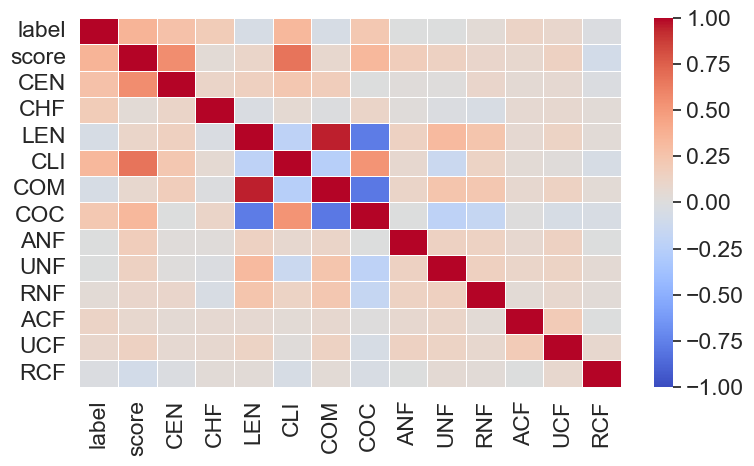

In [24]:
sns.set(font_scale=1.5)
plt.figure(figsize = (8,5))
sns.heatmap(dfd.corr('spearman'), vmin =-1, vmax=1, cmap='coolwarm', linecolor='white',linewidths=0.5)
plt.tight_layout()
plt.show()

### Model

In [25]:
lm = LinearRegression()
X = dfd.drop('label', axis=1)
y = dfd['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)
lm.fit(X_train, y_train)
preds = lm.predict(X_test)

In [26]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, preds)).round(2)
r2 = metrics.r2_score(y_test, preds).round(3)

In [27]:
print('RMSE:', RMSE)
print('-'*40)  
print('R^2:', r2 )

RMSE: 0.24
----------------------------------------
R^2: 0.25


## ANOVA

Ref: https://www.statsmodels.org/devel/examples/notebooks/generated/interactions_anova.html

In [28]:
dfd

,label,score,CEN,CHF,LEN,CLI,COM,COC,ANF,UNF,RNF,ACF,UCF,RCF
0,0.0,5.969696,1.000000,8.100000e-07,1.000000,0.984848,1.00,0.000000,0.0,0.0,0.0,0,0.0,0
1,1.0,2.145795,0.030674,1.049760e-03,0.623377,0.606061,0.25,0.000000,0.0,0.0,0.0,0,0.0,0
2,1.0,1.796553,0.214383,2.342560e-03,0.324675,0.272727,0.50,0.000000,0.0,0.0,0.0,0,0.0,0
3,1.0,6.019894,1.000000,1.464100e-04,1.000000,0.010020,1.00,0.000000,0.0,0.0,0.0,0,1.0,0
4,1.0,4.269551,0.148347,2.313441e-02,0.000000,0.997996,0.00,1.000000,0.0,0.0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,0.0,3.542833,1.000000,2.401000e-05,1.000000,0.771429,1.00,-1.000000,0.0,0.0,0.0,0,0.0,0
2035,0.0,3.542833,1.000000,2.401000e-05,1.000000,0.771429,1.00,-1.000000,0.0,0.0,0.0,0,0.0,0
2036,0.0,3.542833,1.000000,2.401000e-05,1.000000,0.771429,1.00,-1.000000,0.0,0.0,0.0,0,0.0,0
2037,0.0,1.214538,0.238914,6.146560e-03,0.000000,0.228571,0.00,0.142857,0.0,0.0,0.0,0,0.0,0


In [29]:
float_dfd = dfd.astype(float, copy=True)

model = ols('label ~ LEN + COM + CLI + COC + ANF + UNF + ACF + UCF + RCF + RNF + CHF + CEN', data=float_dfd).fit()

anova_table = sm.stats.anova_lm(model, type=2)

print(anova_table)

              df      sum_sq    mean_sq           F        PR(>F)
LEN          1.0    2.350812   2.350812   39.739380  3.551667e-10
COM          1.0    0.707967   0.707967   11.967852  5.524607e-04
CLI          1.0   28.492183  28.492183  481.646998  5.954279e-96
COC          1.0    3.883130   3.883130   65.642493  9.242791e-16
ANF          1.0    0.040436   0.040436    0.683555  4.084627e-01
UNF          1.0    0.889613   0.889613   15.038488  1.086997e-04
ACF          1.0    1.153074   1.153074   19.492175  1.063283e-05
UCF          1.0    0.000381   0.000381    0.006440  9.360448e-01
RCF          1.0    0.008409   0.008409    0.142156  7.061868e-01
RNF          1.0    0.144295   0.144295    2.439235  1.184901e-01
CHF          1.0    0.115159   0.115159    1.946703  1.630955e-01
CEN          1.0    7.297830   7.297830  123.366398  7.260022e-28
Residual  2026.0  119.849521   0.059156         NaN           NaN


### Post-hoc Analysis for features with p < 0.05

In [30]:
# Post-hoc analysis for score_LEN
X_LEN = sm.add_constant(float_dfd['LEN'])
model_LEN = sm.OLS(float_dfd['label'], X_LEN).fit()
print(f"\n== Post-hoc analysis for LEN ==\n{model_LEN.summary()}\n")

# Post-hoc analysis for score_COM
X_COM = sm.add_constant(float_dfd['COM'])
model_COM = sm.OLS(float_dfd['label'], X_COM).fit()
print(f"\n== Post-hoc analysis for COM ==\n{model_COM.summary()}\n")

# Post-hoc analysis for score_CLI
X_CLI = sm.add_constant(float_dfd['CLI']) 
model_CLI = sm.OLS(float_dfd['label'], X_CLI).fit()
print(f"\n== Post-hoc analysis for CLI ==\n{model_CLI.summary()}\n")

# Post-hoc analysis for score_COC
X_COC = sm.add_constant(float_dfd['COC'])
model_COC = sm.OLS(float_dfd['label'], X_COC).fit()
print(f"\n== Post-hoc analysis for COC ==\n{model_COC.summary()}\n")

# Post-hoc analysis for score_UNF
X_UNF = sm.add_constant(float_dfd['UNF']) 
model_UNF = sm.OLS(float_dfd['label'], X_UNF).fit()
print(f"\n== Post-hoc analysis for UNF ==\n{model_UNF.summary()}\n")

# Post-hoc analysis for score_ACF
X_ACF = sm.add_constant(float_dfd['ACF'])
model_ACF = sm.OLS(float_dfd['label'], X_ACF).fit()
print(f"\n== Post-hoc analysis for ACF ==\n{model_ACF.summary()}\n")

# Post-hoc analysis for score_CEN
X_CEN = sm.add_constant(float_dfd['CEN']) 
model_CEN = sm.OLS(float_dfd['label'], X_CEN).fit()
print(f"\n== Post-hoc analysis for CEN ==\n{model_CEN.summary()}\n")




== Post-hoc analysis for LEN ==
                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     29.45
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           6.41e-08
Time:                        23:27:02   Log-Likelihood:                -314.87
No. Observations:                2039   AIC:                             633.7
Df Residuals:                    2037   BIC:                             645.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.07